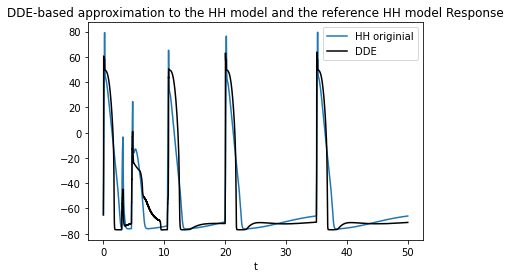

In [1]:
# DSN Project
# Response to a series of stimuli during different times within the refractory period using the reference HH model
# and using the DDE-based approximation to the HH mode


from __future__ import division
from collections import OrderedDict
from array import array
import matplotlib.pyplot as plt
import numpy as np
import math
import time

t0 = 0.0
tf = 50.0
global g_t0
g_t0 = t0

ref_model_t = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09, 0.09999999999999999, 0.10999999999999999, 0.11999999999999998, 0.12999999999999998, 0.13999999999999999, 0.15, 0.16, 0.17, 0.18000000000000002, 0.19000000000000003, 0.20000000000000004, 0.21000000000000005, 0.22000000000000006, 0.23000000000000007, 0.24000000000000007, 0.25000000000000006, 0.26000000000000006, 0.2700000000000001, 0.2800000000000001, 0.2900000000000001, 0.3000000000000001, 0.3100000000000001, 0.3200000000000001, 0.3300000000000001, 0.34000000000000014, 0.35000000000000014, 0.36000000000000015, 0.37000000000000016, 0.38000000000000017, 0.3900000000000002, 0.4000000000000002, 0.4100000000000002, 0.4200000000000002, 0.4300000000000002, 0.4400000000000002, 0.45000000000000023, 0.46000000000000024, 0.47000000000000025, 0.48000000000000026, 0.49000000000000027, 0.5000000000000002, 0.5100000000000002, 0.5200000000000002, 0.5300000000000002, 0.5400000000000003, 0.5500000000000003, 0.5600000000000003, 0.5700000000000003, 0.5800000000000003, 0.5900000000000003, 0.6000000000000003, 0.6100000000000003, 0.6200000000000003, 0.6300000000000003, 0.6400000000000003, 0.6500000000000004, 0.6600000000000004, 0.6700000000000004, 0.6800000000000004, 0.6900000000000004, 0.7000000000000004, 0.7100000000000004, 0.7200000000000004, 0.7300000000000004, 0.7400000000000004, 0.7500000000000004, 0.7600000000000005, 0.7700000000000005, 0.7800000000000005, 0.7900000000000005, 0.8000000000000005, 0.8100000000000005, 0.8200000000000005, 0.8300000000000005, 0.8400000000000005, 0.8500000000000005, 0.8600000000000005, 0.8700000000000006, 0.8800000000000006, 0.8900000000000006, 0.9000000000000006, 0.9100000000000006, 0.9200000000000006, 0.9300000000000006, 0.9400000000000006, 0.9500000000000006, 0.9600000000000006, 0.9700000000000006, 0.9800000000000006, 0.9900000000000007, 1.0000000000000007, 1.0100000000000007, 1.0200000000000007, 1.0300000000000007, 1.0400000000000007, 1.0500000000000007, 1.0600000000000007, 1.0700000000000007, 1.0800000000000007, 1.0900000000000007, 1.1000000000000008, 1.1100000000000008, 1.1200000000000008, 1.1300000000000008, 1.1400000000000008, 1.1500000000000008, 1.1600000000000008, 1.1700000000000008, 1.1800000000000008, 1.1900000000000008, 1.2000000000000008, 1.2100000000000009, 1.2200000000000009, 1.2300000000000009, 1.2400000000000009, 1.2500000000000009, 1.260000000000001, 1.270000000000001, 1.280000000000001, 1.290000000000001, 1.300000000000001, 1.310000000000001, 1.320000000000001, 1.330000000000001, 1.340000000000001, 1.350000000000001, 1.360000000000001, 1.370000000000001, 1.380000000000001, 1.390000000000001, 1.400000000000001, 1.410000000000001, 1.420000000000001, 1.430000000000001, 1.440000000000001, 1.450000000000001, 1.460000000000001, 1.470000000000001, 1.480000000000001, 1.490000000000001, 1.500000000000001, 1.5100000000000011, 1.5200000000000011, 1.5300000000000011, 1.5400000000000011, 1.5500000000000012, 1.5600000000000012, 1.5700000000000012, 1.5800000000000012, 1.5900000000000012, 1.6000000000000012, 1.6100000000000012, 1.6200000000000012, 1.6300000000000012, 1.6400000000000012, 1.6500000000000012, 1.6600000000000013, 1.6700000000000013, 1.6800000000000013, 1.6900000000000013, 1.7000000000000013, 1.7100000000000013, 1.7200000000000013, 1.7300000000000013, 1.7400000000000013, 1.7500000000000013, 1.7600000000000013, 1.7700000000000014, 1.7800000000000014, 1.7900000000000014, 1.8000000000000014, 1.8100000000000014, 1.8200000000000014, 1.8300000000000014, 1.8400000000000014, 1.8500000000000014, 1.8600000000000014, 1.8700000000000014, 1.8800000000000014, 1.8900000000000015, 1.9000000000000015, 1.9100000000000015, 1.9200000000000015, 1.9300000000000015, 1.9400000000000015, 1.9500000000000015, 1.9600000000000015, 1.9700000000000015, 1.9800000000000015, 1.9900000000000015, 2.0000000000000013, 2.010000000000001, 2.020000000000001, 2.0300000000000007, 2.0400000000000005, 2.0500000000000003, 2.06, 2.07, 2.0799999999999996, 2.0899999999999994, 2.099999999999999, 2.109999999999999, 2.1199999999999988, 2.1299999999999986, 2.1399999999999983, 2.149999999999998, 2.159999999999998, 2.1699999999999977, 2.1799999999999975, 2.1899999999999973, 2.199999999999997, 2.209999999999997, 2.2199999999999966, 2.2299999999999964, 2.239999999999996, 2.249999999999996, 2.259999999999996, 2.2699999999999956, 2.2799999999999954, 2.289999999999995, 2.299999999999995, 2.3099999999999947, 2.3199999999999945, 2.3299999999999943, 2.339999999999994, 2.349999999999994, 2.3599999999999937, 2.3699999999999934, 2.3799999999999932, 2.389999999999993, 2.399999999999993, 2.4099999999999926, 2.4199999999999924, 2.429999999999992, 2.439999999999992, 2.4499999999999917, 2.4599999999999915, 2.4699999999999913, 2.479999999999991, 2.489999999999991, 2.4999999999999907, 2.5099999999999905, 2.5199999999999902, 2.52999999999999, 2.53999999999999, 2.5499999999999896, 2.5599999999999894, 2.569999999999989, 2.579999999999989, 2.5899999999999888, 2.5999999999999885, 2.6099999999999883, 2.619999999999988, 2.629999999999988, 2.6399999999999877, 2.6499999999999875, 2.6599999999999873, 2.669999999999987, 2.679999999999987, 2.6899999999999866, 2.6999999999999864, 2.709999999999986, 2.719999999999986, 2.7299999999999858, 2.7399999999999856, 2.7499999999999853, 2.759999999999985, 2.769999999999985, 2.7799999999999847, 2.7899999999999845, 2.7999999999999843, 2.809999999999984, 2.819999999999984, 2.8299999999999836, 2.8399999999999834, 2.849999999999983, 2.859999999999983, 2.869999999999983, 2.8799999999999826, 2.8899999999999824, 2.899999999999982, 2.909999999999982, 2.9199999999999817, 2.9299999999999815, 2.9399999999999813, 2.949999999999981, 2.959999999999981, 2.9699999999999807, 2.9799999999999804, 2.9899999999999802, 2.99999999999998, 3.00999999999998, 3.0199999999999796, 3.0299999999999794, 3.039999999999979, 3.049999999999979, 3.0599999999999787, 3.0699999999999785, 3.0799999999999783, 3.089999999999978, 3.099999999999978, 3.1099999999999777, 3.1199999999999775, 3.1299999999999772, 3.139999999999977, 3.149999999999977, 3.1599999999999766, 3.1699999999999764, 3.179999999999976, 3.189999999999976, 3.1999999999999758, 3.2099999999999755, 3.2199999999999753, 3.229999999999975, 3.239999999999975, 3.2499999999999747, 3.2599999999999745, 3.2699999999999743, 3.279999999999974, 3.289999999999974, 3.2999999999999736, 3.3099999999999734, 3.319999999999973, 3.329999999999973, 3.3399999999999728, 3.3499999999999726, 3.3599999999999723, 3.369999999999972, 3.379999999999972, 3.3899999999999717, 3.3999999999999715, 3.4099999999999713, 3.419999999999971, 3.429999999999971, 3.4399999999999706, 3.4499999999999704, 3.45999999999997, 3.46999999999997, 3.47999999999997, 3.4899999999999696, 3.4999999999999694, 3.509999999999969, 3.519999999999969, 3.5299999999999687, 3.5399999999999685, 3.5499999999999683, 3.559999999999968, 3.569999999999968, 3.5799999999999677, 3.5899999999999674, 3.5999999999999672, 3.609999999999967, 3.619999999999967, 3.6299999999999666, 3.6399999999999664, 3.649999999999966, 3.659999999999966, 3.6699999999999657, 3.6799999999999655, 3.6899999999999653, 3.699999999999965, 3.709999999999965, 3.7199999999999647, 3.7299999999999645, 3.7399999999999642, 3.749999999999964, 3.759999999999964, 3.7699999999999636, 3.7799999999999634, 3.789999999999963, 3.799999999999963, 3.8099999999999627, 3.8199999999999625, 3.8299999999999623, 3.839999999999962, 3.849999999999962, 3.8599999999999617, 3.8699999999999615, 3.8799999999999613, 3.889999999999961, 3.899999999999961, 3.9099999999999606, 3.9199999999999604, 3.92999999999996, 3.93999999999996, 3.9499999999999598, 3.9599999999999596, 3.9699999999999593, 3.979999999999959, 3.989999999999959, 3.9999999999999587, 4.009999999999959, 4.019999999999959, 4.0299999999999585, 4.039999999999958, 4.049999999999958, 4.059999999999958, 4.069999999999958, 4.079999999999957, 4.089999999999957, 4.099999999999957, 4.109999999999957, 4.119999999999957, 4.129999999999956, 4.139999999999956, 4.149999999999956, 4.159999999999956, 4.1699999999999555, 4.179999999999955, 4.189999999999955, 4.199999999999955, 4.209999999999955, 4.2199999999999545, 4.229999999999954, 4.239999999999954, 4.249999999999954, 4.259999999999954, 4.269999999999953, 4.279999999999953, 4.289999999999953, 4.299999999999953, 4.3099999999999525, 4.319999999999952, 4.329999999999952, 4.339999999999952, 4.349999999999952, 4.3599999999999515, 4.369999999999951, 4.379999999999951, 4.389999999999951, 4.399999999999951, 4.40999999999995, 4.41999999999995, 4.42999999999995, 4.43999999999995, 4.4499999999999496, 4.459999999999949, 4.469999999999949, 4.479999999999949, 4.489999999999949, 4.4999999999999485, 4.509999999999948, 4.519999999999948, 4.529999999999948, 4.539999999999948, 4.549999999999947, 4.559999999999947, 4.569999999999947, 4.579999999999947, 4.589999999999947, 4.599999999999946, 4.609999999999946, 4.619999999999946, 4.629999999999946, 4.6399999999999455, 4.649999999999945, 4.659999999999945, 4.669999999999945, 4.679999999999945, 4.689999999999944, 4.699999999999944, 4.709999999999944, 4.719999999999944, 4.729999999999944, 4.739999999999943, 4.749999999999943, 4.759999999999943, 4.769999999999943, 4.7799999999999425, 4.789999999999942, 4.799999999999942, 4.809999999999942, 4.819999999999942, 4.8299999999999415, 4.839999999999941, 4.849999999999941, 4.859999999999941, 4.869999999999941, 4.87999999999994, 4.88999999999994, 4.89999999999994, 4.90999999999994, 4.9199999999999395, 4.929999999999939, 4.939999999999939, 4.949999999999939, 4.959999999999939, 4.9699999999999385, 4.979999999999938, 4.989999999999938, 4.999999999999938, 5.009999999999938, 5.019999999999937, 5.029999999999937, 5.039999999999937, 5.049999999999937, 5.0599999999999365, 5.069999999999936, 5.079999999999936, 5.089999999999936, 5.099999999999936, 5.1099999999999355, 5.119999999999935, 5.129999999999935, 5.139999999999935, 5.149999999999935, 5.159999999999934, 5.169999999999934, 5.179999999999934, 5.189999999999934, 5.199999999999934, 5.209999999999933, 5.219999999999933, 5.229999999999933, 5.239999999999933, 5.2499999999999325, 5.259999999999932, 5.269999999999932, 5.279999999999932, 5.289999999999932, 5.299999999999931, 5.309999999999931, 5.319999999999931, 5.329999999999931, 5.339999999999931, 5.34999999999993, 5.35999999999993, 5.36999999999993, 5.37999999999993, 5.3899999999999295, 5.399999999999929, 5.409999999999929, 5.419999999999929, 5.429999999999929, 5.4399999999999284, 5.449999999999928, 5.459999999999928, 5.469999999999928, 5.479999999999928, 5.489999999999927, 5.499999999999927, 5.509999999999927, 5.519999999999927, 5.5299999999999265, 5.539999999999926, 5.549999999999926, 5.559999999999926, 5.569999999999926, 5.5799999999999255, 5.589999999999925, 5.599999999999925, 5.609999999999925, 5.619999999999925, 5.629999999999924, 5.639999999999924, 5.649999999999924, 5.659999999999924, 5.6699999999999235, 5.679999999999923, 5.689999999999923, 5.699999999999923, 5.709999999999923, 5.7199999999999225, 5.729999999999922, 5.739999999999922, 5.749999999999922, 5.759999999999922, 5.769999999999921, 5.779999999999921, 5.789999999999921, 5.799999999999921, 5.809999999999921, 5.81999999999992, 5.82999999999992, 5.83999999999992, 5.84999999999992, 5.8599999999999195, 5.869999999999919, 5.879999999999919, 5.889999999999919, 5.899999999999919, 5.909999999999918, 5.919999999999918, 5.929999999999918, 5.939999999999918, 5.949999999999918, 5.959999999999917, 5.969999999999917, 5.979999999999917, 5.989999999999917, 5.9999999999999165, 6.009999999999916, 6.019999999999916, 6.029999999999916, 6.039999999999916, 6.0499999999999154, 6.059999999999915, 6.069999999999915, 6.079999999999915, 6.089999999999915, 6.099999999999914, 6.109999999999914, 6.119999999999914, 6.129999999999914, 6.1399999999999135, 6.149999999999913, 6.159999999999913, 6.169999999999913, 6.179999999999913, 6.1899999999999125, 6.199999999999912, 6.209999999999912, 6.219999999999912, 6.229999999999912, 6.239999999999911, 6.249999999999911, 6.259999999999911, 6.269999999999911, 6.2799999999999105, 6.28999999999991, 6.29999999999991, 6.30999999999991, 6.31999999999991, 6.3299999999999095, 6.339999999999909, 6.349999999999909, 6.359999999999909, 6.369999999999909, 6.379999999999908, 6.389999999999908, 6.399999999999908, 6.409999999999908, 6.419999999999908, 6.429999999999907, 6.439999999999907, 6.449999999999907, 6.459999999999907, 6.4699999999999065, 6.479999999999906, 6.489999999999906, 6.499999999999906, 6.509999999999906, 6.519999999999905, 6.529999999999905, 6.539999999999905, 6.549999999999905, 6.559999999999905, 6.569999999999904, 6.579999999999904, 6.589999999999904, 6.599999999999904, 6.6099999999999035, 6.619999999999903, 6.629999999999903, 6.639999999999903, 6.649999999999903, 6.659999999999902, 6.669999999999902, 6.679999999999902, 6.689999999999902, 6.699999999999902, 6.709999999999901, 6.719999999999901, 6.729999999999901, 6.739999999999901, 6.7499999999999005, 6.7599999999999, 6.7699999999999, 6.7799999999999, 6.7899999999999, 6.7999999999998995, 6.809999999999899, 6.819999999999899, 6.829999999999899, 6.839999999999899, 6.849999999999898, 6.859999999999898, 6.869999999999898, 6.879999999999898, 6.8899999999998975, 6.899999999999897, 6.909999999999897, 6.919999999999897, 6.929999999999897, 6.9399999999998965, 6.949999999999896, 6.959999999999896, 6.969999999999896, 6.979999999999896, 6.989999999999895, 6.999999999999895, 7.009999999999895, 7.019999999999895, 7.0299999999998946, 7.039999999999894, 7.049999999999894, 7.059999999999894, 7.069999999999894, 7.0799999999998935, 7.089999999999893, 7.099999999999893, 7.109999999999893, 7.119999999999893, 7.129999999999892, 7.139999999999892, 7.149999999999892, 7.159999999999892, 7.169999999999892, 7.179999999999891, 7.189999999999891, 7.199999999999891, 7.209999999999891, 7.2199999999998905, 7.22999999999989, 7.23999999999989, 7.24999999999989, 7.25999999999989, 7.269999999999889, 7.279999999999889, 7.289999999999889, 7.299999999999889, 7.309999999999889, 7.319999999999888, 7.329999999999888, 7.339999999999888, 7.349999999999888, 7.3599999999998875, 7.369999999999887, 7.379999999999887, 7.389999999999887, 7.399999999999887, 7.4099999999998865, 7.419999999999886, 7.429999999999886, 7.439999999999886, 7.449999999999886, 7.459999999999885, 7.469999999999885, 7.479999999999885, 7.489999999999885, 7.4999999999998845, 7.509999999999884, 7.519999999999884, 7.529999999999884, 7.539999999999884, 7.5499999999998835, 7.559999999999883, 7.569999999999883, 7.579999999999883, 7.589999999999883, 7.599999999999882, 7.609999999999882, 7.619999999999882, 7.629999999999882, 7.6399999999998816, 7.649999999999881, 7.659999999999881, 7.669999999999881, 7.679999999999881, 7.6899999999998805, 7.69999999999988, 7.70999999999988, 7.71999999999988, 7.72999999999988, 7.739999999999879, 7.749999999999879, 7.759999999999879, 7.769999999999879, 7.779999999999879, 7.789999999999878, 7.799999999999878, 7.809999999999878, 7.819999999999878, 7.8299999999998775, 7.839999999999877, 7.849999999999877, 7.859999999999877, 7.869999999999877, 7.879999999999876, 7.889999999999876, 7.899999999999876, 7.909999999999876, 7.919999999999876, 7.929999999999875, 7.939999999999875, 7.949999999999875, 7.959999999999875, 7.9699999999998745, 7.979999999999874, 7.989999999999874, 7.999999999999874, 8.009999999999874, 8.019999999999873, 8.029999999999873, 8.039999999999873, 8.049999999999873, 8.059999999999873, 8.069999999999872, 8.079999999999872, 8.089999999999872, 8.099999999999872, 8.109999999999872, 8.119999999999871, 8.129999999999871, 8.139999999999871, 8.14999999999987, 8.15999999999987, 8.16999999999987, 8.17999999999987, 8.18999999999987, 8.19999999999987, 8.20999999999987, 8.21999999999987, 8.229999999999869, 8.239999999999869, 8.249999999999869, 8.259999999999868, 8.269999999999868, 8.279999999999868, 8.289999999999868, 8.299999999999867, 8.309999999999867, 8.319999999999867, 8.329999999999867, 8.339999999999867, 8.349999999999866, 8.359999999999866, 8.369999999999866, 8.379999999999866, 8.389999999999866, 8.399999999999865, 8.409999999999865, 8.419999999999865, 8.429999999999865, 8.439999999999864, 8.449999999999864, 8.459999999999864, 8.469999999999864, 8.479999999999864, 8.489999999999863, 8.499999999999863, 8.509999999999863, 8.519999999999863, 8.529999999999863, 8.539999999999862, 8.549999999999862, 8.559999999999862, 8.569999999999862, 8.579999999999862, 8.589999999999861, 8.599999999999861, 8.60999999999986, 8.61999999999986, 8.62999999999986, 8.63999999999986, 8.64999999999986, 8.65999999999986, 8.66999999999986, 8.67999999999986, 8.68999999999986, 8.699999999999859, 8.709999999999859, 8.719999999999859, 8.729999999999858, 8.739999999999858, 8.749999999999858, 8.759999999999858, 8.769999999999857, 8.779999999999857, 8.789999999999857, 8.799999999999857, 8.809999999999857, 8.819999999999856, 8.829999999999856, 8.839999999999856, 8.849999999999856, 8.859999999999856, 8.869999999999855, 8.879999999999855, 8.889999999999855, 8.899999999999855, 8.909999999999854, 8.919999999999854, 8.929999999999854, 8.939999999999854, 8.949999999999854, 8.959999999999853, 8.969999999999853, 8.979999999999853, 8.989999999999853, 8.999999999999853, 9.009999999999852, 9.019999999999852, 9.029999999999852, 9.039999999999852, 9.049999999999851, 9.059999999999851, 9.069999999999851, 9.07999999999985, 9.08999999999985, 9.09999999999985, 9.10999999999985, 9.11999999999985, 9.12999999999985, 9.13999999999985, 9.14999999999985, 9.15999999999985, 9.169999999999849, 9.179999999999849, 9.189999999999849, 9.199999999999848, 9.209999999999848, 9.219999999999848, 9.229999999999848, 9.239999999999847, 9.249999999999847, 9.259999999999847, 9.269999999999847, 9.279999999999847, 9.289999999999846, 9.299999999999846, 9.309999999999846, 9.319999999999846, 9.329999999999846, 9.339999999999845, 9.349999999999845, 9.359999999999845, 9.369999999999845, 9.379999999999844, 9.389999999999844, 9.399999999999844, 9.409999999999844, 9.419999999999844, 9.429999999999843, 9.439999999999843, 9.449999999999843, 9.459999999999843, 9.469999999999843, 9.479999999999842, 9.489999999999842, 9.499999999999842, 9.509999999999842, 9.519999999999841, 9.529999999999841, 9.539999999999841, 9.54999999999984, 9.55999999999984, 9.56999999999984, 9.57999999999984, 9.58999999999984, 9.59999999999984, 9.60999999999984, 9.61999999999984, 9.62999999999984, 9.639999999999839, 9.649999999999839, 9.659999999999838, 9.669999999999838, 9.679999999999838, 9.689999999999838, 9.699999999999838, 9.709999999999837, 9.719999999999837, 9.729999999999837, 9.739999999999837, 9.749999999999837, 9.759999999999836, 9.769999999999836, 9.779999999999836, 9.789999999999836, 9.799999999999836, 9.809999999999835, 9.819999999999835, 9.829999999999835, 9.839999999999835, 9.849999999999834, 9.859999999999834, 9.869999999999834, 9.879999999999834, 9.889999999999834, 9.899999999999833, 9.909999999999833, 9.919999999999833, 9.929999999999833, 9.939999999999833, 9.949999999999832, 9.959999999999832, 9.969999999999832, 9.979999999999832, 9.989999999999831, 9.999999999999831, 10.009999999999831, 10.01999999999983, 10.02999999999983, 10.03999999999983, 10.04999999999983, 10.05999999999983, 10.06999999999983, 10.07999999999983, 10.08999999999983, 10.09999999999983, 10.109999999999829, 10.119999999999829, 10.129999999999828, 10.139999999999828, 10.149999999999828, 10.159999999999828, 10.169999999999828, 10.179999999999827, 10.189999999999827, 10.199999999999827, 10.209999999999827, 10.219999999999827, 10.229999999999826, 10.239999999999826, 10.249999999999826, 10.259999999999826, 10.269999999999825, 10.279999999999825, 10.289999999999825, 10.299999999999825, 10.309999999999825, 10.319999999999824, 10.329999999999824, 10.339999999999824, 10.349999999999824, 10.359999999999824, 10.369999999999823, 10.379999999999823, 10.389999999999823, 10.399999999999823, 10.409999999999823, 10.419999999999822, 10.429999999999822, 10.439999999999822, 10.449999999999822, 10.459999999999821, 10.469999999999821, 10.479999999999821, 10.48999999999982, 10.49999999999982, 10.50999999999982, 10.51999999999982, 10.52999999999982, 10.53999999999982, 10.54999999999982, 10.55999999999982, 10.569999999999819, 10.579999999999819, 10.589999999999819, 10.599999999999818, 10.609999999999818, 10.619999999999818, 10.629999999999818, 10.639999999999818, 10.649999999999817, 10.659999999999817, 10.669999999999817, 10.679999999999817, 10.689999999999817, 10.699999999999816, 10.709999999999816, 10.719999999999816, 10.729999999999816, 10.739999999999815, 10.749999999999815, 10.759999999999815, 10.769999999999815, 10.779999999999815, 10.789999999999814, 10.799999999999814, 10.809999999999814, 10.819999999999814, 10.829999999999814, 10.839999999999813, 10.849999999999813, 10.859999999999813, 10.869999999999813, 10.879999999999812, 10.889999999999812, 10.899999999999812, 10.909999999999812, 10.919999999999812, 10.929999999999811, 10.939999999999811, 10.949999999999811, 10.95999999999981, 10.96999999999981, 10.97999999999981, 10.98999999999981, 10.99999999999981, 11.00999999999981, 11.01999999999981, 11.02999999999981, 11.039999999999809, 11.049999999999809, 11.059999999999809, 11.069999999999808, 11.079999999999808, 11.089999999999808, 11.099999999999808, 11.109999999999808, 11.119999999999807, 11.129999999999807, 11.139999999999807, 11.149999999999807, 11.159999999999807, 11.169999999999806, 11.179999999999806, 11.189999999999806, 11.199999999999806, 11.209999999999805, 11.219999999999805, 11.229999999999805, 11.239999999999805, 11.249999999999805, 11.259999999999804, 11.269999999999804, 11.279999999999804, 11.289999999999804, 11.299999999999804, 11.309999999999803, 11.319999999999803, 11.329999999999803, 11.339999999999803, 11.349999999999802, 11.359999999999802, 11.369999999999802, 11.379999999999802, 11.389999999999802, 11.399999999999801, 11.409999999999801, 11.419999999999801, 11.4299999999998, 11.4399999999998, 11.4499999999998, 11.4599999999998, 11.4699999999998, 11.4799999999998, 11.4899999999998, 11.4999999999998, 11.509999999999799, 11.519999999999799, 11.529999999999799, 11.539999999999798, 11.549999999999798, 11.559999999999798, 11.569999999999798, 11.579999999999798, 11.589999999999797, 11.599999999999797, 11.609999999999797, 11.619999999999797, 11.629999999999797, 11.639999999999796, 11.649999999999796, 11.659999999999796, 11.669999999999796, 11.679999999999795, 11.689999999999795, 11.699999999999795, 11.709999999999795, 11.719999999999795, 11.729999999999794, 11.739999999999794, 11.749999999999794, 11.759999999999794, 11.769999999999794, 11.779999999999793, 11.789999999999793, 11.799999999999793, 11.809999999999793, 11.819999999999792, 11.829999999999792, 11.839999999999792, 11.849999999999792, 11.859999999999792, 11.869999999999791, 11.879999999999791, 11.889999999999791, 11.89999999999979, 11.90999999999979, 11.91999999999979, 11.92999999999979, 11.93999999999979, 11.94999999999979, 11.95999999999979, 11.96999999999979, 11.979999999999789, 11.989999999999789, 11.999999999999789, 12.009999999999788, 12.019999999999788, 12.029999999999788, 12.039999999999788, 12.049999999999788, 12.059999999999787, 12.069999999999787, 12.079999999999787, 12.089999999999787, 12.099999999999786, 12.109999999999786, 12.119999999999786, 12.129999999999786, 12.139999999999786, 12.149999999999785, 12.159999999999785, 12.169999999999785, 12.179999999999785, 12.189999999999785, 12.199999999999784, 12.209999999999784, 12.219999999999784, 12.229999999999784, 12.239999999999783, 12.249999999999783, 12.259999999999783, 12.269999999999783, 12.279999999999783, 12.289999999999782, 12.299999999999782, 12.309999999999782, 12.319999999999782, 12.329999999999782, 12.339999999999781, 12.349999999999781, 12.359999999999781, 12.36999999999978, 12.37999999999978, 12.38999999999978, 12.39999999999978, 12.40999999999978, 12.41999999999978, 12.42999999999978, 12.43999999999978, 12.449999999999779, 12.459999999999779, 12.469999999999779, 12.479999999999778, 12.489999999999778, 12.499999999999778, 12.509999999999778, 12.519999999999778, 12.529999999999777, 12.539999999999777, 12.549999999999777, 12.559999999999777, 12.569999999999776, 12.579999999999776, 12.589999999999776, 12.599999999999776, 12.609999999999776, 12.619999999999775, 12.629999999999775, 12.639999999999775, 12.649999999999775, 12.659999999999775, 12.669999999999774, 12.679999999999774, 12.689999999999774, 12.699999999999774, 12.709999999999773, 12.719999999999773, 12.729999999999773, 12.739999999999773, 12.749999999999773, 12.759999999999772, 12.769999999999772, 12.779999999999772, 12.789999999999772, 12.799999999999772, 12.809999999999771, 12.819999999999771, 12.829999999999771, 12.83999999999977, 12.84999999999977, 12.85999999999977, 12.86999999999977, 12.87999999999977, 12.88999999999977, 12.89999999999977, 12.90999999999977, 12.919999999999769, 12.929999999999769, 12.939999999999769, 12.949999999999768, 12.959999999999768, 12.969999999999768, 12.979999999999768, 12.989999999999768, 12.999999999999767, 13.009999999999767, 13.019999999999767, 13.029999999999767, 13.039999999999766, 13.049999999999766, 13.059999999999766, 13.069999999999766, 13.079999999999766, 13.089999999999765, 13.099999999999765, 13.109999999999765, 13.119999999999765, 13.129999999999765, 13.139999999999764, 13.149999999999764, 13.159999999999764, 13.169999999999764, 13.179999999999763, 13.189999999999763, 13.199999999999763, 13.209999999999763, 13.219999999999763, 13.229999999999762, 13.239999999999762, 13.249999999999762, 13.259999999999762, 13.269999999999762, 13.279999999999761, 13.289999999999761, 13.299999999999761, 13.30999999999976, 13.31999999999976, 13.32999999999976, 13.33999999999976, 13.34999999999976, 13.35999999999976, 13.36999999999976, 13.37999999999976, 13.389999999999759, 13.399999999999759, 13.409999999999759, 13.419999999999758, 13.429999999999758, 13.439999999999758, 13.449999999999758, 13.459999999999757, 13.469999999999757, 13.479999999999757, 13.489999999999757, 13.499999999999757, 13.509999999999756, 13.519999999999756, 13.529999999999756, 13.539999999999756, 13.549999999999756, 13.559999999999755, 13.569999999999755, 13.579999999999755, 13.589999999999755, 13.599999999999755, 13.609999999999754, 13.619999999999754, 13.629999999999754, 13.639999999999754, 13.649999999999753, 13.659999999999753, 13.669999999999753, 13.679999999999753, 13.689999999999753, 13.699999999999752, 13.709999999999752, 13.719999999999752, 13.729999999999752, 13.739999999999752, 13.749999999999751, 13.759999999999751, 13.76999999999975, 13.77999999999975, 13.78999999999975, 13.79999999999975, 13.80999999999975, 13.81999999999975, 13.82999999999975, 13.83999999999975, 13.84999999999975, 13.859999999999749, 13.869999999999749, 13.879999999999749, 13.889999999999748, 13.899999999999748, 13.909999999999748, 13.919999999999748, 13.929999999999747, 13.939999999999747, 13.949999999999747, 13.959999999999747, 13.969999999999747, 13.979999999999746, 13.989999999999746, 13.999999999999746, 14.009999999999746, 14.019999999999746, 14.029999999999745, 14.039999999999745, 14.049999999999745, 14.059999999999745, 14.069999999999744, 14.079999999999744, 14.089999999999744, 14.099999999999744, 14.109999999999744, 14.119999999999743, 14.129999999999743, 14.139999999999743, 14.149999999999743, 14.159999999999743, 14.169999999999742, 14.179999999999742, 14.189999999999742, 14.199999999999742, 14.209999999999742, 14.219999999999741, 14.229999999999741, 14.23999999999974, 14.24999999999974, 14.25999999999974, 14.26999999999974, 14.27999999999974, 14.28999999999974, 14.29999999999974, 14.30999999999974, 14.31999999999974, 14.329999999999739, 14.339999999999739, 14.349999999999739, 14.359999999999738, 14.369999999999738, 14.379999999999738, 14.389999999999738, 14.399999999999737, 14.409999999999737, 14.419999999999737, 14.429999999999737, 14.439999999999737, 14.449999999999736, 14.459999999999736, 14.469999999999736, 14.479999999999736, 14.489999999999736, 14.499999999999735, 14.509999999999735, 14.519999999999735, 14.529999999999735, 14.539999999999734, 14.549999999999734, 14.559999999999734, 14.569999999999734, 14.579999999999734, 14.589999999999733, 14.599999999999733, 14.609999999999733, 14.619999999999733, 14.629999999999733, 14.639999999999732, 14.649999999999732, 14.659999999999732, 14.669999999999732, 14.679999999999731, 14.689999999999731, 14.699999999999731, 14.70999999999973, 14.71999999999973, 14.72999999999973, 14.73999999999973, 14.74999999999973, 14.75999999999973, 14.76999999999973, 14.77999999999973, 14.78999999999973, 14.799999999999729, 14.809999999999729, 14.819999999999729, 14.829999999999728, 14.839999999999728, 14.849999999999728, 14.859999999999728, 14.869999999999727, 14.879999999999727, 14.889999999999727, 14.899999999999727, 14.909999999999727, 14.919999999999726, 14.929999999999726, 14.939999999999726, 14.949999999999726, 14.959999999999726, 14.969999999999725, 14.979999999999725, 14.989999999999725, 14.999999999999725, 15.009999999999724, 15.019999999999724, 15.029999999999724, 15.039999999999724, 15.049999999999724, 15.059999999999723, 15.069999999999723, 15.079999999999723, 15.089999999999723, 15.099999999999723, 15.109999999999722, 15.119999999999722, 15.129999999999722, 15.139999999999722, 15.149999999999721, 15.159999999999721, 15.169999999999721, 15.17999999999972, 15.18999999999972, 15.19999999999972, 15.20999999999972, 15.21999999999972, 15.22999999999972, 15.23999999999972, 15.24999999999972, 15.25999999999972, 15.269999999999719, 15.279999999999719, 15.289999999999718, 15.299999999999718, 15.309999999999718, 15.319999999999718, 15.329999999999718, 15.339999999999717, 15.349999999999717, 15.359999999999717, 15.369999999999717, 15.379999999999717, 15.389999999999716, 15.399999999999716, 15.409999999999716, 15.419999999999716, 15.429999999999715, 15.439999999999715, 15.449999999999715, 15.459999999999715, 15.469999999999715, 15.479999999999714, 15.489999999999714, 15.499999999999714, 15.509999999999714, 15.519999999999714, 15.529999999999713, 15.539999999999713, 15.549999999999713, 15.559999999999713, 15.569999999999713, 15.579999999999712, 15.589999999999712, 15.599999999999712, 15.609999999999712, 15.619999999999711, 15.629999999999711, 15.639999999999711, 15.64999999999971, 15.65999999999971, 15.66999999999971, 15.67999999999971, 15.68999999999971, 15.69999999999971, 15.70999999999971, 15.71999999999971, 15.729999999999709, 15.739999999999709, 15.749999999999709, 15.759999999999708, 15.769999999999708, 15.779999999999708, 15.789999999999708, 15.799999999999708, 15.809999999999707, 15.819999999999707, 15.829999999999707, 15.839999999999707, 15.849999999999707, 15.859999999999706, 15.869999999999706, 15.879999999999706, 15.889999999999706, 15.899999999999705, 15.909999999999705, 15.919999999999705, 15.929999999999705, 15.939999999999705, 15.949999999999704, 15.959999999999704, 15.969999999999704, 15.979999999999704, 15.989999999999704, 15.999999999999703, 16.009999999999703, 16.019999999999705, 16.029999999999706, 16.039999999999708, 16.04999999999971, 16.05999999999971, 16.069999999999713, 16.079999999999714, 16.089999999999716, 16.099999999999717, 16.10999999999972, 16.11999999999972, 16.129999999999722, 16.139999999999723, 16.149999999999725, 16.159999999999727, 16.169999999999728, 16.17999999999973, 16.18999999999973, 16.199999999999733, 16.209999999999734, 16.219999999999736, 16.229999999999738, 16.23999999999974, 16.24999999999974, 16.259999999999742, 16.269999999999744, 16.279999999999745, 16.289999999999747, 16.29999999999975, 16.30999999999975, 16.31999999999975, 16.329999999999753, 16.339999999999755, 16.349999999999756, 16.359999999999758, 16.36999999999976, 16.37999999999976, 16.389999999999763, 16.399999999999764, 16.409999999999766, 16.419999999999767, 16.42999999999977, 16.43999999999977, 16.449999999999772, 16.459999999999773, 16.469999999999775, 16.479999999999777, 16.489999999999778, 16.49999999999978, 16.50999999999978, 16.519999999999783, 16.529999999999784, 16.539999999999786, 16.549999999999788, 16.55999999999979, 16.56999999999979, 16.579999999999792, 16.589999999999794, 16.599999999999795, 16.609999999999797, 16.6199999999998, 16.6299999999998, 16.6399999999998, 16.649999999999803, 16.659999999999805, 16.669999999999806, 16.679999999999808, 16.68999999999981, 16.69999999999981, 16.709999999999813, 16.719999999999814, 16.729999999999816, 16.739999999999817, 16.74999999999982, 16.75999999999982, 16.769999999999822, 16.779999999999824, 16.789999999999825, 16.799999999999827, 16.809999999999828, 16.81999999999983, 16.82999999999983, 16.839999999999833, 16.849999999999834, 16.859999999999836, 16.869999999999838, 16.87999999999984, 16.88999999999984, 16.899999999999842, 16.909999999999844, 16.919999999999845, 16.929999999999847, 16.93999999999985, 16.94999999999985, 16.95999999999985, 16.969999999999853, 16.979999999999855, 16.989999999999856, 16.999999999999858, 17.00999999999986, 17.01999999999986, 17.029999999999863, 17.039999999999864, 17.049999999999866, 17.059999999999867, 17.06999999999987, 17.07999999999987, 17.089999999999872, 17.099999999999874, 17.109999999999875, 17.119999999999877, 17.129999999999878, 17.13999999999988, 17.14999999999988, 17.159999999999883, 17.169999999999884, 17.179999999999886, 17.189999999999888, 17.19999999999989, 17.20999999999989, 17.219999999999892, 17.229999999999894, 17.239999999999895, 17.249999999999897, 17.2599999999999, 17.2699999999999, 17.2799999999999, 17.289999999999903, 17.299999999999905, 17.309999999999906, 17.319999999999908, 17.32999999999991, 17.33999999999991, 17.349999999999913, 17.359999999999914, 17.369999999999916, 17.379999999999917, 17.38999999999992, 17.39999999999992, 17.409999999999922, 17.419999999999924, 17.429999999999925, 17.439999999999927, 17.44999999999993, 17.45999999999993, 17.46999999999993, 17.479999999999933, 17.489999999999934, 17.499999999999936, 17.509999999999938, 17.51999999999994, 17.52999999999994, 17.539999999999942, 17.549999999999944, 17.559999999999945, 17.569999999999947, 17.57999999999995, 17.58999999999995, 17.59999999999995, 17.609999999999953, 17.619999999999955, 17.629999999999956, 17.639999999999958, 17.64999999999996, 17.65999999999996, 17.669999999999963, 17.679999999999964, 17.689999999999966, 17.699999999999967, 17.70999999999997, 17.71999999999997, 17.729999999999972, 17.739999999999974, 17.749999999999975, 17.759999999999977, 17.76999999999998, 17.77999999999998, 17.78999999999998, 17.799999999999983, 17.809999999999985, 17.819999999999986, 17.829999999999988, 17.83999999999999, 17.84999999999999, 17.859999999999992, 17.869999999999994, 17.879999999999995, 17.889999999999997, 17.9, 17.91, 17.92, 17.930000000000003, 17.940000000000005, 17.950000000000006, 17.960000000000008, 17.97000000000001, 17.98000000000001, 17.990000000000013, 18.000000000000014, 18.010000000000016, 18.020000000000017, 18.03000000000002, 18.04000000000002, 18.050000000000022, 18.060000000000024, 18.070000000000025, 18.080000000000027, 18.09000000000003, 18.10000000000003, 18.11000000000003, 18.120000000000033, 18.130000000000035, 18.140000000000036, 18.150000000000038, 18.16000000000004, 18.17000000000004, 18.180000000000042, 18.190000000000044, 18.200000000000045, 18.210000000000047, 18.22000000000005, 18.23000000000005, 18.24000000000005, 18.250000000000053, 18.260000000000055, 18.270000000000056, 18.280000000000058, 18.29000000000006, 18.30000000000006, 18.310000000000063, 18.320000000000064, 18.330000000000066, 18.340000000000067, 18.35000000000007, 18.36000000000007, 18.370000000000072, 18.380000000000074, 18.390000000000075, 18.400000000000077, 18.41000000000008, 18.42000000000008, 18.43000000000008, 18.440000000000083, 18.450000000000085, 18.460000000000086, 18.470000000000088, 18.48000000000009, 18.49000000000009, 18.500000000000092, 18.510000000000094, 18.520000000000095, 18.530000000000097, 18.5400000000001, 18.5500000000001, 18.5600000000001, 18.570000000000103, 18.580000000000105, 18.590000000000106, 18.600000000000108, 18.61000000000011, 18.62000000000011, 18.630000000000113, 18.640000000000114, 18.650000000000116, 18.660000000000117, 18.67000000000012, 18.68000000000012, 18.690000000000122, 18.700000000000124, 18.710000000000125, 18.720000000000127, 18.73000000000013, 18.74000000000013, 18.75000000000013, 18.760000000000133, 18.770000000000135, 18.780000000000136, 18.790000000000138, 18.80000000000014, 18.81000000000014, 18.820000000000142, 18.830000000000144, 18.840000000000146, 18.850000000000147, 18.86000000000015, 18.87000000000015, 18.88000000000015, 18.890000000000153, 18.900000000000155, 18.910000000000156, 18.920000000000158, 18.93000000000016, 18.94000000000016, 18.950000000000163, 18.960000000000164, 18.970000000000166, 18.980000000000167, 18.99000000000017, 19.00000000000017, 19.010000000000172, 19.020000000000174, 19.030000000000175, 19.040000000000177, 19.05000000000018, 19.06000000000018, 19.07000000000018, 19.080000000000183, 19.090000000000185, 19.100000000000186, 19.110000000000188, 19.12000000000019, 19.13000000000019, 19.140000000000192, 19.150000000000194, 19.160000000000196, 19.170000000000197, 19.1800000000002, 19.1900000000002, 19.200000000000202, 19.210000000000203, 19.220000000000205, 19.230000000000206, 19.240000000000208, 19.25000000000021, 19.26000000000021, 19.270000000000213, 19.280000000000214, 19.290000000000216, 19.300000000000217, 19.31000000000022, 19.32000000000022, 19.330000000000222, 19.340000000000224, 19.350000000000225, 19.360000000000227, 19.37000000000023, 19.38000000000023, 19.39000000000023, 19.400000000000233, 19.410000000000235, 19.420000000000236, 19.430000000000238, 19.44000000000024, 19.45000000000024, 19.460000000000242, 19.470000000000244, 19.480000000000246, 19.490000000000247, 19.50000000000025, 19.51000000000025, 19.520000000000252, 19.530000000000253, 19.540000000000255, 19.550000000000257, 19.560000000000258, 19.57000000000026, 19.58000000000026, 19.590000000000263, 19.600000000000264, 19.610000000000266, 19.620000000000267, 19.63000000000027, 19.64000000000027, 19.650000000000272, 19.660000000000274, 19.670000000000275, 19.680000000000277, 19.69000000000028, 19.70000000000028, 19.71000000000028, 19.720000000000283, 19.730000000000285, 19.740000000000286, 19.750000000000288, 19.76000000000029, 19.77000000000029, 19.780000000000292, 19.790000000000294, 19.800000000000296, 19.810000000000297, 19.8200000000003, 19.8300000000003, 19.840000000000302, 19.850000000000303, 19.860000000000305, 19.870000000000307, 19.880000000000308, 19.89000000000031, 19.90000000000031, 19.910000000000313, 19.920000000000314, 19.930000000000316, 19.940000000000317, 19.95000000000032, 19.96000000000032, 19.970000000000322, 19.980000000000324, 19.990000000000325, 20.000000000000327, 20.01000000000033, 20.02000000000033, 20.03000000000033, 20.040000000000333, 20.050000000000335, 20.060000000000336, 20.070000000000338, 20.08000000000034, 20.09000000000034, 20.100000000000342, 20.110000000000344, 20.120000000000346, 20.130000000000347, 20.14000000000035, 20.15000000000035, 20.160000000000352, 20.170000000000353, 20.180000000000355, 20.190000000000357, 20.200000000000358, 20.21000000000036, 20.22000000000036, 20.230000000000363, 20.240000000000364, 20.250000000000366, 20.260000000000367, 20.27000000000037, 20.28000000000037, 20.290000000000372, 20.300000000000374, 20.310000000000375, 20.320000000000377, 20.33000000000038, 20.34000000000038, 20.35000000000038, 20.360000000000383, 20.370000000000385, 20.380000000000386, 20.390000000000388, 20.40000000000039, 20.41000000000039, 20.420000000000393, 20.430000000000394, 20.440000000000396, 20.450000000000397, 20.4600000000004, 20.4700000000004, 20.480000000000402, 20.490000000000403, 20.500000000000405, 20.510000000000407, 20.520000000000408, 20.53000000000041, 20.54000000000041, 20.550000000000413, 20.560000000000414, 20.570000000000416, 20.580000000000418, 20.59000000000042, 20.60000000000042, 20.610000000000422, 20.620000000000424, 20.630000000000425, 20.640000000000427, 20.65000000000043, 20.66000000000043, 20.67000000000043, 20.680000000000433, 20.690000000000435, 20.700000000000436, 20.710000000000438, 20.72000000000044, 20.73000000000044, 20.740000000000443, 20.750000000000444, 20.760000000000446, 20.770000000000447, 20.78000000000045, 20.79000000000045, 20.800000000000452, 20.810000000000453, 20.820000000000455, 20.830000000000457, 20.840000000000458, 20.85000000000046, 20.86000000000046, 20.870000000000463, 20.880000000000464, 20.890000000000466, 20.900000000000468, 20.91000000000047, 20.92000000000047, 20.930000000000472, 20.940000000000474, 20.950000000000475, 20.960000000000477, 20.97000000000048, 20.98000000000048, 20.99000000000048, 21.000000000000483, 21.010000000000485, 21.020000000000486, 21.030000000000488, 21.04000000000049, 21.05000000000049, 21.060000000000493, 21.070000000000494, 21.080000000000496, 21.090000000000497, 21.1000000000005, 21.1100000000005, 21.120000000000502, 21.130000000000503, 21.140000000000505, 21.150000000000507, 21.160000000000508, 21.17000000000051, 21.18000000000051, 21.190000000000513, 21.200000000000514, 21.210000000000516, 21.220000000000518, 21.23000000000052, 21.24000000000052, 21.250000000000522, 21.260000000000524, 21.270000000000525, 21.280000000000527, 21.29000000000053, 21.30000000000053, 21.31000000000053, 21.320000000000533, 21.330000000000535, 21.340000000000536, 21.350000000000538, 21.36000000000054, 21.37000000000054, 21.380000000000543, 21.390000000000544, 21.400000000000546, 21.410000000000547, 21.42000000000055, 21.43000000000055, 21.440000000000552, 21.450000000000554, 21.460000000000555, 21.470000000000557, 21.480000000000558, 21.49000000000056, 21.50000000000056, 21.510000000000563, 21.520000000000564, 21.530000000000566, 21.540000000000568, 21.55000000000057, 21.56000000000057, 21.570000000000572, 21.580000000000574, 21.590000000000575, 21.600000000000577, 21.61000000000058, 21.62000000000058, 21.63000000000058, 21.640000000000583, 21.650000000000585, 21.660000000000586, 21.670000000000588, 21.68000000000059, 21.69000000000059, 21.700000000000593, 21.710000000000594, 21.720000000000596, 21.730000000000597, 21.7400000000006, 21.7500000000006, 21.760000000000602, 21.770000000000604, 21.780000000000605, 21.790000000000607, 21.80000000000061, 21.81000000000061, 21.82000000000061, 21.830000000000613, 21.840000000000614, 21.850000000000616, 21.860000000000618, 21.87000000000062, 21.88000000000062, 21.890000000000622, 21.900000000000624, 21.910000000000625, 21.920000000000627, 21.93000000000063, 21.94000000000063, 21.95000000000063, 21.960000000000633, 21.970000000000635, 21.980000000000636, 21.990000000000638, 22.00000000000064, 22.01000000000064, 22.020000000000643, 22.030000000000644, 22.040000000000646, 22.050000000000647, 22.06000000000065, 22.07000000000065, 22.080000000000652, 22.090000000000654, 22.100000000000655, 22.110000000000657, 22.12000000000066, 22.13000000000066, 22.14000000000066, 22.150000000000663, 22.160000000000664, 22.170000000000666, 22.180000000000668, 22.19000000000067, 22.20000000000067, 22.210000000000672, 22.220000000000674, 22.230000000000675, 22.240000000000677, 22.25000000000068, 22.26000000000068, 22.27000000000068, 22.280000000000683, 22.290000000000685, 22.300000000000686, 22.310000000000688, 22.32000000000069, 22.33000000000069, 22.340000000000693, 22.350000000000694, 22.360000000000696, 22.370000000000697, 22.3800000000007, 22.3900000000007, 22.400000000000702, 22.410000000000704, 22.420000000000705, 22.430000000000707, 22.44000000000071, 22.45000000000071, 22.46000000000071, 22.470000000000713, 22.480000000000715, 22.490000000000716, 22.500000000000718, 22.51000000000072, 22.52000000000072, 22.530000000000722, 22.540000000000724, 22.550000000000725, 22.560000000000727, 22.57000000000073, 22.58000000000073, 22.59000000000073, 22.600000000000733, 22.610000000000735, 22.620000000000736, 22.630000000000738, 22.64000000000074, 22.65000000000074, 22.660000000000743, 22.670000000000744, 22.680000000000746, 22.690000000000747, 22.70000000000075, 22.71000000000075, 22.720000000000752, 22.730000000000754, 22.740000000000755, 22.750000000000757, 22.76000000000076, 22.77000000000076, 22.78000000000076, 22.790000000000763, 22.800000000000765, 22.810000000000766, 22.820000000000768, 22.83000000000077, 22.84000000000077, 22.850000000000772, 22.860000000000774, 22.870000000000775, 22.880000000000777, 22.89000000000078, 22.90000000000078, 22.91000000000078, 22.920000000000783, 22.930000000000785, 22.940000000000786, 22.950000000000788, 22.96000000000079, 22.97000000000079, 22.980000000000793, 22.990000000000794, 23.000000000000796, 23.010000000000797, 23.0200000000008, 23.0300000000008, 23.040000000000802, 23.050000000000804, 23.060000000000805, 23.070000000000807, 23.08000000000081, 23.09000000000081, 23.10000000000081, 23.110000000000813, 23.120000000000815, 23.130000000000816, 23.140000000000818, 23.15000000000082, 23.16000000000082, 23.170000000000822, 23.180000000000824, 23.190000000000826, 23.200000000000827, 23.21000000000083, 23.22000000000083, 23.23000000000083, 23.240000000000833, 23.250000000000835, 23.260000000000836, 23.270000000000838, 23.28000000000084, 23.29000000000084, 23.300000000000843, 23.310000000000844, 23.320000000000846, 23.330000000000847, 23.34000000000085, 23.35000000000085, 23.360000000000852, 23.370000000000854, 23.380000000000855, 23.390000000000857, 23.40000000000086, 23.41000000000086, 23.42000000000086, 23.430000000000863, 23.440000000000865, 23.450000000000866, 23.460000000000868, 23.47000000000087, 23.48000000000087, 23.490000000000872, 23.500000000000874, 23.510000000000876, 23.520000000000877, 23.53000000000088, 23.54000000000088, 23.550000000000882, 23.560000000000883, 23.570000000000885, 23.580000000000886, 23.590000000000888, 23.60000000000089, 23.61000000000089, 23.620000000000893, 23.630000000000894, 23.640000000000896, 23.650000000000897, 23.6600000000009, 23.6700000000009, 23.680000000000902, 23.690000000000904, 23.700000000000905, 23.710000000000907, 23.72000000000091, 23.73000000000091, 23.74000000000091, 23.750000000000913, 23.760000000000915, 23.770000000000916, 23.780000000000918, 23.79000000000092, 23.80000000000092, 23.810000000000922, 23.820000000000924, 23.830000000000926, 23.840000000000927, 23.85000000000093, 23.86000000000093, 23.870000000000932, 23.880000000000933, 23.890000000000935, 23.900000000000936, 23.910000000000938, 23.92000000000094, 23.93000000000094, 23.940000000000943, 23.950000000000944, 23.960000000000946, 23.970000000000947, 23.98000000000095, 23.99000000000095, 24.000000000000952, 24.010000000000954, 24.020000000000955, 24.030000000000957, 24.04000000000096, 24.05000000000096, 24.06000000000096, 24.070000000000963, 24.080000000000965, 24.090000000000966, 24.100000000000968, 24.11000000000097, 24.12000000000097, 24.130000000000972, 24.140000000000974, 24.150000000000976, 24.160000000000977, 24.17000000000098, 24.18000000000098, 24.190000000000982, 24.200000000000983, 24.210000000000985, 24.220000000000987, 24.230000000000988, 24.24000000000099, 24.25000000000099, 24.260000000000993, 24.270000000000994, 24.280000000000996, 24.290000000000997, 24.300000000001, 24.310000000001, 24.320000000001002, 24.330000000001004, 24.340000000001005, 24.350000000001007, 24.36000000000101, 24.37000000000101, 24.38000000000101, 24.390000000001013, 24.400000000001015, 24.410000000001016, 24.420000000001018, 24.43000000000102, 24.44000000000102, 24.450000000001022, 24.460000000001024, 24.470000000001026, 24.480000000001027, 24.49000000000103, 24.50000000000103, 24.510000000001032, 24.520000000001033, 24.530000000001035, 24.540000000001037, 24.550000000001038, 24.56000000000104, 24.57000000000104, 24.580000000001043, 24.590000000001044, 24.600000000001046, 24.610000000001047, 24.62000000000105, 24.63000000000105, 24.640000000001052, 24.650000000001054, 24.660000000001055, 24.670000000001057, 24.68000000000106, 24.69000000000106, 24.70000000000106, 24.710000000001063, 24.720000000001065, 24.730000000001066, 24.740000000001068, 24.75000000000107, 24.76000000000107, 24.770000000001072, 24.780000000001074, 24.790000000001076, 24.800000000001077, 24.81000000000108, 24.82000000000108, 24.830000000001082, 24.840000000001083, 24.850000000001085, 24.860000000001087, 24.870000000001088, 24.88000000000109, 24.89000000000109, 24.900000000001093, 24.910000000001094, 24.920000000001096, 24.930000000001098, 24.9400000000011, 24.9500000000011, 24.960000000001102, 24.970000000001104, 24.980000000001105, 24.990000000001107, 25.00000000000111, 25.01000000000111, 25.02000000000111, 25.030000000001113, 25.040000000001115, 25.050000000001116, 25.060000000001118, 25.07000000000112, 25.08000000000112, 25.090000000001123, 25.100000000001124, 25.110000000001126, 25.120000000001127, 25.13000000000113, 25.14000000000113, 25.150000000001132, 25.160000000001133, 25.170000000001135, 25.180000000001137, 25.190000000001138, 25.20000000000114, 25.21000000000114, 25.220000000001143, 25.230000000001144, 25.240000000001146, 25.250000000001148, 25.26000000000115, 25.27000000000115, 25.280000000001152, 25.290000000001154, 25.300000000001155, 25.310000000001157, 25.32000000000116, 25.33000000000116, 25.34000000000116, 25.350000000001163, 25.360000000001165, 25.370000000001166, 25.380000000001168, 25.39000000000117, 25.40000000000117, 25.410000000001173, 25.420000000001174, 25.430000000001176, 25.440000000001177, 25.45000000000118, 25.46000000000118, 25.470000000001182, 25.480000000001183, 25.490000000001185, 25.500000000001187, 25.510000000001188, 25.52000000000119, 25.53000000000119, 25.540000000001193, 25.550000000001194, 25.560000000001196, 25.570000000001198, 25.5800000000012, 25.5900000000012, 25.600000000001202, 25.610000000001204, 25.620000000001205, 25.630000000001207, 25.64000000000121, 25.65000000000121, 25.66000000000121, 25.670000000001213, 25.680000000001215, 25.690000000001216, 25.700000000001218, 25.71000000000122, 25.72000000000122, 25.730000000001223, 25.740000000001224, 25.750000000001226, 25.760000000001227, 25.77000000000123, 25.78000000000123, 25.790000000001232, 25.800000000001234, 25.810000000001235, 25.820000000001237, 25.830000000001238, 25.84000000000124, 25.85000000000124, 25.860000000001243, 25.870000000001244, 25.880000000001246, 25.890000000001248, 25.90000000000125, 25.91000000000125, 25.920000000001252, 25.930000000001254, 25.940000000001255, 25.950000000001257, 25.96000000000126, 25.97000000000126, 25.98000000000126, 25.990000000001263, 26.000000000001265, 26.010000000001266, 26.020000000001268, 26.03000000000127, 26.04000000000127, 26.050000000001273, 26.060000000001274, 26.070000000001276, 26.080000000001277, 26.09000000000128, 26.10000000000128, 26.110000000001282, 26.120000000001284, 26.130000000001285, 26.140000000001287, 26.150000000001288, 26.16000000000129, 26.17000000000129, 26.180000000001293, 26.190000000001294, 26.200000000001296, 26.210000000001298, 26.2200000000013, 26.2300000000013, 26.240000000001302, 26.250000000001304, 26.260000000001305, 26.270000000001307, 26.28000000000131, 26.29000000000131, 26.30000000000131, 26.310000000001313, 26.320000000001315, 26.330000000001316, 26.340000000001318, 26.35000000000132, 26.36000000000132, 26.370000000001323, 26.380000000001324, 26.390000000001326, 26.400000000001327, 26.41000000000133, 26.42000000000133, 26.430000000001332, 26.440000000001334, 26.450000000001335, 26.460000000001337, 26.47000000000134, 26.48000000000134, 26.49000000000134, 26.500000000001343, 26.510000000001344, 26.520000000001346, 26.530000000001348, 26.54000000000135, 26.55000000000135, 26.560000000001352, 26.570000000001354, 26.580000000001355, 26.590000000001357, 26.60000000000136, 26.61000000000136, 26.62000000000136, 26.630000000001363, 26.640000000001365, 26.650000000001366, 26.660000000001368, 26.67000000000137, 26.68000000000137, 26.690000000001373, 26.700000000001374, 26.710000000001376, 26.720000000001377, 26.73000000000138, 26.74000000000138, 26.750000000001382, 26.760000000001384, 26.770000000001385, 26.780000000001387, 26.79000000000139, 26.80000000000139, 26.81000000000139, 26.820000000001393, 26.830000000001395, 26.840000000001396, 26.850000000001398, 26.8600000000014, 26.8700000000014, 26.880000000001402, 26.890000000001404, 26.900000000001405, 26.910000000001407, 26.92000000000141, 26.93000000000141, 26.94000000000141, 26.950000000001413, 26.960000000001415, 26.970000000001416, 26.980000000001418, 26.99000000000142, 27.00000000000142, 27.010000000001423, 27.020000000001424, 27.030000000001426, 27.040000000001427, 27.05000000000143, 27.06000000000143, 27.070000000001432, 27.080000000001434, 27.090000000001435, 27.100000000001437, 27.11000000000144, 27.12000000000144, 27.13000000000144, 27.140000000001443, 27.150000000001445, 27.160000000001446, 27.170000000001448, 27.18000000000145, 27.19000000000145, 27.200000000001452, 27.210000000001454, 27.220000000001455, 27.230000000001457, 27.24000000000146, 27.25000000000146, 27.26000000000146, 27.270000000001463, 27.280000000001465, 27.290000000001466, 27.300000000001468, 27.31000000000147, 27.32000000000147, 27.330000000001473, 27.340000000001474, 27.350000000001476, 27.360000000001477, 27.37000000000148, 27.38000000000148, 27.390000000001482, 27.400000000001484, 27.410000000001485, 27.420000000001487, 27.43000000000149, 27.44000000000149, 27.45000000000149, 27.460000000001493, 27.470000000001495, 27.480000000001496, 27.490000000001498, 27.5000000000015, 27.5100000000015, 27.520000000001502, 27.530000000001504, 27.540000000001505, 27.550000000001507, 27.56000000000151, 27.57000000000151, 27.58000000000151, 27.590000000001513, 27.600000000001515, 27.610000000001516, 27.620000000001518, 27.63000000000152, 27.64000000000152, 27.650000000001523, 27.660000000001524, 27.670000000001526, 27.680000000001527, 27.69000000000153, 27.70000000000153, 27.710000000001532, 27.720000000001534, 27.730000000001535, 27.740000000001537, 27.75000000000154, 27.76000000000154, 27.77000000000154, 27.780000000001543, 27.790000000001545, 27.800000000001546, 27.810000000001548, 27.82000000000155, 27.83000000000155, 27.840000000001552, 27.850000000001554, 27.860000000001556, 27.870000000001557, 27.88000000000156, 27.89000000000156, 27.90000000000156, 27.910000000001563, 27.920000000001565, 27.930000000001566, 27.940000000001568, 27.95000000000157, 27.96000000000157, 27.970000000001573, 27.980000000001574, 27.990000000001576, 28.000000000001577, 28.01000000000158, 28.02000000000158, 28.030000000001582, 28.040000000001584, 28.050000000001585, 28.060000000001587, 28.07000000000159, 28.08000000000159, 28.09000000000159, 28.100000000001593, 28.110000000001595, 28.120000000001596, 28.130000000001598, 28.1400000000016, 28.1500000000016, 28.160000000001602, 28.170000000001604, 28.180000000001606, 28.190000000001607, 28.20000000000161, 28.21000000000161, 28.220000000001612, 28.230000000001613, 28.240000000001615, 28.250000000001616, 28.260000000001618, 28.27000000000162, 28.28000000000162, 28.290000000001623, 28.300000000001624, 28.310000000001626, 28.320000000001627, 28.33000000000163, 28.34000000000163, 28.350000000001632, 28.360000000001634, 28.370000000001635, 28.380000000001637, 28.39000000000164, 28.40000000000164, 28.41000000000164, 28.420000000001643, 28.430000000001645, 28.440000000001646, 28.450000000001648, 28.46000000000165, 28.47000000000165, 28.480000000001652, 28.490000000001654, 28.500000000001656, 28.510000000001657, 28.52000000000166, 28.53000000000166, 28.540000000001662, 28.550000000001663, 28.560000000001665, 28.570000000001667, 28.580000000001668, 28.59000000000167, 28.60000000000167, 28.610000000001673, 28.620000000001674, 28.630000000001676, 28.640000000001677, 28.65000000000168, 28.66000000000168, 28.670000000001682, 28.680000000001684, 28.690000000001685, 28.700000000001687, 28.71000000000169, 28.72000000000169, 28.73000000000169, 28.740000000001693, 28.750000000001695, 28.760000000001696, 28.770000000001698, 28.7800000000017, 28.7900000000017, 28.800000000001702, 28.810000000001704, 28.820000000001706, 28.830000000001707, 28.84000000000171, 28.85000000000171, 28.860000000001712, 28.870000000001713, 28.880000000001715, 28.890000000001717, 28.900000000001718, 28.91000000000172, 28.92000000000172, 28.930000000001723, 28.940000000001724, 28.950000000001726, 28.960000000001727, 28.97000000000173, 28.98000000000173, 28.990000000001732, 29.000000000001734, 29.010000000001735, 29.020000000001737, 29.03000000000174, 29.04000000000174, 29.05000000000174, 29.060000000001743, 29.070000000001745, 29.080000000001746, 29.090000000001748, 29.10000000000175, 29.11000000000175, 29.120000000001752, 29.130000000001754, 29.140000000001756, 29.150000000001757, 29.16000000000176, 29.17000000000176, 29.180000000001762, 29.190000000001763, 29.200000000001765, 29.210000000001767, 29.220000000001768, 29.23000000000177, 29.24000000000177, 29.250000000001773, 29.260000000001774, 29.270000000001776, 29.280000000001777, 29.29000000000178, 29.30000000000178, 29.310000000001782, 29.320000000001784, 29.330000000001785, 29.340000000001787, 29.35000000000179, 29.36000000000179, 29.37000000000179, 29.380000000001793, 29.390000000001795, 29.400000000001796, 29.410000000001798, 29.4200000000018, 29.4300000000018, 29.440000000001803, 29.450000000001804, 29.460000000001806, 29.470000000001807, 29.48000000000181, 29.49000000000181, 29.500000000001812, 29.510000000001813, 29.520000000001815, 29.530000000001817, 29.540000000001818, 29.55000000000182, 29.56000000000182, 29.570000000001823, 29.580000000001824, 29.590000000001826, 29.600000000001828, 29.61000000000183, 29.62000000000183, 29.630000000001832, 29.640000000001834, 29.650000000001835, 29.660000000001837, 29.67000000000184, 29.68000000000184, 29.69000000000184, 29.700000000001843, 29.710000000001845, 29.720000000001846, 29.730000000001848, 29.74000000000185, 29.75000000000185, 29.760000000001853, 29.770000000001854, 29.780000000001856, 29.790000000001857, 29.80000000000186, 29.81000000000186, 29.820000000001862, 29.830000000001863, 29.840000000001865, 29.850000000001867, 29.860000000001868, 29.87000000000187, 29.88000000000187, 29.890000000001873, 29.900000000001874, 29.910000000001876, 29.920000000001878, 29.93000000000188, 29.94000000000188, 29.950000000001882, 29.960000000001884, 29.970000000001885, 29.980000000001887, 29.99000000000189, 30.00000000000189, 30.01000000000189, 30.020000000001893, 30.030000000001895, 30.040000000001896, 30.050000000001898, 30.0600000000019, 30.0700000000019, 30.080000000001903, 30.090000000001904, 30.100000000001906, 30.110000000001907, 30.12000000000191, 30.13000000000191, 30.140000000001912, 30.150000000001913, 30.160000000001915, 30.170000000001917, 30.180000000001918, 30.19000000000192, 30.20000000000192, 30.210000000001923, 30.220000000001924, 30.230000000001926, 30.240000000001928, 30.25000000000193, 30.26000000000193, 30.270000000001932, 30.280000000001934, 30.290000000001935, 30.300000000001937, 30.31000000000194, 30.32000000000194, 30.33000000000194, 30.340000000001943, 30.350000000001945, 30.360000000001946, 30.370000000001948, 30.38000000000195, 30.39000000000195, 30.400000000001953, 30.410000000001954, 30.420000000001956, 30.430000000001957, 30.44000000000196, 30.45000000000196, 30.460000000001962, 30.470000000001964, 30.480000000001965, 30.490000000001967, 30.500000000001968, 30.51000000000197, 30.52000000000197, 30.530000000001973, 30.540000000001974, 30.550000000001976, 30.560000000001978, 30.57000000000198, 30.58000000000198, 30.590000000001982, 30.600000000001984, 30.610000000001985, 30.620000000001987, 30.63000000000199, 30.64000000000199, 30.65000000000199, 30.660000000001993, 30.670000000001995, 30.680000000001996, 30.690000000001998, 30.700000000002, 30.710000000002, 30.720000000002003, 30.730000000002004, 30.740000000002006, 30.750000000002007, 30.76000000000201, 30.77000000000201, 30.780000000002012, 30.790000000002014, 30.800000000002015, 30.810000000002017, 30.82000000000202, 30.83000000000202, 30.84000000000202, 30.850000000002023, 30.860000000002024, 30.870000000002026, 30.880000000002028, 30.89000000000203, 30.90000000000203, 30.910000000002032, 30.920000000002034, 30.930000000002035, 30.940000000002037, 30.95000000000204, 30.96000000000204, 30.97000000000204, 30.980000000002043, 30.990000000002045, 31.000000000002046, 31.010000000002048, 31.02000000000205, 31.03000000000205, 31.040000000002053, 31.050000000002054, 31.060000000002056, 31.070000000002057, 31.08000000000206, 31.09000000000206, 31.100000000002062, 31.110000000002064, 31.120000000002065, 31.130000000002067, 31.14000000000207, 31.15000000000207, 31.16000000000207, 31.170000000002073, 31.180000000002075, 31.190000000002076, 31.200000000002078, 31.21000000000208, 31.22000000000208, 31.230000000002082, 31.240000000002084, 31.250000000002085, 31.260000000002087, 31.27000000000209, 31.28000000000209, 31.29000000000209, 31.300000000002093, 31.310000000002095, 31.320000000002096, 31.330000000002098, 31.3400000000021, 31.3500000000021, 31.360000000002103, 31.370000000002104, 31.380000000002106, 31.390000000002107, 31.40000000000211, 31.41000000000211, 31.420000000002112, 31.430000000002114, 31.440000000002115, 31.450000000002117, 31.46000000000212, 31.47000000000212, 31.48000000000212, 31.490000000002123, 31.500000000002125, 31.510000000002126, 31.520000000002128, 31.53000000000213, 31.54000000000213, 31.550000000002132, 31.560000000002134, 31.570000000002135, 31.580000000002137, 31.59000000000214, 31.60000000000214, 31.61000000000214, 31.620000000002143, 31.630000000002145, 31.640000000002146, 31.650000000002148, 31.66000000000215, 31.67000000000215, 31.680000000002153, 31.690000000002154, 31.700000000002156, 31.710000000002157, 31.72000000000216, 31.73000000000216, 31.740000000002162, 31.750000000002164, 31.760000000002165, 31.770000000002167, 31.78000000000217, 31.79000000000217, 31.80000000000217, 31.810000000002173, 31.820000000002175, 31.830000000002176, 31.840000000002178, 31.85000000000218, 31.86000000000218, 31.870000000002182, 31.880000000002184, 31.890000000002185, 31.900000000002187, 31.91000000000219, 31.92000000000219, 31.93000000000219, 31.940000000002193, 31.950000000002195, 31.960000000002196, 31.970000000002198, 31.9800000000022, 31.9900000000022, 32.0000000000022, 32.0100000000022, 32.0200000000022, 32.0300000000022, 32.040000000002195, 32.05000000000219, 32.06000000000219, 32.07000000000219, 32.08000000000219, 32.090000000002185, 32.10000000000218, 32.11000000000218, 32.12000000000218, 32.13000000000218, 32.140000000002175, 32.15000000000217, 32.16000000000217, 32.17000000000217, 32.18000000000217, 32.190000000002165, 32.20000000000216, 32.21000000000216, 32.22000000000216, 32.23000000000216, 32.240000000002155, 32.25000000000215, 32.26000000000215, 32.27000000000215, 32.28000000000215, 32.290000000002145, 32.30000000000214, 32.31000000000214, 32.32000000000214, 32.33000000000214, 32.340000000002135, 32.35000000000213, 32.36000000000213, 32.37000000000213, 32.38000000000213, 32.390000000002125, 32.40000000000212, 32.41000000000212, 32.42000000000212, 32.43000000000212, 32.440000000002115, 32.45000000000211, 32.46000000000211, 32.47000000000211, 32.48000000000211, 32.490000000002105, 32.5000000000021, 32.5100000000021, 32.5200000000021, 32.5300000000021, 32.540000000002095, 32.55000000000209, 32.56000000000209, 32.57000000000209, 32.58000000000209, 32.590000000002085, 32.60000000000208, 32.61000000000208, 32.62000000000208, 32.63000000000208, 32.640000000002075, 32.65000000000207, 32.66000000000207, 32.67000000000207, 32.68000000000207, 32.690000000002065, 32.70000000000206, 32.71000000000206, 32.72000000000206, 32.73000000000206, 32.740000000002055, 32.75000000000205, 32.76000000000205, 32.77000000000205, 32.78000000000205, 32.790000000002046, 32.80000000000204, 32.81000000000204, 32.82000000000204, 32.83000000000204, 32.840000000002036, 32.850000000002034, 32.86000000000203, 32.87000000000203, 32.88000000000203, 32.890000000002026, 32.900000000002024, 32.91000000000202, 32.92000000000202, 32.93000000000202, 32.940000000002016, 32.950000000002014, 32.96000000000201, 32.97000000000201, 32.98000000000201, 32.990000000002006, 33.000000000002004, 33.010000000002, 33.020000000002, 33.030000000002, 33.040000000001996, 33.050000000001994, 33.06000000000199, 33.07000000000199, 33.08000000000199, 33.090000000001986, 33.100000000001984, 33.11000000000198, 33.12000000000198, 33.13000000000198, 33.140000000001976, 33.150000000001974, 33.16000000000197, 33.17000000000197, 33.18000000000197, 33.190000000001966, 33.200000000001964, 33.21000000000196, 33.22000000000196, 33.23000000000196, 33.240000000001956, 33.250000000001954, 33.26000000000195, 33.27000000000195, 33.28000000000195, 33.290000000001946, 33.300000000001944, 33.31000000000194, 33.32000000000194, 33.33000000000194, 33.340000000001936, 33.350000000001934, 33.36000000000193, 33.37000000000193, 33.38000000000193, 33.390000000001926, 33.400000000001924, 33.41000000000192, 33.42000000000192, 33.43000000000192, 33.440000000001916, 33.450000000001914, 33.46000000000191, 33.47000000000191, 33.48000000000191, 33.490000000001906, 33.500000000001904, 33.5100000000019, 33.5200000000019, 33.5300000000019, 33.540000000001896, 33.550000000001894, 33.56000000000189, 33.57000000000189, 33.58000000000189, 33.590000000001886, 33.600000000001884, 33.61000000000188, 33.62000000000188, 33.63000000000188, 33.640000000001876, 33.650000000001874, 33.66000000000187, 33.67000000000187, 33.68000000000187, 33.69000000000187, 33.700000000001864, 33.71000000000186, 33.72000000000186, 33.73000000000186, 33.74000000000186, 33.750000000001855, 33.76000000000185, 33.77000000000185, 33.78000000000185, 33.79000000000185, 33.800000000001845, 33.81000000000184, 33.82000000000184, 33.83000000000184, 33.84000000000184, 33.850000000001835, 33.86000000000183, 33.87000000000183, 33.88000000000183, 33.89000000000183, 33.900000000001825, 33.91000000000182, 33.92000000000182, 33.93000000000182, 33.94000000000182, 33.950000000001815, 33.96000000000181, 33.97000000000181, 33.98000000000181, 33.99000000000181, 34.000000000001805, 34.0100000000018, 34.0200000000018, 34.0300000000018, 34.0400000000018, 34.050000000001795, 34.06000000000179, 34.07000000000179, 34.08000000000179, 34.09000000000179, 34.100000000001785, 34.11000000000178, 34.12000000000178, 34.13000000000178, 34.14000000000178, 34.150000000001775, 34.16000000000177, 34.17000000000177, 34.18000000000177, 34.19000000000177, 34.200000000001765, 34.21000000000176, 34.22000000000176, 34.23000000000176, 34.24000000000176, 34.250000000001755, 34.26000000000175, 34.27000000000175, 34.28000000000175, 34.29000000000175, 34.300000000001745, 34.31000000000174, 34.32000000000174, 34.33000000000174, 34.34000000000174, 34.350000000001735, 34.36000000000173, 34.37000000000173, 34.38000000000173, 34.39000000000173, 34.400000000001725, 34.41000000000172, 34.42000000000172, 34.43000000000172, 34.44000000000172, 34.450000000001715, 34.46000000000171, 34.47000000000171, 34.48000000000171, 34.49000000000171, 34.500000000001705, 34.5100000000017, 34.5200000000017, 34.5300000000017, 34.5400000000017, 34.550000000001695, 34.56000000000169, 34.57000000000169, 34.58000000000169, 34.59000000000169, 34.600000000001685, 34.61000000000168, 34.62000000000168, 34.63000000000168, 34.64000000000168, 34.650000000001675, 34.66000000000167, 34.67000000000167, 34.68000000000167, 34.69000000000167, 34.700000000001666, 34.71000000000166, 34.72000000000166, 34.73000000000166, 34.74000000000166, 34.750000000001656, 34.760000000001654, 34.77000000000165, 34.78000000000165, 34.79000000000165, 34.800000000001646, 34.810000000001644, 34.82000000000164, 34.83000000000164, 34.84000000000164, 34.850000000001636, 34.860000000001634, 34.87000000000163, 34.88000000000163, 34.89000000000163, 34.900000000001626, 34.910000000001624, 34.92000000000162, 34.93000000000162, 34.94000000000162, 34.950000000001616, 34.960000000001614, 34.97000000000161, 34.98000000000161, 34.99000000000161, 35.000000000001606, 35.010000000001604, 35.0200000000016, 35.0300000000016, 35.0400000000016, 35.050000000001596, 35.060000000001594, 35.07000000000159, 35.08000000000159, 35.09000000000159, 35.100000000001586, 35.110000000001584, 35.12000000000158, 35.13000000000158, 35.14000000000158, 35.150000000001576, 35.160000000001574, 35.17000000000157, 35.18000000000157, 35.19000000000157, 35.200000000001566, 35.210000000001564, 35.22000000000156, 35.23000000000156, 35.24000000000156, 35.250000000001556, 35.260000000001554, 35.27000000000155, 35.28000000000155, 35.29000000000155, 35.300000000001546, 35.310000000001544, 35.32000000000154, 35.33000000000154, 35.34000000000154, 35.350000000001536, 35.360000000001534, 35.37000000000153, 35.38000000000153, 35.39000000000153, 35.400000000001526, 35.410000000001524, 35.42000000000152, 35.43000000000152, 35.44000000000152, 35.450000000001516, 35.460000000001514, 35.47000000000151, 35.48000000000151, 35.49000000000151, 35.500000000001506, 35.510000000001504, 35.5200000000015, 35.5300000000015, 35.5400000000015, 35.550000000001496, 35.560000000001494, 35.57000000000149, 35.58000000000149, 35.59000000000149, 35.60000000000149, 35.610000000001484, 35.62000000000148, 35.63000000000148, 35.64000000000148, 35.65000000000148, 35.660000000001475, 35.67000000000147, 35.68000000000147, 35.69000000000147, 35.70000000000147, 35.710000000001465, 35.72000000000146, 35.73000000000146, 35.74000000000146, 35.75000000000146, 35.760000000001455, 35.77000000000145, 35.78000000000145, 35.79000000000145, 35.80000000000145, 35.810000000001445, 35.82000000000144, 35.83000000000144, 35.84000000000144, 35.85000000000144, 35.860000000001435, 35.87000000000143, 35.88000000000143, 35.89000000000143, 35.90000000000143, 35.910000000001425, 35.92000000000142, 35.93000000000142, 35.94000000000142, 35.95000000000142, 35.960000000001415, 35.97000000000141, 35.98000000000141, 35.99000000000141, 36.00000000000141, 36.010000000001405, 36.0200000000014, 36.0300000000014, 36.0400000000014, 36.0500000000014, 36.060000000001395, 36.07000000000139, 36.08000000000139, 36.09000000000139, 36.10000000000139, 36.110000000001385, 36.12000000000138, 36.13000000000138, 36.14000000000138, 36.15000000000138, 36.160000000001375, 36.17000000000137, 36.18000000000137, 36.19000000000137, 36.20000000000137, 36.210000000001365, 36.22000000000136, 36.23000000000136, 36.24000000000136, 36.25000000000136, 36.260000000001355, 36.27000000000135, 36.28000000000135, 36.29000000000135, 36.30000000000135, 36.310000000001345, 36.32000000000134, 36.33000000000134, 36.34000000000134, 36.35000000000134, 36.360000000001335, 36.37000000000133, 36.38000000000133, 36.39000000000133, 36.40000000000133, 36.410000000001325, 36.42000000000132, 36.43000000000132, 36.44000000000132, 36.45000000000132, 36.460000000001315, 36.47000000000131, 36.48000000000131, 36.49000000000131, 36.50000000000131, 36.510000000001305, 36.5200000000013, 36.5300000000013, 36.5400000000013, 36.5500000000013, 36.560000000001295, 36.57000000000129, 36.58000000000129, 36.59000000000129, 36.60000000000129, 36.610000000001286, 36.62000000000128, 36.63000000000128, 36.64000000000128, 36.65000000000128, 36.660000000001276, 36.670000000001274, 36.68000000000127, 36.69000000000127, 36.70000000000127, 36.710000000001266, 36.720000000001264, 36.73000000000126, 36.74000000000126, 36.75000000000126, 36.760000000001256, 36.770000000001254, 36.78000000000125, 36.79000000000125, 36.80000000000125, 36.810000000001246, 36.820000000001244, 36.83000000000124, 36.84000000000124, 36.85000000000124, 36.860000000001236, 36.870000000001234, 36.88000000000123, 36.89000000000123, 36.90000000000123, 36.910000000001226, 36.920000000001224, 36.93000000000122, 36.94000000000122, 36.95000000000122, 36.960000000001216, 36.970000000001214, 36.98000000000121, 36.99000000000121, 37.00000000000121, 37.010000000001206, 37.020000000001204, 37.0300000000012, 37.0400000000012, 37.0500000000012, 37.060000000001196, 37.070000000001194, 37.08000000000119, 37.09000000000119, 37.10000000000119, 37.110000000001186, 37.120000000001184, 37.13000000000118, 37.14000000000118, 37.15000000000118, 37.160000000001176, 37.170000000001174, 37.18000000000117, 37.19000000000117, 37.20000000000117, 37.210000000001166, 37.220000000001164, 37.23000000000116, 37.24000000000116, 37.25000000000116, 37.260000000001156, 37.270000000001154, 37.28000000000115, 37.29000000000115, 37.30000000000115, 37.310000000001146, 37.320000000001144, 37.33000000000114, 37.34000000000114, 37.35000000000114, 37.360000000001136, 37.370000000001134, 37.38000000000113, 37.39000000000113, 37.40000000000113, 37.410000000001126, 37.420000000001124, 37.43000000000112, 37.44000000000112, 37.45000000000112, 37.460000000001116, 37.470000000001114, 37.48000000000111, 37.49000000000111, 37.50000000000111, 37.51000000000111, 37.520000000001104, 37.5300000000011, 37.5400000000011, 37.5500000000011, 37.5600000000011, 37.570000000001095, 37.58000000000109, 37.59000000000109, 37.60000000000109, 37.61000000000109, 37.620000000001085, 37.63000000000108, 37.64000000000108, 37.65000000000108, 37.66000000000108, 37.670000000001075, 37.68000000000107, 37.69000000000107, 37.70000000000107, 37.71000000000107, 37.720000000001065, 37.73000000000106, 37.74000000000106, 37.75000000000106, 37.76000000000106, 37.770000000001055, 37.78000000000105, 37.79000000000105, 37.80000000000105, 37.81000000000105, 37.820000000001045, 37.83000000000104, 37.84000000000104, 37.85000000000104, 37.86000000000104, 37.870000000001035, 37.88000000000103, 37.89000000000103, 37.90000000000103, 37.91000000000103, 37.920000000001025, 37.93000000000102, 37.94000000000102, 37.95000000000102, 37.96000000000102, 37.970000000001015, 37.98000000000101, 37.99000000000101, 38.00000000000101, 38.01000000000101, 38.020000000001005, 38.030000000001, 38.040000000001, 38.050000000001, 38.060000000001, 38.070000000000995, 38.08000000000099, 38.09000000000099, 38.10000000000099, 38.11000000000099, 38.120000000000985, 38.13000000000098, 38.14000000000098, 38.15000000000098, 38.16000000000098, 38.170000000000975, 38.18000000000097, 38.19000000000097, 38.20000000000097, 38.21000000000097, 38.220000000000965, 38.23000000000096, 38.24000000000096, 38.25000000000096, 38.26000000000096, 38.270000000000955, 38.28000000000095, 38.29000000000095, 38.30000000000095, 38.31000000000095, 38.320000000000945, 38.33000000000094, 38.34000000000094, 38.35000000000094, 38.36000000000094, 38.370000000000935, 38.38000000000093, 38.39000000000093, 38.40000000000093, 38.41000000000093, 38.420000000000925, 38.43000000000092, 38.44000000000092, 38.45000000000092, 38.46000000000092, 38.470000000000915, 38.48000000000091, 38.49000000000091, 38.50000000000091, 38.51000000000091, 38.520000000000906, 38.5300000000009, 38.5400000000009, 38.5500000000009, 38.5600000000009, 38.570000000000896, 38.580000000000894, 38.59000000000089, 38.60000000000089, 38.61000000000089, 38.620000000000886, 38.630000000000884, 38.64000000000088, 38.65000000000088, 38.66000000000088, 38.670000000000876, 38.680000000000874, 38.69000000000087, 38.70000000000087, 38.71000000000087, 38.720000000000866, 38.730000000000864, 38.74000000000086, 38.75000000000086, 38.76000000000086, 38.770000000000856, 38.780000000000854, 38.79000000000085, 38.80000000000085, 38.81000000000085, 38.820000000000846, 38.830000000000844, 38.84000000000084, 38.85000000000084, 38.86000000000084, 38.870000000000836, 38.880000000000834, 38.89000000000083, 38.90000000000083, 38.91000000000083, 38.920000000000826, 38.930000000000824, 38.94000000000082, 38.95000000000082, 38.96000000000082, 38.970000000000816, 38.980000000000814, 38.99000000000081, 39.00000000000081, 39.01000000000081, 39.020000000000806, 39.030000000000804, 39.0400000000008, 39.0500000000008, 39.0600000000008, 39.070000000000796, 39.080000000000794, 39.09000000000079, 39.10000000000079, 39.11000000000079, 39.120000000000786, 39.130000000000784, 39.14000000000078, 39.15000000000078, 39.16000000000078, 39.170000000000776, 39.180000000000774, 39.19000000000077, 39.20000000000077, 39.21000000000077, 39.220000000000766, 39.230000000000764, 39.24000000000076, 39.25000000000076, 39.26000000000076, 39.270000000000756, 39.280000000000754, 39.29000000000075, 39.30000000000075, 39.31000000000075, 39.320000000000746, 39.330000000000744, 39.34000000000074, 39.35000000000074, 39.36000000000074, 39.370000000000736, 39.380000000000734, 39.39000000000073, 39.40000000000073, 39.41000000000073, 39.42000000000073, 39.430000000000724, 39.44000000000072, 39.45000000000072, 39.46000000000072, 39.47000000000072, 39.480000000000715, 39.49000000000071, 39.50000000000071, 39.51000000000071, 39.52000000000071, 39.530000000000705, 39.5400000000007, 39.5500000000007, 39.5600000000007, 39.5700000000007, 39.580000000000695, 39.59000000000069, 39.60000000000069, 39.61000000000069, 39.62000000000069, 39.630000000000685, 39.64000000000068, 39.65000000000068, 39.66000000000068, 39.67000000000068, 39.680000000000675, 39.69000000000067, 39.70000000000067, 39.71000000000067, 39.72000000000067, 39.730000000000665, 39.74000000000066, 39.75000000000066, 39.76000000000066, 39.77000000000066, 39.780000000000655, 39.79000000000065, 39.80000000000065, 39.81000000000065, 39.82000000000065, 39.830000000000645, 39.84000000000064, 39.85000000000064, 39.86000000000064, 39.87000000000064, 39.880000000000635, 39.89000000000063, 39.90000000000063, 39.91000000000063, 39.92000000000063, 39.930000000000625, 39.94000000000062, 39.95000000000062, 39.96000000000062, 39.97000000000062, 39.980000000000615, 39.99000000000061, 40.00000000000061, 40.01000000000061, 40.02000000000061, 40.030000000000605, 40.0400000000006, 40.0500000000006, 40.0600000000006, 40.0700000000006, 40.080000000000595, 40.09000000000059, 40.10000000000059, 40.11000000000059, 40.12000000000059, 40.130000000000585, 40.14000000000058, 40.15000000000058, 40.16000000000058, 40.17000000000058, 40.180000000000575, 40.19000000000057, 40.20000000000057, 40.21000000000057, 40.22000000000057, 40.230000000000565, 40.24000000000056, 40.25000000000056, 40.26000000000056, 40.27000000000056, 40.280000000000555, 40.29000000000055, 40.30000000000055, 40.31000000000055, 40.32000000000055, 40.330000000000545, 40.34000000000054, 40.35000000000054, 40.36000000000054, 40.37000000000054, 40.380000000000535, 40.39000000000053, 40.40000000000053, 40.41000000000053, 40.42000000000053, 40.430000000000526, 40.44000000000052, 40.45000000000052, 40.46000000000052, 40.47000000000052, 40.480000000000516, 40.490000000000514, 40.50000000000051, 40.51000000000051, 40.52000000000051, 40.530000000000506, 40.540000000000504, 40.5500000000005, 40.5600000000005, 40.5700000000005, 40.580000000000496, 40.590000000000494, 40.60000000000049, 40.61000000000049, 40.62000000000049, 40.630000000000486, 40.640000000000484, 40.65000000000048, 40.66000000000048, 40.67000000000048, 40.680000000000476, 40.690000000000474, 40.70000000000047, 40.71000000000047, 40.72000000000047, 40.730000000000466, 40.740000000000464, 40.75000000000046, 40.76000000000046, 40.77000000000046, 40.780000000000456, 40.790000000000454, 40.80000000000045, 40.81000000000045, 40.82000000000045, 40.830000000000446, 40.840000000000444, 40.85000000000044, 40.86000000000044, 40.87000000000044, 40.880000000000436, 40.890000000000434, 40.90000000000043, 40.91000000000043, 40.92000000000043, 40.930000000000426, 40.940000000000424, 40.95000000000042, 40.96000000000042, 40.97000000000042, 40.980000000000416, 40.990000000000414, 41.00000000000041, 41.01000000000041, 41.02000000000041, 41.030000000000406, 41.040000000000404, 41.0500000000004, 41.0600000000004, 41.0700000000004, 41.080000000000396, 41.090000000000394, 41.10000000000039, 41.11000000000039, 41.12000000000039, 41.130000000000386, 41.140000000000384, 41.15000000000038, 41.16000000000038, 41.17000000000038, 41.180000000000376, 41.190000000000374, 41.20000000000037, 41.21000000000037, 41.22000000000037, 41.230000000000366, 41.240000000000364, 41.25000000000036, 41.26000000000036, 41.27000000000036, 41.280000000000356, 41.290000000000354, 41.30000000000035, 41.31000000000035, 41.32000000000035, 41.33000000000035, 41.340000000000344, 41.35000000000034, 41.36000000000034, 41.37000000000034, 41.38000000000034, 41.390000000000335, 41.40000000000033, 41.41000000000033, 41.42000000000033, 41.43000000000033, 41.440000000000325, 41.45000000000032, 41.46000000000032, 41.47000000000032, 41.48000000000032, 41.490000000000315, 41.50000000000031, 41.51000000000031, 41.52000000000031, 41.53000000000031, 41.540000000000305, 41.5500000000003, 41.5600000000003, 41.5700000000003, 41.5800000000003, 41.590000000000295, 41.60000000000029, 41.61000000000029, 41.62000000000029, 41.63000000000029, 41.640000000000285, 41.65000000000028, 41.66000000000028, 41.67000000000028, 41.68000000000028, 41.690000000000275, 41.70000000000027, 41.71000000000027, 41.72000000000027, 41.73000000000027, 41.740000000000265, 41.75000000000026, 41.76000000000026, 41.77000000000026, 41.78000000000026, 41.790000000000255, 41.80000000000025, 41.81000000000025, 41.82000000000025, 41.83000000000025, 41.840000000000245, 41.85000000000024, 41.86000000000024, 41.87000000000024, 41.88000000000024, 41.890000000000235, 41.90000000000023, 41.91000000000023, 41.92000000000023, 41.93000000000023, 41.940000000000225, 41.95000000000022, 41.96000000000022, 41.97000000000022, 41.98000000000022, 41.990000000000215, 42.00000000000021, 42.01000000000021, 42.02000000000021, 42.03000000000021, 42.040000000000205, 42.0500000000002, 42.0600000000002, 42.0700000000002, 42.0800000000002, 42.090000000000195, 42.10000000000019, 42.11000000000019, 42.12000000000019, 42.13000000000019, 42.140000000000185, 42.15000000000018, 42.16000000000018, 42.17000000000018, 42.18000000000018, 42.190000000000175, 42.20000000000017, 42.21000000000017, 42.22000000000017, 42.23000000000017, 42.240000000000165, 42.25000000000016, 42.26000000000016, 42.27000000000016, 42.28000000000016, 42.290000000000155, 42.30000000000015, 42.31000000000015, 42.32000000000015, 42.33000000000015, 42.340000000000146, 42.35000000000014, 42.36000000000014, 42.37000000000014, 42.38000000000014, 42.390000000000136, 42.400000000000134, 42.41000000000013, 42.42000000000013, 42.43000000000013, 42.440000000000126, 42.450000000000124, 42.46000000000012, 42.47000000000012, 42.48000000000012, 42.490000000000116, 42.500000000000114, 42.51000000000011, 42.52000000000011, 42.53000000000011, 42.540000000000106, 42.550000000000104, 42.5600000000001, 42.5700000000001, 42.5800000000001, 42.590000000000096, 42.600000000000094, 42.61000000000009, 42.62000000000009, 42.63000000000009, 42.640000000000086, 42.650000000000084, 42.66000000000008, 42.67000000000008, 42.68000000000008, 42.690000000000076, 42.700000000000074, 42.71000000000007, 42.72000000000007, 42.73000000000007, 42.740000000000066, 42.750000000000064, 42.76000000000006, 42.77000000000006, 42.78000000000006, 42.790000000000056, 42.800000000000054, 42.81000000000005, 42.82000000000005, 42.83000000000005, 42.840000000000046, 42.850000000000044, 42.86000000000004, 42.87000000000004, 42.88000000000004, 42.890000000000036, 42.900000000000034, 42.91000000000003, 42.92000000000003, 42.93000000000003, 42.940000000000026, 42.950000000000024, 42.96000000000002, 42.97000000000002, 42.98000000000002, 42.990000000000016, 43.000000000000014, 43.01000000000001, 43.02000000000001, 43.03000000000001, 43.040000000000006, 43.050000000000004, 43.06, 43.07, 43.08, 43.089999999999996, 43.099999999999994, 43.10999999999999, 43.11999999999999, 43.12999999999999, 43.139999999999986, 43.149999999999984, 43.15999999999998, 43.16999999999998, 43.17999999999998, 43.189999999999976, 43.199999999999974, 43.20999999999997, 43.21999999999997, 43.22999999999997, 43.23999999999997, 43.249999999999964, 43.25999999999996, 43.26999999999996, 43.27999999999996, 43.28999999999996, 43.299999999999955, 43.30999999999995, 43.31999999999995, 43.32999999999995, 43.33999999999995, 43.349999999999945, 43.35999999999994, 43.36999999999994, 43.37999999999994, 43.38999999999994, 43.399999999999935, 43.40999999999993, 43.41999999999993, 43.42999999999993, 43.43999999999993, 43.449999999999925, 43.45999999999992, 43.46999999999992, 43.47999999999992, 43.48999999999992, 43.499999999999915, 43.50999999999991, 43.51999999999991, 43.52999999999991, 43.53999999999991, 43.549999999999905, 43.5599999999999, 43.5699999999999, 43.5799999999999, 43.5899999999999, 43.599999999999895, 43.60999999999989, 43.61999999999989, 43.62999999999989, 43.63999999999989, 43.649999999999885, 43.65999999999988, 43.66999999999988, 43.67999999999988, 43.68999999999988, 43.699999999999875, 43.70999999999987, 43.71999999999987, 43.72999999999987, 43.73999999999987, 43.749999999999865, 43.75999999999986, 43.76999999999986, 43.77999999999986, 43.78999999999986, 43.799999999999855, 43.80999999999985, 43.81999999999985, 43.82999999999985, 43.83999999999985, 43.849999999999845, 43.85999999999984, 43.86999999999984, 43.87999999999984, 43.88999999999984, 43.899999999999835, 43.90999999999983, 43.91999999999983, 43.92999999999983, 43.93999999999983, 43.949999999999825, 43.95999999999982, 43.96999999999982, 43.97999999999982, 43.98999999999982, 43.999999999999815, 44.00999999999981, 44.01999999999981, 44.02999999999981, 44.03999999999981, 44.049999999999805, 44.0599999999998, 44.0699999999998, 44.0799999999998, 44.0899999999998, 44.099999999999795, 44.10999999999979, 44.11999999999979, 44.12999999999979, 44.13999999999979, 44.149999999999785, 44.15999999999978, 44.16999999999978, 44.17999999999978, 44.18999999999978, 44.199999999999775, 44.20999999999977, 44.21999999999977, 44.22999999999977, 44.23999999999977, 44.249999999999766, 44.25999999999976, 44.26999999999976, 44.27999999999976, 44.28999999999976, 44.299999999999756, 44.309999999999754, 44.31999999999975, 44.32999999999975, 44.33999999999975, 44.349999999999746, 44.359999999999744, 44.36999999999974, 44.37999999999974, 44.38999999999974, 44.399999999999736, 44.409999999999734, 44.41999999999973, 44.42999999999973, 44.43999999999973, 44.449999999999726, 44.459999999999724, 44.46999999999972, 44.47999999999972, 44.48999999999972, 44.499999999999716, 44.509999999999714, 44.51999999999971, 44.52999999999971, 44.53999999999971, 44.549999999999706, 44.559999999999704, 44.5699999999997, 44.5799999999997, 44.5899999999997, 44.599999999999696, 44.609999999999694, 44.61999999999969, 44.62999999999969, 44.63999999999969, 44.649999999999686, 44.659999999999684, 44.66999999999968, 44.67999999999968, 44.68999999999968, 44.699999999999676, 44.709999999999674, 44.71999999999967, 44.72999999999967, 44.73999999999967, 44.749999999999666, 44.759999999999664, 44.76999999999966, 44.77999999999966, 44.78999999999966, 44.799999999999656, 44.809999999999654, 44.81999999999965, 44.82999999999965, 44.83999999999965, 44.849999999999646, 44.859999999999644, 44.86999999999964, 44.87999999999964, 44.88999999999964, 44.899999999999636, 44.909999999999634, 44.91999999999963, 44.92999999999963, 44.93999999999963, 44.949999999999626, 44.959999999999624, 44.96999999999962, 44.97999999999962, 44.98999999999962, 44.999999999999616, 45.009999999999614, 45.01999999999961, 45.02999999999961, 45.03999999999961, 45.049999999999606, 45.059999999999604, 45.0699999999996, 45.0799999999996, 45.0899999999996, 45.099999999999596, 45.109999999999594, 45.11999999999959, 45.12999999999959, 45.13999999999959, 45.14999999999959, 45.159999999999584, 45.16999999999958, 45.17999999999958, 45.18999999999958, 45.19999999999958, 45.209999999999575, 45.21999999999957, 45.22999999999957, 45.23999999999957, 45.24999999999957, 45.259999999999565, 45.26999999999956, 45.27999999999956, 45.28999999999956, 45.29999999999956, 45.309999999999555, 45.31999999999955, 45.32999999999955, 45.33999999999955, 45.34999999999955, 45.359999999999545, 45.36999999999954, 45.37999999999954, 45.38999999999954, 45.39999999999954, 45.409999999999535, 45.41999999999953, 45.42999999999953, 45.43999999999953, 45.44999999999953, 45.459999999999525, 45.46999999999952, 45.47999999999952, 45.48999999999952, 45.49999999999952, 45.509999999999515, 45.51999999999951, 45.52999999999951, 45.53999999999951, 45.54999999999951, 45.559999999999505, 45.5699999999995, 45.5799999999995, 45.5899999999995, 45.5999999999995, 45.609999999999495, 45.61999999999949, 45.62999999999949, 45.63999999999949, 45.64999999999949, 45.659999999999485, 45.66999999999948, 45.67999999999948, 45.68999999999948, 45.69999999999948, 45.709999999999475, 45.71999999999947, 45.72999999999947, 45.73999999999947, 45.74999999999947, 45.759999999999465, 45.76999999999946, 45.77999999999946, 45.78999999999946, 45.79999999999946, 45.809999999999455, 45.81999999999945, 45.82999999999945, 45.83999999999945, 45.84999999999945, 45.859999999999445, 45.86999999999944, 45.87999999999944, 45.88999999999944, 45.89999999999944, 45.909999999999435, 45.91999999999943, 45.92999999999943, 45.93999999999943, 45.94999999999943, 45.959999999999425, 45.96999999999942, 45.97999999999942, 45.98999999999942, 45.99999999999942, 46.009999999999415, 46.01999999999941, 46.02999999999941, 46.03999999999941, 46.04999999999941, 46.059999999999405, 46.0699999999994, 46.0799999999994, 46.0899999999994, 46.0999999999994, 46.109999999999395, 46.11999999999939, 46.12999999999939, 46.13999999999939, 46.14999999999939, 46.159999999999386, 46.16999999999938, 46.17999999999938, 46.18999999999938, 46.19999999999938, 46.209999999999376, 46.219999999999374, 46.22999999999937, 46.23999999999937, 46.24999999999937, 46.259999999999366, 46.269999999999364, 46.27999999999936, 46.28999999999936, 46.29999999999936, 46.309999999999356, 46.319999999999354, 46.32999999999935, 46.33999999999935, 46.34999999999935, 46.359999999999346, 46.369999999999344, 46.37999999999934, 46.38999999999934, 46.39999999999934, 46.409999999999336, 46.419999999999334, 46.42999999999933, 46.43999999999933, 46.44999999999933, 46.459999999999326, 46.469999999999324, 46.47999999999932, 46.48999999999932, 46.49999999999932, 46.509999999999316, 46.519999999999314, 46.52999999999931, 46.53999999999931, 46.54999999999931, 46.559999999999306, 46.569999999999304, 46.5799999999993, 46.5899999999993, 46.5999999999993, 46.609999999999296, 46.619999999999294, 46.62999999999929, 46.63999999999929, 46.64999999999929, 46.659999999999286, 46.669999999999284, 46.67999999999928, 46.68999999999928, 46.69999999999928, 46.709999999999276, 46.719999999999274, 46.72999999999927, 46.73999999999927, 46.74999999999927, 46.759999999999266, 46.769999999999264, 46.77999999999926, 46.78999999999926, 46.79999999999926, 46.809999999999256, 46.819999999999254, 46.82999999999925, 46.83999999999925, 46.84999999999925, 46.859999999999246, 46.869999999999244, 46.87999999999924, 46.88999999999924, 46.89999999999924, 46.909999999999236, 46.919999999999234, 46.92999999999923, 46.93999999999923, 46.94999999999923, 46.959999999999226, 46.969999999999224, 46.97999999999922, 46.98999999999922, 46.99999999999922, 47.009999999999216, 47.019999999999214, 47.02999999999921, 47.03999999999921, 47.04999999999921, 47.05999999999921, 47.069999999999204, 47.0799999999992, 47.0899999999992, 47.0999999999992, 47.1099999999992, 47.119999999999195, 47.12999999999919, 47.13999999999919, 47.14999999999919, 47.15999999999919, 47.169999999999185, 47.17999999999918, 47.18999999999918, 47.19999999999918, 47.20999999999918, 47.219999999999175, 47.22999999999917, 47.23999999999917, 47.24999999999917, 47.25999999999917, 47.269999999999165, 47.27999999999916, 47.28999999999916, 47.29999999999916, 47.30999999999916, 47.319999999999155, 47.32999999999915, 47.33999999999915, 47.34999999999915, 47.35999999999915, 47.369999999999145, 47.37999999999914, 47.38999999999914, 47.39999999999914, 47.40999999999914, 47.419999999999135, 47.42999999999913, 47.43999999999913, 47.44999999999913, 47.45999999999913, 47.469999999999125, 47.47999999999912, 47.48999999999912, 47.49999999999912, 47.50999999999912, 47.519999999999115, 47.52999999999911, 47.53999999999911, 47.54999999999911, 47.55999999999911, 47.569999999999105, 47.5799999999991, 47.5899999999991, 47.5999999999991, 47.6099999999991, 47.619999999999095, 47.62999999999909, 47.63999999999909, 47.64999999999909, 47.65999999999909, 47.669999999999085, 47.67999999999908, 47.68999999999908, 47.69999999999908, 47.70999999999908, 47.719999999999075, 47.72999999999907, 47.73999999999907, 47.74999999999907, 47.75999999999907, 47.769999999999065, 47.77999999999906, 47.78999999999906, 47.79999999999906, 47.80999999999906, 47.819999999999055, 47.82999999999905, 47.83999999999905, 47.84999999999905, 47.85999999999905, 47.869999999999045, 47.87999999999904, 47.88999999999904, 47.89999999999904, 47.90999999999904, 47.919999999999035, 47.92999999999903, 47.93999999999903, 47.94999999999903, 47.95999999999903, 47.969999999999025, 47.97999999999902, 47.98999999999902, 47.99999999999902, 48.00999999999902, 48.019999999999015, 48.02999999999901, 48.03999999999901, 48.04999999999901, 48.05999999999901, 48.069999999999006, 48.079999999999, 48.089999999999, 48.099999999999, 48.109999999999, 48.119999999998996, 48.129999999998994, 48.13999999999899, 48.14999999999899, 48.15999999999899, 48.169999999998986, 48.179999999998984, 48.18999999999898, 48.19999999999898, 48.20999999999898, 48.219999999998976, 48.229999999998974, 48.23999999999897, 48.24999999999897, 48.25999999999897, 48.269999999998966, 48.279999999998964, 48.28999999999896, 48.29999999999896, 48.30999999999896, 48.319999999998956, 48.329999999998954, 48.33999999999895, 48.34999999999895, 48.35999999999895, 48.369999999998946, 48.379999999998944, 48.38999999999894, 48.39999999999894, 48.40999999999894, 48.419999999998936, 48.429999999998934, 48.43999999999893, 48.44999999999893, 48.45999999999893, 48.469999999998926, 48.479999999998924, 48.48999999999892, 48.49999999999892, 48.50999999999892, 48.519999999998916, 48.529999999998914, 48.53999999999891, 48.54999999999891, 48.55999999999891, 48.569999999998906, 48.579999999998904, 48.5899999999989, 48.5999999999989, 48.6099999999989, 48.619999999998896, 48.629999999998894, 48.63999999999889, 48.64999999999889, 48.65999999999889, 48.669999999998886, 48.679999999998884, 48.68999999999888, 48.69999999999888, 48.70999999999888, 48.719999999998876, 48.729999999998874, 48.73999999999887, 48.74999999999887, 48.75999999999887, 48.769999999998866, 48.779999999998864, 48.78999999999886, 48.79999999999886, 48.80999999999886, 48.819999999998856, 48.829999999998854, 48.83999999999885, 48.84999999999885, 48.85999999999885, 48.869999999998846, 48.879999999998844, 48.88999999999884, 48.89999999999884, 48.90999999999884, 48.919999999998836, 48.929999999998834, 48.93999999999883, 48.94999999999883, 48.95999999999883, 48.96999999999883, 48.979999999998824, 48.98999999999882, 48.99999999999882, 49.00999999999882, 49.01999999999882, 49.029999999998815, 49.03999999999881, 49.04999999999881, 49.05999999999881, 49.06999999999881, 49.079999999998805, 49.0899999999988, 49.0999999999988, 49.1099999999988, 49.1199999999988, 49.129999999998795, 49.13999999999879, 49.14999999999879, 49.15999999999879, 49.16999999999879, 49.179999999998785, 49.18999999999878, 49.19999999999878, 49.20999999999878, 49.21999999999878, 49.229999999998775, 49.23999999999877, 49.24999999999877, 49.25999999999877, 49.26999999999877, 49.279999999998765, 49.28999999999876, 49.29999999999876, 49.30999999999876, 49.31999999999876, 49.329999999998755, 49.33999999999875, 49.34999999999875, 49.35999999999875, 49.36999999999875, 49.379999999998745, 49.38999999999874, 49.39999999999874, 49.40999999999874, 49.41999999999874, 49.429999999998735, 49.43999999999873, 49.44999999999873, 49.45999999999873, 49.46999999999873, 49.479999999998725, 49.48999999999872, 49.49999999999872, 49.50999999999872, 49.51999999999872, 49.529999999998715, 49.53999999999871, 49.54999999999871, 49.55999999999871, 49.56999999999871, 49.579999999998705, 49.5899999999987, 49.5999999999987, 49.6099999999987, 49.6199999999987, 49.629999999998695, 49.63999999999869, 49.64999999999869, 49.65999999999869, 49.66999999999869, 49.679999999998685, 49.68999999999868, 49.69999999999868, 49.70999999999868, 49.71999999999868, 49.729999999998675, 49.73999999999867, 49.74999999999867, 49.75999999999867, 49.76999999999867, 49.779999999998665, 49.78999999999866, 49.79999999999866, 49.80999999999866, 49.81999999999866, 49.829999999998655, 49.83999999999865, 49.84999999999865, 49.85999999999865, 49.86999999999865, 49.879999999998645, 49.88999999999864, 49.89999999999864, 49.90999999999864, 49.91999999999864, 49.929999999998635, 49.93999999999863, 49.94999999999863, 49.95999999999863, 49.96999999999863, 49.979999999998626, 49.98999999999862, 49.99999999999862, 50.00999999999862]

ref_model_v = [-65, -56.5031094832, -48.064473595185802, -39.682766420331504, -31.356786120543056, -23.084885895829593, -14.864087182701184, -6.6888454655268408, 1.4500819859254364, 9.5655064510886767, 17.670643330009071, 25.771111139444891, 33.851186349528547, 41.855301850184048, 49.668557717358837, 57.103269370232617, 63.901140747165485, 69.76016860047379, 74.38901849667667, 77.578765573892184, 79.267743980578615, 71.070446319487701, 63.961019463709853, 58.210096895922426, 53.820322510899274, 50.626773875776578, 48.392976042388618, 46.877762141581243, 45.871171591044586, 45.207446206911484, 44.764515424725239, 44.457206088223657, 44.228686252720166, 44.042483935781213, 43.87601506365106, 43.715772914364862, 43.553969268226403, 43.386301075882066, 43.210524290136313, 43.025574273248004, 42.831039912013715, 42.626858191886015, 42.413141817736737, 42.190084857599537, 41.957912939984823, 41.716858235376847, 41.46714784484022, 41.208999204229649, 40.942618997318419, 40.668203701907252, 40.385940795074028, 40.096010132205365, 39.798585272959031, 39.493834660403458, 39.181922625596961, 38.863010220753075, 38.537255897087526, 38.204816047552107, 37.865845434648364, 37.520497521765833, 37.168924724173955, 36.811278593454198, 36.447709947016101, 36.078368952472267, 35.703405175056858, 35.322967594935506, 34.937204600137484, 34.546263959909496, 34.150292782513645, 33.749437460842941, 33.3438436086848, 32.933655990006962, 32.519018443257181, 32.100073802344795, 31.676963815699338, 31.249829064570388, 30.818808881536757, 30.38404127002682, 29.945662825510279, 29.503808658901132, 29.058612322609093, 28.610205739589066, 28.158719135663794, 27.704280975331031, 27.247017901212327, 26.78705467725424, 26.324514135753283, 25.859517128242377, 25.39218248024801, 24.922626949903176, 24.4509651903806, 23.977309716093536, 23.501770872597028, 23.024456810110316, 22.545473460571184, 22.06492451812483, 21.58291142294313, 21.099533348265034, 20.614887190544614, 20.129067562590308, 19.642166789576684, 19.154274907808691, 18.665479666117665, 18.175866529768165, 17.685518686755223, 17.194517056372288, 16.702940299931473, 16.210864833519203, 15.71836484267215, 15.225512298860496, 14.732376977667659, 14.23902647855817, 13.745526246127856, 13.251939592733089, 12.758327722398594, 12.264749755906109, 11.771262756968801, 11.277921759399273, 10.784779795181693, 10.291887923361234, 9.7992952596667084, 9.3070490067849434, 8.8151944852078401, 8.3237751645755313, 7.832832695441339, 7.3424069413864457, 6.8525360114141698, 6.3632562925557474, 5.8746024826211674, 5.386607623030323, 4.8993031316610489, 4.4127188356520168, 3.9268830040993605, 3.4418223805869319, 2.9575622154907668, 2.4741262979987204, 1.9915369877866798, 1.5098152462927481, 1.0289806675307065, 0.5490515083837143, 0.070044718318742594, -0.40802403153865624, -0.88514032003048215, -1.3612909483557842, -1.8364639132873528, -2.3106483812810428, -2.7838346635449152, -3.2560141921373575, -3.7271794971655012, -4.1973241851575658, -4.6664429186852949, -5.134531397315139, -5.6015863399697512, -6.0676054687841585, -6.5325874945438871, -6.9965321037954054, -7.4594399477222924, -7.9213126328835841, -8.3821527139138716, -8.8419636882876755, -9.3007499932535254, -9.7585170050460963, -10.215271040487199, -10.671019361088991, -11.125770179774845, -11.579532670335274, -12.03231697973769, -12.484134243410052, -12.934996603618984, -13.384917231063229, -13.833910349802858, -14.281991265643693, -14.729176398094829, -15.175483316014821, -15.620930777059037, -16.065538771036948, -16.509328567283511, -16.952322766143364, -17.394545354660373, -17.836021766557799, -18.276778946586525, -18.716845419309685, -19.15625136238253, -19.595028684375428, -20.033211107176569, -20.470834252998486, -20.907935735999299, -21.344555258515488, -21.780734711888087, -22.216518281848465, -22.651952558413303, -23.087086650220733, -23.521972303221396, -23.956664023618536, -24.391219204930763, -24.82569825902922, -25.260164750977466, -25.694685537477266, -26.129330908696154, -26.564174733222906, -26.999294605864119, -27.434771997958848, -27.870692409847134, -28.307145525082639, -28.744225365927115, -29.182030449605271, -29.62066394473046, -30.060233827233535, -30.500853035037608, -30.942639620617925, -31.38571690046728, -31.830213600350273, -32.276263995072277, -32.724008041308004, -33.173591501827254, -33.625166059217939, -34.078889416935922, -34.534925385202548, -34.993443948920898, -35.45462131438542, -35.918639931112423, -36.385688484615876, -36.855961855389339, -37.329661038725227, -37.80699301930278, -38.288170593700826, -38.773412133137455, -39.262941277802447, -39.756986553128264, -40.255780897241237, -40.759561087649104, -41.268567053959138, -41.783041062092821, -42.303226754082843, -42.829368026127824, -43.361707726168582, -43.900486150877263, -44.445939320668423, -44.998297010216099, -45.557780511076928, -46.124600102480407, -46.698952206281618, -47.28101620263309, -47.870950884304783, -48.468890529979291, -49.074940580521812, -49.689172907451159, -50.311620669929162, -50.942272765873945, -51.581067894632291, -52.227888263356739, -52.882552987131284, -53.544811254218011, -54.214335352684451, -54.890713683077621, -55.573443913453595, -56.261926467347408, -56.955458571163284, -57.653229123466609, -58.354314682678599, -59.057676898998409, -59.762161737663014, -60.466500850002461, -61.169315441868406, -61.869122961521626, -62.564346876908928, -63.253329732293849, -63.934349564861449, -64.605639623934309, -65.26541117253123, -65.911878970352362, -66.543288849668116, -67.157946615061292, -67.754247340867195, -68.330704023576558, -68.885974486217563, -69.418885440032113, -69.92845269205705, -70.413896644566833, -70.874652454700382, -71.310374493377594, -71.720935039366594, -72.106417441539364, -72.467104254574124, -72.80346107865644, -73.116116996165047, -73.405842589576878, -73.67352654451075, -73.92015179667365, -74.146772083571221, -74.354489626450615, -74.544434511222349, -74.717746174185365, -74.875557241946254, -75.018979834445204, -75.149094321514013, -75.266940429751074, -75.373510527921852, -75.469744873843212, -75.556528580786249, -75.634690053192003, -75.705000646140533, -67.268175316951016, -59.715779930795364, -52.947440865978393, -46.876715859439798, -41.428788903067357, -36.538605523097949, -32.14927741384296, -28.21070810877843, -24.678423366195435, -21.512595046767078, -18.677245851076172, -16.139619638827686, -13.86969908276939, -11.839849660866927, -10.024567199497687, -8.4003058843841956, -6.9453649295147066, -5.6398146103338318, -4.465445608653849, -3.405729074899325, -10.945778105018988, -17.589980621704019, -23.421917801656377, -28.52694934923122, -32.988437004763064, -36.885206990270909, -40.290131507638677, -43.269504200448722, -45.882891473662973, -48.18324888694297, -50.217191273135526, -52.025361225510252, -53.642864004448271, -55.099744968261433, -56.421488620306775, -57.629520649193672, -58.741697238002892, -59.772769450841523, -60.734814253007457, -61.637627235951399, -62.489075085689201, -63.295408106736744, -64.061534684729878, -64.791260520315234, -65.487495918386145, -66.152434503740324, -66.787706579795596, -67.394510054001586, -67.973721501769049, -68.525989587496028, -69.051812744199069, -69.551602753325909, -70.025735671126057, -70.474591414852284, -70.89858324121596, -71.298178306729199, -71.673910478922124, -72.026386553573374, -72.356287013042802, -72.664362425112856, -72.951426525096068, -73.218346945053227, -73.466034454950218, -73.695431466169453, -73.907500424182103, -74.103212591039764, -74.283537595914666, -74.449434018439163, -74.60184116892033, -74.741672144000745, -74.869808166965555, -74.987094168438702, -75.094335524546082, -75.192295844029118, -75.28169568121983, -75.363212046095043, -75.437478583741608, -75.505086301611769, -75.566584732306382, -75.622483430961239, -75.673253718574045, -75.719330595004521, -75.761114757340877, -75.798974670475843, -75.833248646846897, -75.864246901258994, -75.892253554498154, -75.917528566095044, -75.940309582182678, -75.960813689007693, -75.979239066407956, -75.995766538570138, -76.010561021736265, -76.023772870337453, -76.035539124387213, -76.045984661945738, -76.055223261140796, -76.063358576661457, -76.070485035877638, -76.076688659825493, -76.082047814270922, -76.086633895950172, -76.090511958910881, -76.093741285658851, -76.096375907568969, -76.098465078755737, -76.100053707328954, -76.10118274768891, -76.101889557249891, -76.102208220722829, -76.102169844841427, -76.101802826181839, -76.10113309450567, -76.100184333849853, -76.098978183394564, -76.097534419962614, -76.095871123839075, -76.09400482944848, -76.091950662287772, -76.089722463386011, -76.087332902444899, -76.084793580708094, -76.082115124510224, -76.079307270368076, -76.076378942396261, -76.073338322756584, -76.070192915784034, -76.066949606372305, -76.063614713146947, -76.060194036905074, -76.056692904755565, -76.053116210353096, -76.049468450582623, -76.045753759017543, -76.0419759364448, -76.038138478722544, -76.034244602211587, -76.030297266999241, -76.026299198114117, -76.022252904911795, -76.018160698794944, -76.014024709416219, -76.009846899498797, -76.005629078396836, -76.001372914507286, -75.997079946633917, -75.992751594395614, -75.988389167762492, -75.983993875795761, -75.979566834660531, -75.975109074974569, -75.97062154855017, -75.966105134581426, -75.961560645324369, -75.956988831313282, -75.9523903861527, -75.947765950921038, -75.943116118218668, -75.938441435890439, -75.933742410449867, -67.429019510230034, -59.425684999506473, -51.890551978325902, -44.794306958263519, -38.111221213506752, -31.81879914924464, -25.897300832032094, -20.329123924487469, -15.098078366988705, -10.188638072281785, -5.5852951329189535, -1.2721500528701526, 2.7671657303588946, 6.5492100665516837, 10.090147444832859, 13.404980474043711, 16.506744928345643, 19.405818913527241, 22.109472895218047, 24.621747121592705, 18.443693911203301, 12.884659219001524, 7.955267040171889, 3.6435860506251219, -0.079970346645815926, -3.2572488623188272, -5.9373859155834641, -8.1727115074784873, -10.015653864343262, -11.51658271500991, -12.722440458989247, -13.675985906670334, -14.415485807202598, -14.974715314752931, -15.383158242810405, -15.666325557951646, -15.846133744883909, -15.941302991262523, -15.967749009889964, -15.938952460633825, -15.866297119786035, -15.759372864249181, -15.626242774803345, -15.473675683928592, -15.307346660613113, -15.132008508722347, -14.951637555457379, -14.769556963948583, -14.588540617819682, -14.410900362579634, -14.238559093052615, -14.07311187573033, -13.915877006811243, -13.767938640177638, -13.630182379134739, -13.503325012743709, -13.387939391455845, -13.284475275835813, -13.193276854222644, -13.114597507775166, -13.04861230203065, -12.995428600533792, -12.955095126110528, -12.927609737019843, -12.9129261367876, -12.91095969649029, -12.921592535292698, -12.944677978010569, -12.980044486387975, -13.027499142813204, -13.086830750635794, -13.157812603490159, -13.240204966572168, -13.333757305230057, -13.438210290166714, -13.553297603713139, -13.678747567780544, -13.814284611032036, -13.959630590371821, -14.114505979898324, -14.278630938901696, -14.451726269220197, -14.63351427123682, -14.823719506943691, -15.022069477785569, -15.228295224382943, -15.442131854705085, -15.663319006794936, -15.891601251727085, -16.126728442096692, -16.368456010983387, -16.616545226004526, -16.870763402762748, -17.13088408170087, -17.396687172100744, -17.667959066700824, -17.94449273015848, -18.226087764347525, -18.512550453257937, -18.803693790053423, -19.099337488642799, -19.399307981932708, -19.703438408751808, -20.011568591269747, -20.32354500457766, -20.639220739950041, -20.958455463170342, -21.281115369173978, -21.607073134142048, -21.936207866066646, -22.268405054703479, -22.603556521729249, -22.941560371829372, -23.282320945355515, -23.625748773112001, -23.971760533754264, -24.320279014211629, -24.67123307347957, -25.024557610063201, -25.380193533293788, -25.738087738682719, -26.098193087422619, -26.460468390092615, -26.824878394573552, -27.191393778129171, -27.559991143560016, -27.930653019288151, -28.303367863181542, -28.678130069877277, -29.054939981311598, -29.433803900111677, -29.814734105448125, -30.197748870888169, -30.582872483725765, -30.970135265196287, -31.359573590908436, -31.751229910743834, -32.145152767383962, -32.541396812523558, -32.940022819717861, -33.341097692686432, -33.744694467757654, -34.150892308982797, -34.559776494275987, -34.971438390743472, -35.385975417151478, -35.8034909912434, -36.224094459353132, -36.647901005469322, -37.075031536583289, -37.505612540799937, -37.939775914303908, -38.377658752851737, -38.81940310300368, -39.265155667816231, -39.715067461188184, -40.169293404491739, -40.627991858527636, -41.091324083224897, -41.559453616867472, -42.032545565981259, -42.510765796367487, -42.994280015138166, -43.483252733016002, -43.977846095630127, -44.47821857210122, -44.98452348890244, -45.496907396852521, -46.015508259197631, -46.540453449133693, -47.071857545884356, -47.609819919666947, -48.154422097645018, -48.705724905387697, -49.263765381548758, -49.828553467564532, -50.400068479275276, -50.978255373623995, -51.563020831094249, -52.154229183409953, -52.75169822629892, -53.355194968832954, -53.964431383948863, -54.579060239084377, -55.198671101174817, -55.822786626153068, -56.450859259014351, -57.082268485698194, -57.716318791550911, -58.352238491807753, -58.989179606033126, -59.626218949292941, -60.262360606445476, -60.896539940799101, -61.527629263147936, -62.15444525086469, -62.775758158864626, -63.390302805181754, -63.996791244898752, -64.593926969622444, -65.180420389122006, -65.755005271750946, -66.316455746320841, -66.863603406129627, -67.395354011772909, -67.910703268415361, -68.40875115927544, -68.888714352158019, -69.349936259575088, -69.791894422395472, -70.214204996711757, -70.616624246376034, -70.999047070842565, -71.361502720602118, -71.704147962213682, -72.027258044779472, -72.331215884792869, -72.616499924168224, -72.883671126954226, -73.133359565957434, -73.366251015196582, -73.583073912812992, -73.784586997283824, -73.971567852911775, -74.144802533410157, -74.305076368894717, -74.45316600462786, -74.589832671282494, -74.715816647188262, -74.831832843079155, -74.938567418754786, -75.036675327858859, -75.126778680487959, -75.209465812300621, -75.285290951948099, -75.3547743848398, -75.418403019476671, -75.476631271989874, -75.529882194434833, -75.578548782295584, -75.622995406177438, -75.663559321554715, -75.700552218538817, -75.734261780863733, -75.764953229630066, -75.792870832827631, -75.818239366319006, -75.841265515879996, -75.862139213133219, -75.881034900856534, -75.898112725277343, -75.913519654650017, -75.927390524724629, -75.9398490127125, -75.951008542091543, -75.960973121119068, -75.969838118272833, -75.977690978056444, -75.984611880712677, -75.990674349410895, -75.995945808434072, -76.000488095801686, -76.004357933641558, -76.007607359476253, -76.010284121426821, -76.01243204016518, -76.014091340270795, -76.015298953472623, -76.016088796084844, -76.016492022778507, -76.016537258671207, -76.016250811564689, -76.015656866016641, -76.014777660797719, -76.013633651158642, -76.012243657214597, -76.010624999644762, -76.008793623804024, -76.006764213250307, -76.00455029360532, -76.00216432758701, -75.999617801979952, -75.996921307242772, -75.99408461039117, -75.991116721738962, -75.988025956028849, -75.984819988437721, -75.981505905898871, -75.978090254144718, -75.974579080838012, -75.970977975127283, -75.967292103932905, -75.963526245243102, -75.959684818674816, -75.955771913532189, -75.951791314574805, -75.947746525689624, -75.943640791643361, -75.939477118076994, -75.935258289889745, -75.930986888147444, -75.926665305638252, -75.922295761188295, -75.91788031284004, -75.913420869987419, -75.908919204553641, -75.904376961290311, -75.899795667269942, -75.895176740637481, -75.890521498681309, -75.885831165278773, -75.881106877766896, -75.876349693284453, -75.871560594628022, -75.866740495660693, -75.861890246309258, -75.857010637182512, -75.852102403840703, -75.847166230743682, -75.842202754902942, -75.837212569260885, -75.832196225818493, -75.827154238531094, -75.822087085990191, -75.816995213907788, -75.811879037418606, -75.806738943214057, -75.80157529152082, -75.796388417935972, -75.791178635129512, -75.785946234424244, -75.780691487262445, -75.775414646567668, -75.770115948009604, -75.764795611179252, -75.759453840681033, -75.754090827147991, -75.748706748185839, -75.743301769251033, -75.737876044467669, -75.732429717387774, -75.726962921699027, -75.721475781883782, -75.715968413832883, -75.710440925417558, -75.704893417022333, -75.69932598204187, -75.693738707344195, -75.688131673702742, -75.682504956199466, -75.676858624600968, -75.671192743709668, -75.665507373691582, -75.659802570382553, -75.65407838557428, -75.648334867281605, -75.642572059992332, -75.636790004900831, -75.63098874012644, -75.625168300917835, -75.619328719844205, -75.613470026974198, -75.607592250043453, -75.601695414611456, -75.595779544208483, -75.589844660473261, -75.583890783282015, -75.577917930869361, -75.571926119941722, -75.565915365783709, -75.559885682357859, -75.553837082398275, -75.547769577498528, -75.541683178194148, -75.535577894040131, -75.52945373368371, -75.523310704932754, -75.517148814820047, -75.510968069663733, -75.504768475124123, -75.498550036257171, -75.492312757564761, -75.486056643042005, -75.479781696221821, -75.473487920216883, -75.467175317759128, -75.460843891236991, -75.454493642730469, -75.448124574044201, -75.441736686738608, -75.435329982159345, -75.428904461465024, -75.422460125653345, -75.41599697558587, -75.409515012011312, -75.403014235587548, -75.39649464690244, -75.38995624649354, -75.383399034866599, -75.376823012513199, -75.370228179927338, -75.363614537621146, -75.356982086139794, -75.350330826075535, -75.343660758081029, -75.336971882881969, -75.330264201289069, -75.323537714209323, -75.316792422656818, -75.310028327762851, -75.303245430785609, -75.296443733119304, -75.289623236302873, -75.282783942028217, -75.275925852148021, -75.269048968683208, -75.26215329382994, -75.255238829966387, -75.248305579659061, -75.241353545668872, -75.234382730956895, -75.22739313868982, -75.220384772245197, -75.213357635216369, -75.206311731417188, -75.199247064886492, -75.192163639892399, -75.185061460936353, -75.177940532757006, -75.170800860333912, -75.163642448891039, -75.156465303900106, -75.149269431083781, -75.142054836418751, -75.13482152613858, -75.127569506736492, -75.120298784968014, -75.113009367853493, -75.105701262680455, -75.098374477005919, -75.091029018658602, -75.083664895740938, -75.076282116631106, -75.068880689984894, -75.061460624737521, -75.054021930105336, -75.046564615587457, -75.039088690967333, -75.03159416631425, -75.024081051984695, -75.016549358623777, -75.008999097166438, -75.001430278838725, -74.993842915158936, -74.986237017938706, -74.978612599284091, -74.970969671596535, -74.963308247573821, -74.955628340210993, -74.947929962801155, -74.940213128936321, -74.932477852508143, -74.924724147708659, -74.916952029030952, -74.909161511269787, -74.901352609522192, -74.893525339188059, -74.885679715970639, -74.877815755877037, -74.869933475218673, -74.862032890611715, -74.854114018977441, -74.846176877542661, -74.838221483839973, -74.830247855708109, -74.822256011292225, -74.814245969044094, -74.806217747722386, -74.798171366392793, -74.790106844428266, -74.782024201509117, -74.773923457623127, -74.765804633065684, -74.7576677484398, -74.749512824656193, -74.741339882933318, -74.733148944797321, -74.724940032082088, -74.716713166929139, -74.708468371787617, -74.700205669414174, -74.691925082872885, -74.683626635535134, -74.675310351079446, -74.666976253491356, -74.658624367063197, -74.650254716393945, -74.641867326388976, -74.633462222259823, -74.625039429523937, -74.616598974004432, -74.608140881829797, -74.599665179433543, -74.591171893553948, -74.582661051233686, -74.574132679819471, -74.565586806961704, -74.55702346061409, -74.548442669033207, -74.539844460778099, -74.531228864709874, -74.52259590999121, -74.513945626085928, -74.505278042758491, -74.496593190073511, -74.487891098395266, -74.479171798387128, -74.470435321011067, -74.461681697527084, -74.452910959492641, -74.444123138762095, -74.435318267486082, -74.426496378110912, -74.417657503377967, -74.408801676323037, -74.399928930275692, -74.391039298858587, -74.382132815986836, -74.373209515867259, -74.364269432997745, -74.355312602166478, -74.346339058451235, -74.337348837218642, -74.328341974123404, -74.319318505107574, -74.310278466399723, -74.301221894514171, -74.292148826250198, -74.283059298691185, -74.273953349203808, -74.264831015437224, -74.255692335322152, -74.24653734707006, -74.237366089172241, -74.228178600398991, -74.218974919798626, -74.209755086696632, -74.200519140694681, -74.191267121669767, -74.181999069773184, -74.172715025429625, -74.163415029336164, -74.154099122461318, -74.144767346044006, -74.135419741592585, -74.126056350883815, -74.116677215961829, -74.107282379137118, -74.097871882985473, -74.088445770346908, -74.079004084324623, -74.069546868283908, -74.060074165851034, -74.050586020912206, -74.041082477612392, -74.031563580354245, -74.022029373796968, -74.012479902855162, -74.002915212697673, -73.993335348746442, -73.983740356675341, -73.974130282408979, -73.964505172121534, -73.954865072235521, -73.945210029420622, -73.935540090592454, -73.92585530291133, -73.916155713781052, -73.906441370847631, -73.896712321998081, -73.886968615359123, -73.877210299295925, -73.867437422410802, -73.857650033541958, -73.847848181762203, -73.838031916377588, -73.828201286926131, -73.818356343176518, -73.808497135126728, -73.798623713002726, -65.28873612725711, -56.933072185223814, -48.728268565407078, -40.671816524014744, -32.762143996828016, -24.998543349669156, -17.380795483264407, -9.9083993255554397, -2.5795275535434676, 4.609802156239863, 11.665497391584953, 18.593184952744153, 25.393465641584406, 32.054798852551507, 38.545116031616757, 44.804188059154441, 50.739470033850317, 56.22830402838342, 61.12857059867526, 65.297852482059554, 60.11813747197732, 55.2187097581442, 50.77424990702437, 46.893704531560417, 43.620639145102913, 40.94461936028452, 38.817227228337771, 37.167957693168056, 35.917360736539671, 34.986518362283491, 34.303014746278734, 33.804060207816256, 33.437558616778169, 33.161838656070188, 32.944621267304946, 32.761635922694481, 32.595158534980527, 32.43263442183023, 32.26547081228658, 32.08803045788936, 31.89682522128432, 31.689890506466398, 31.466313360077788, 31.2258853327655, 30.968853050131518, 30.695743054728965, 30.407241660810254, 30.104114620837791, 29.787154985486083, 29.45715051373714, 29.11486435212549, 28.76102451448714, 28.396319045160858, 28.021394732800882, 27.636857943801932, 27.243276635416713, 26.841182946180233, 26.431075989228638, 26.013424625322521, 25.588670090737381, 25.157228417695897, 24.719492623615558, 24.27583466835177, 23.826607191414215, 23.372145047559926, 22.912766661686337, 22.448775224163025, 21.980459746675219, 21.508095996943929, 21.031947328726471, 20.552265421514448, 20.069290942459897, 19.583254141336855, 19.094375387809322, 18.60286565892968, 18.108926983624293, 17.61275284991909, 17.114528579799568, 16.614431675868559, 16.112632143343827, 15.609292790410835, 15.104569509499639, 14.598611541677002, 14.091561726024887, 13.583556735605601, 13.074727301384522, 12.565198425286907, 12.055089583400539, 11.544514920196091, 11.033583434518372, 10.52239915800058, 10.011061326467869, 9.4996645448231618, 8.9882989458456457, 8.4770503432789273, 7.9660003795398939, 7.4552266683400088, 6.9448029324766987, 6.4347991370232185, 5.925281618119814, 5.4163132075467644, 4.9079533532404369, 4.4002582358961844, 3.8932808817867901, 3.387071271911374, 2.8816764475775223, 2.3771406125081227, 1.8735052315542453, 1.3708091260858883, 0.86908856612361207, 0.36837735926576776, -0.13129306354177411, -0.62989356535414331, -1.1273972236621514, -1.6237792538880989, -2.119016935924547, -2.6130895437046031, -3.1059782777988132, -3.5976662010403633, -4.0881381771865959, -4.5773808126312332, -5.0653824011879633, -5.5521328719722174, -6.0376237404140127, -6.5218480624407436, -7.0048003918745847, -7.4864767410949273, -7.9668745450216258, -8.4459926284802425, -8.9238311770153462, -9.4003917112227064, -9.8756770646755161, -10.349691365523752, -10.822440021849246, -11.293929710862049, -11.764168372026074, -12.233165204203829, -12.700930666911157, -13.16747648577328, -13.632815662273064, -14.096962487881179, -14.559932562655634, -15.021742818395126, -15.48241154642653, -15.941958430101771, -16.400404582073111, -16.857772586408739, -17.314086545602095, -17.769372132519088, -18.223656647316702, -18.676969079354979, -19.12934017411169, -19.580802505095317, -20.031390550737306, -20.481140776228916, -20.93009172025145, -21.378284086531316, -21.825760840133114, -22.272567308384939, -22.718751286310418, -23.164363146421419, -23.60945595270411, -24.054085578608969, -24.498310828832285, -24.942193564652676, -25.385798832560848, -25.82919499589401, -26.272453869157832, -26.715650854688, -27.158865081269941, -27.602179544298419, -28.04568124701785, -28.489461342338405, -28.933615274671361, -29.378242921168468, -29.823448731683275, -30.269341866695594, -30.71603633235237, -31.163651111676948, -31.612310290882398, -32.062143179590691, -32.51328442360596, -32.965874108713955, -33.420057853778381, -33.875986891175067, -34.333818132343431, -34.793714215938259, -35.255843535729532, -35.72038024502028, -36.187504233928472, -36.657401075404614, -37.13026193532842, -37.60628344144218, -38.085667505231406, -38.568621090153101, -39.055355918835645, -39.546088111031928, -40.041037743198679, -40.540428319603443, -41.044486143830717, -41.553439578479555, -42.067518179728552, -42.586951692308823, -43.111968889295234, -43.642796240033014, -44.179656388502231, -44.722766423539014, -45.272335921645684, -45.828564742713212, -46.391640558946911, -46.961736097748641, -47.539006080405628, -48.123583840330262, -48.715577607474586, -49.315066449617632, -49.922095866726131, -50.536673041768758, -51.158761760479173, -51.78827702387035, -52.425079391036924, -53.068969106136564, -53.719680082531418, -54.376873838899385, -55.040133506531134, -55.708958053633538, -56.382756900604512, -57.06084512892599, -57.742439514138994, -58.426655638470081, -59.112506358765302, -59.798901917715156, -60.48465198783407, -61.168469925020787, -61.848979478573888, -62.524724154496091, -63.194179356881683, -63.855767337593733, -64.507874868618117, -65.148873418047913, -65.777141465793576, -66.391088447590249, -66.989179676651204, -67.569961473792034, -68.132085651667381, -68.674332458319626, -69.195631098073079, -69.695077018103035, -70.171945275528429, -70.625699475548771, -71.055995983485332, -71.462683345937066, -71.845797089724073, -72.205550283007867, -72.542320424415436, -72.85663336081889, -73.149145015688077, -73.420621736424181, -73.671920044844939, -73.903966508219767, -74.117738349786791, -74.314245299420989, -74.494513058583649, -74.659568628909469, -74.810427638653223, -74.948083701151162, -75.073499757500358, -75.187601292795037, -75.291271270826485, -75.385346604357807, -75.47061596445117, -75.547818730092786, -75.61764488577748, -75.680735687246909, -75.737684932025488, -75.789040689961965, -75.83530736825287, -75.87694800435608, -75.914386698076854, -75.948011110468997, -75.978174971793209, -76.00520055352267, -76.029381070305931, -76.050982986987407, -76.070248213391395, -76.087396175765889, -76.102625758735044, -76.116117115498952, -76.128033347010756, -76.13852205310431, -76.147716760174617, -76.15573823114434, -76.162695664183431, -76.168687787069985, -76.173803854259035, -76.17812455372129, -76.181722830472239, -76.184664633473133, -76.187009592277974, -76.18881162945074, -76.190119514401275, -76.190977363902419, -76.191425094164586, -76.191498828965777, -76.191231267969812, -76.190652019017563, -76.189787897847722, -76.188663198395886, -76.187299936534643, -76.185718069852641, -76.183935695826548, -76.181969230516145, -76.179833569707981, -76.177542234246431, -76.175107501121119, -76.172540521725367, -76.169851428560548, -76.167049431534821, -76.164142904890198, -76.161139465688734, -76.158046044695482, -76.154868950411853, -76.151613926937529, -76.148286206270868, -76.144890555596547, -76.141431320054181, -76.137912461432023, -76.134337593185279, -76.130710012138692, -76.127032727196976, -76.123308485354343, -76.119539795265382, -76.115728948613352, -76.111878039488616, -76.107988981968717, -76.104063526072693, -76.100103272245263, -76.096109684511134, -76.092084102425787, -76.088027751936949, -76.083941755259673, -76.079827139857827, -76.075684846615943, -76.071515737277196, -76.067320601215883, -76.063100161606243, -76.058855081043561, -76.054585966668071, -76.050293374837324, -76.045977815388525, -76.041639755528195, -76.037279623382986, -76.032897811242606, -76.028494678522392, -76.024070554470953, -76.019625740645665, -76.015160513176795, -76.010675124839011, -76.006169806947469, -76.001644771093893, -75.997100210736733, -75.992536302658252, -75.987953208300155, -75.983351074988306, -75.978730037056167, -75.974090216875794, -75.969431725804142, -75.964754665052183, -75.960059126483301, -75.955345193346957, -75.950612940953192, -75.945862437292973, -75.941093743608846, -75.936306914920138, -75.931502000506484, -75.926679044353165, -75.921838085561376, -75.916979158726349, -75.912102294286001, -75.907207518842498, -75.902294855458891, -75.897364323932948, -75.892415941049975, -75.887449720816335, -75.882465674675203, -75.877463811706008, -75.872444138808802, -75.867406660874835, -75.862351380944403, -75.857278300352903, -75.852187418866137, -75.847078734805592, -75.841952245164606, -75.836807945715961, -75.831645831111743, -75.826465894975939, -75.821268129990386, -75.816052527974534, -75.810819079959586, -75.805567776257334, -75.800298606524166, -75.795011559820566, -75.789706624666465, -75.784383789092743, -75.779043040689203, -75.773684366649206, -75.7683077538113, -75.762913188698022, -75.757500657552015, -75.752070146369817, -75.746621640933327, -75.741155126839203, -75.735670589526364, -75.730168014301626, -75.724647386363714, -75.719108690825692, -75.713551912736023, -75.707977037098203, -75.702384048889201, -75.69677293307673, -75.69114367463547, -75.685496258562253, -75.679830669890322, -75.674146893702741, -75.668444915144988, -75.662724719436824, -75.656986291883371, -75.65122961788569, -75.645454682950586, -75.639661472699942, -75.633849972879545, -75.628020169367304, -75.622172048181127, -75.61630559548631, -75.610420797602501, -75.604517641010361, -75.598596112357782, -75.592656198465846, -75.586697886334463, -75.580721163147672, -75.574726016278746, -75.568712433294991, -75.562680401962325, -75.556629910249626, -75.550560946332908, -75.544473498599231, -75.53836755565051, -75.532243106307078, -75.52610013961116, -75.519938644830091, -75.513758611459536, -75.507560029226426, -75.501342888091855, -75.495107178253875, -75.488852890150085, -75.482580014460197, -75.476288542108492, -75.46997846426612, -75.463649772353406, -75.45730245804198, -75.450936513256892, -75.444551930178619, -75.438148701244998, -75.431726819153113, -75.425286276861101, -75.41882706758993, -75.412349184825032, -75.405852622318008, -75.399337374088148, -75.39280343442401, -75.386250797884884, -75.379679459302253, -75.373089413781159, -75.366480656701583, -75.359853183719764, -75.353206990769465, -75.346542074063194, -75.339858430093457, -75.333156055633893, -75.326434947740438, -75.319695103752395, -75.312936521293565, -75.306159198273264, -75.299363132887351, -75.292548323619215, -75.285714769240769, -75.278862468813358, -75.27199142168871, -75.265101627509807, -75.258193086211762, -75.251265798022672, -75.244319763464446, -75.237354983353626, -75.230371458802111, -75.223369191218012, -75.216348182306305, -75.209308434069612, -75.202249948808912, -75.195172729124181, -75.1880767779151, -75.180962098381684, -75.17382869402492, -75.166676568647404, -75.159505726353885, -75.152316171551917, -75.14510790895234, -75.137880943569911, -75.130635280723766, -75.123370926037992, -75.11608788544207, -75.108786165171409, -75.101465771767778, -75.094126712079785, -75.086768993263277, -75.079392622781796, -75.071997608406988, -75.064583958218947, -75.057151680606665, -75.049700784268325, -75.042231278211673, -75.034743171754386, -75.027236474524344, -75.019711196459937, -75.01216734781039, -75.004604939136001, -74.997023981308416, -74.989424485510881, -74.98180646323847, -74.974169926298302, -74.966514886809762, -74.958841357204662, -74.951149350227425, -74.943438878935297, -74.935709956698417, -74.927962597200022, -74.920196814436508, -74.912412622717611, -74.904610036666426, -74.89678907121953, -74.888949741627059, -74.881092063452726, -74.873216052573881, -74.865321725181545, -74.857409097780419, -74.849478187188851, -74.841529010538878, -74.833561585276172, -74.825575929159967, -74.817572060263061, -74.809549996971725, -74.801509757985599, -74.79345136231764, -74.785374829293985, -74.777280178553823, -74.769167430049293, -74.761036604045316, -74.752887721119436, -74.744720802161652, -74.736535868374219, -74.728332941271447, -74.720112042679517, -74.711873194736214, -74.703616419890693, -74.695341740903274, -74.687049180845108, -74.678738763097954, -74.670410511353836, -74.662064449614775, -74.653700602192473, -74.64531899370796, -74.63691964909124, -74.628502593580976, -74.620067852724091, -74.611615452375375, -74.60314541869711, -74.594657778158677, -74.586152557536082, -74.577629783911561, -74.569089484673128, -74.560531687514114, -74.551956420432674, -74.543363711731345, -74.534753590016521, -74.526126084197912, -74.51748122348809, -74.508819037401906, -74.500139555755936, -74.491442808667969, -74.482728826556368, -74.473997640139544, -74.465249280435316, -74.456483778760344, -74.447701166729445, -74.438901476255026, -74.430084739546402, -74.421250989109126, -74.412400257744338, -74.403532578548081, -74.394647984910605, -74.385746510515645, -74.376828189339719, -74.367893055651408, -74.358941144010558, -74.3499724892676, -74.340987126562737, -74.331985091325166, -74.322966419272305, -74.31393114640899, -74.30487930902666, -74.295810943702506, -74.286726087298675, -74.277624776961403, -74.268507050120149, -74.259372944486756, -74.250222498054526, -74.241055749097356, -74.231872736168839, -74.222673498101315, -74.21345807400499, -74.204226503266952, -74.194978825550265, -74.185715080792988, -74.176435309207207, -74.167139551278069, -74.157827847762761, -74.148500239689554, -74.139156768356727, -74.129797475331614, -74.12042240244952, -74.111031591812704, -74.101625085789323, -74.092202927012337, -74.082765158378493, -74.073311823047192, -74.063842964439402, -74.054358626236578, -74.044858852379519, -74.035343687067268, -74.025813174755967, -74.016267360157698, -74.006706288239371, -73.997130004221518, -73.987538553577153, -73.977931982030569, -73.968310335556154, -73.958673660377187, -73.949022002964654, -73.939355410036001, -73.92967392855391, -73.919977605725066, -73.910266488998928, -73.900540626066444, -73.890800064858837, -73.881044853546257, -73.871275040536588, -73.861490674474098, -73.851691804238172, -73.841878478942007, -73.832050747931262, -73.822208660782778, -73.81235226730324, -73.802481617527846, -73.792596761718926, -73.782697750364619, -73.772784634177526, -73.762857464093301, -73.752916291269301, -73.742961167083209, -73.732992143131611, -73.723009271228619, -73.713012603404479, -73.703002191904147, -73.692978089185843, -73.682940347919669, -73.672889020986133, -73.662824161474745, -73.652745822682533, -73.64265405811264, -73.632548921472804, -73.622430466673947, -73.612298747828646, -73.602153819249708, -73.591995735448648, -73.581824551134204, -73.57164032121085, -73.561443100777282, -73.551232945124909, -73.541009909736346, -73.530774050283895, -73.520525422628012, -73.510264082815752, -73.499990087079283, -73.489703491834305, -73.479404353678504, -73.469092729389999, -73.458768675925825, -73.448432250420311, -73.438083510183546, -73.427722512699816, -73.417349315625984, -73.406963976789939, -73.396566554189022, -73.386157105988417, -73.375735690519548, -73.365302366278499, -73.35485719192441, -73.344400226277841, -73.333931528319212, -73.323451157187151, -73.312959172176875, -73.302455632738585, -73.291940598475833, -73.281414129143883, -73.270876284648125, -73.260327125042366, -73.24976671052724, -73.239195101448573, -73.228612358295692, -73.218018541699834, -73.207413712432455, -73.196797931403594, -73.186171259660199, -73.175533758384518, -73.164885488892367, -73.154226512631524, -73.14355689118004, -73.132876686244572, -73.122185959658736, -73.111484773381392, -73.100773189495001, -73.090051270203972, -73.079319077832935, -73.068576674825081, -73.057824123740502, -73.04706148725451, -73.036288828155904, -73.025506209345352, -73.014713693833684, -73.003911344740175, -72.993099225290905, -72.982277398817033, -72.971445928753141, -72.960604878635536, -72.949754312100538, -72.938894292882807, -72.928024884813652, -72.917146151819367, -72.906258157919481, -72.895360967225116, -72.884454643937275, -72.873539252345154, -72.862614856824464, -72.851681521835715, -72.840739311922562, -72.829788291710059, -72.818828525903029, -72.807860079284339, -72.796883016713224, -72.785897403123585, -72.774903303522336, -72.76390078298769, -72.752889906667463, -72.741870739777426, -72.730843347599603, -72.719807795480591, -72.708764148829857, -72.697712473118116, -72.686652833875584, -72.675585296690372, -72.664509927206751, -72.653426791123522, -72.642335954192319, -72.631237482215965, -72.62013144104678, -72.60901789658493, -72.597896914776769, -72.586768561613169, -72.575632903127882, -72.564490005395839, -72.55333993453155, -72.54218275668741, -72.531018538052109, -72.519847344848912, -72.508669243334069, -72.497484299795147, -72.486292580549431, -72.475094151942258, -72.463889080345396, -72.452677432155397, -72.44145927379202, -72.430234671696567, -72.419003692330278, -72.407766402172726, -72.396522867720179, -72.385273155484043, -72.374017331989222, -72.362755463772515, -72.351487617381025, -72.340213859370593, -72.32893425630418, -72.31764887475029, -72.306357781281406, -72.295061042472383, -72.283758724898902, -72.272450895135904, -72.261137619755999, -72.249818965327947, -72.238494998415078, -72.227165785573732, -72.215831393351749, -72.20449188828691, -72.193147336905398, -72.181797805720265, -72.1704433612299, -72.159084069916545, -72.147719998244753, -72.136351212659861, -72.124977779586501, -72.113599765427111, -72.102217236560406, -72.090830259339938, -72.079438900092569, -72.068043225116995, -72.056643300682296, -72.045239193026447, -72.033830968354863, -72.02241869283894, -72.011002432614589, -71.999582253780829, -71.988158222398297, -71.976730404487853, -71.96529886602913, -71.953863672959116, -71.942424891170745, -71.930982586511476, -71.919536824781886, -71.908087671734293, -71.896635193071347, -71.885179454444639, -71.873720521453322, -71.86225845964276, -71.850793334503152, -71.839325211468136, -71.827854155913471, -71.816380233155698, -71.804903508450764, -71.793424046992726, -71.781941913912391, -71.77045717427599, -71.758969893083915, -71.747480135269356, -71.735987965697021, -71.724493449161855, -71.712996650387723, -71.701497634026154, -71.689996464655067, -71.678493206777489, -71.66698792482029, -71.655480683132978, -71.643971545986417, -71.632460577571564, -71.620947841998301, -71.609433403294148, -71.597917325403102, -71.586399672184399, -71.574880507411308, -71.56335989476996, -71.551837897858121, -71.540314580184074, -71.528790005165376, -71.517264236127744, -71.505737336303895, -71.494209368832358, -71.482680396756379, -71.47115048302274, -71.459619690480693, -71.448088081880783, -71.436555719873766, -71.425022667009486, -71.41348898573581, -71.401954738397521, -71.390419987235219, -71.378884794384277, -71.367349221873766, -71.355813331625399, -71.344277185452484, -71.332740845058865, -71.321204372037911, -71.309667827871493, -71.298131273928931, -71.286594771466028, -71.275058381624035, -71.263522165428697, -71.251986183789214, -71.240450497497292, -71.228915167226191, -71.217380253529726, -71.205845816841332, -71.194311917473144, -71.182778615614993, -71.171245971333562, -71.159714044571388, -71.148182895145979, -71.136652582748937, -71.125123166945031, -71.113594707171288, -71.102067262736171, -71.090540892818638, -71.079015656467348, -71.067491612599753, -71.055968820001269, -71.044447337324442, -71.032927223088095, -71.021408535676542, -71.009891333338743, -70.9983756741875, -70.986861616198681, -70.975349217210393, -70.963838534922232, -70.95232962689451, -70.940822550547466, -70.929317363160521, -70.917814121871544, -70.90631288367608, -70.894813705426643, -70.883316643831989, -70.871821755456395, -70.860329096718957, -70.848838723892882, -70.837350693104796, -70.825865060334067, -70.814381881412146, -70.802901212021879, -70.791423107696843, -70.779947623820732, -70.768474815626689, -70.757004738196656, -70.745537446460801, -70.73407299519684, -70.722611439029492, -70.711152832429818, -70.699697229714673, -70.688244685046087, -70.676795252430736, -70.665348985719348, -70.653905938606115, -70.642466164628189, -70.63102971716512, -70.619596649438307, -70.608167014510499, -62.09674086528527, -53.662162925587403, -45.30358864178308, -37.020577476520067, -28.812986432568053, -20.680602848908496, -12.622334846236503, -4.6349544063702028, 3.288133576690826, 11.156932233205884, 18.98203694960327, 26.76743529305368, 34.49837355161042, 42.125476143428145, 49.548572615392075, 56.606082037200828, 63.077416942851286, 68.705055664560092, 73.237895102963122, 76.488124573118554, 69.88385070423179, 63.751620388901621, 58.410755794819224, 54.008571420795235, 50.547181660527755, 47.932369155852669, 46.022084371896234, 44.663256913175488, 43.714519234873592, 43.057142772034169, 42.597916105694814, 42.267393512472644, 42.016032347870372, 41.809806181234336, 41.626150863954805, 41.4506094513101, 41.274250665224109, 41.091787124902915, 40.900261627408362, 40.698162691026361, 40.484847746151324, 40.260177739911057, 40.024292027028594, 39.777473569576443, 39.520070706744981, 39.252453459792783, 38.97499038466654, 38.688037315352034, 38.391932765100279, 38.086996895108385, 37.77353226992706, 37.451825402469687, 37.122148550603228, 36.784761490439863, 36.439913138524417, 36.087842974739246, 35.728782258942857, 35.36295505413981, 34.990579077159211, 34.611866399954771, 34.2270240238147, 33.836254346654123, 33.439755541028411, 33.037721857985822, 32.63034386956587, 32.217808660716898, 31.800299979659968, 31.377998354246412, 30.951081180611869, 30.519722789387238, 30.084094493855233, 29.644364623712487, 29.200698547487761, 28.753258686156475, 28.30220452006429, 27.847692590913521, 27.389876500264862, 26.928906905753362, 26.464931516004349, 25.998095085055454, 25.528539406939569, 25.056403310956288, 24.581822658052008, 24.104930338638702, 23.625856272105334, 23.144727408212276, 22.661667730505606, 22.176798261843356, 21.690237072088653, 21.202099287993587, 20.712497105271947, 20.22153980283796, 19.729333759170707, 19.23598247075002, 18.741586572498264, 18.246243860153665, 17.750049314493747, 17.2530951273223, 16.755470729129478, 16.257262818331903, 15.758555391998172, 15.259429777964167, 14.759964668242677, 14.26023615363215, 13.760317759430448, 13.260280482160777, 12.76019282721856, 12.260120847349945, 11.760128181874654, 11.260276096568113, 10.760623524119955, 10.261227105088439, 9.7621412292725402, 9.2634180774258095, 8.7651076632383997, 8.2672578755157691, 7.7699145204847779, 7.2731213641598567, 6.7769201747037719, 6.2813507647193427, 5.7864510334100387, 5.292257008548801, 4.7988028881957874, 4.3061210821067144, 3.814242252774537, 3.3231953560477931, 2.833007681269557, 2.3437048908812059, 1.8553110594353146, 1.3678487119619103, 0.88133886163199882, 0.39580104666169991, -0.088746633600401137, -0.5722874834610181, -1.0548061766046932, -1.5362887228119528, -2.0167224357357494, -2.4960959018005315, -2.9743989502904098, -3.4516226246949606, -3.9277591553836944, -4.402801933682742, -4.8767454874299405, -5.3495854580874038, -5.8213185794935836, -6.2919426583398232, -6.761456556459545, -7.2298601750214022, -7.6971544407207695, -8.1633412940671892, -8.6284236798684155, -9.0924055400147363, -9.5552918086700647, -10.017088409979005, -10.477802258401525, -10.937441261789118, -11.396014327318154, -11.853531370397656, -12.310003326669813, -12.765442167222183, -13.219860917130529, -13.673273677450899, -14.125695650778299, -14.577143170487558, -15.027633733769479, -15.477186038572082, -15.925820024552598, -16.373556918140988, -16.820419281809919, -17.266431067639481, -17.711617675257227, -18.15600601422566, -18.599624570939852, -19.042503480087369, -19.484674600711603, -19.926171596907189, -20.367030023163309, -20.807287414356548, -21.246983380380385, -21.6861597053826, -22.124860451565514, -22.563132067486681, -23.001023500779478, -23.438586315194044, -23.87587481183904, -24.312946154483576, -24.749860498756501, -25.186681125056502, -25.623474574961218, -26.060310790896299, -26.497263258795751, -26.934409153452386, -27.371829486221433, -27.809609254700312, -28.247837593962725, -28.686607928874469, -29.126018126960677, -29.566170651228269, -30.007172712271931, -30.44913641890513, -30.892178926457859, -31.336422581768019, -31.781995063761119, -32.229029518360974, -32.677664686299735, -33.128045022195472, -33.580320803036876, -34.03464822395356, -34.491189478853492, -34.950112823171942, -35.411592615594799, -35.875809335189018, -36.342949569889264, -36.813205971748175, -37.286777173753201, -37.763867662341404, -38.244687599000507, -38.729452583526403, -39.218383350611468, -39.711705390462868, -40.209648483095727, -40.712446134814947, -41.220334904197443, -41.733553603622269, -42.252342361084757, -42.776941525692031, -43.307590398900146, -43.844525772254649, -44.387980251186647, -44.938180343357622, -45.49534428921838, -46.059679611948489, -46.631380363892994, -47.210624047157765, -47.797568187335905, -48.392346541617023, -48.995064926010464, -49.605796651355298, -50.224577564482935, -50.851400699653269, -51.486210556523808, -52.128897034749713, -52.779289072138887, -53.43714805332818, -54.102161079329541, -54.773934214988337, -55.451985861150085, -56.135740430601828, -56.824522540721418, -57.517551969855418, -58.213939656850854, -58.912685051405859, -59.612675143915766, -60.312685513684585, -61.011383729778217, -61.70733541532308, -62.399013239869319, -63.084809032476244, -63.76304910875313, -64.432012778561003, -65.089953850484875, -65.735124780709128, -66.365802937095708, -66.980318276695428, -67.577081581550516, -68.154612279390321, -68.711564807765384, -69.246752474471464, -69.759167830977674, -70.247998709593801, -70.712639272471421, -71.152695667217614, -71.56798616005932, -71.95853589977888, -72.324566730129419, -72.6664826936792, -72.984852039623021, -73.280386652395023, -73.553919854644207, -73.806383511873193, -74.038785286831001, -74.252186773142924, -74.447683094626882, -74.626384403787512, -74.789399562682206, -74.937822151491787, -75.072718831323186, -75.195119991597679, -75.306012539793073, -75.406334641245465, -75.496972186733245, -75.578756752435609, -75.652464817065507, -75.718818011088018, -75.778484189840938, -75.832079143426597, -75.880168779309145, -75.923271636999047, -75.96186161686397, -75.996370826189562, -76.027192464657375, -76.054683688186529, -76.079168404556086, -76.100939966463685, -76.120263737842819, -76.137379517558031, -76.152503811248565, -76.165831947323213, -76.177540037137135, -76.187786782406363, -76.196715135116065, -76.204453816710753, -76.211118704354675, -76.216814092631608, -76.221633839311579, -76.225662403825467, -76.22897578692141, -76.231642379680153, -76.233723729681827, -76.235275231674265, -76.236346749619713, -76.236983176509426, -76.237224937849291, -76.237108444244242, -76.236666498051818, -76.23592865864012, -76.234921570377011, -76.233669257095244, -76.232193386424868, -76.230513507057879, -76.228647261711032, -76.226610578279264, -76.224417841423062, -76.222082046606957, -76.219614938401349, -76.217027134674595, -76.214328238134996, -76.211526936531783, -76.208631092688378, -76.205647825419518, -76.202583582274173, -76.199444204948207, -76.196234988122328, -76.19296073240227, -76.189625791967245, -76.186234117469454, -76.182789294670783, -76.179294579252044, -76.175752928184835, -76.172167028015437, -76.168539320373796, -76.164872024988213, -76.161167160457381, -76.157426563005117, -76.153651903420183, -76.149844702362643, -76.146006344199449, -76.14213808951547, -76.138241086431151, -76.134316380844567, -76.130364925703759, -76.126387589404416, -76.122385163398434, -76.118358369090245, -76.114307864089966, -76.110234247885757, -76.106138066991178, -76.102019819618206, -76.09787995992113, -76.093718901852412, -76.089537022667258, -76.085334666110285, -76.081112145314208, -76.076869745437662, -76.072607726066622, -76.068326323401322, -76.064025752248867, -76.059706207839355, -76.05536786748182, -76.0510108920748, -76.046635427484773, -76.04224160580452, -76.037829546502408, -76.033399357472334, -76.028951135993424, -76.024484969607528, -76.020000936921846, -76.015499108343477, -76.010979546751756, -76.006442308114032, -76.001887442049849, -75.997314992347981, -75.992724997440533, -75.98811749083778, -75.983492501527209, -75.978850054339844, -75.974190170286576, -75.969512866867262, -75.964818158354703, -75.960106056055835, -75.955376568551884, -75.950629701919425, -75.945865459933799, -75.941083844256511, -75.936284854607806, -75.931468488925788, -75.926634743513063, -75.921783613172039, -75.91691509132977, -75.912029170153204, -75.907125840655596, -75.902205092794858, -75.897266915564444, -75.89231129707737, -75.887338224643969, -75.882347684843836, -75.877339663592451, -75.872314146202868, -75.867271117442911, -75.862210561588171, -75.857132462471171, -75.852036803527, -75.846923567835674, -75.841792738161459, -75.836644296989476, -75.831478226559625, -75.826294508898258, -75.821093125847582, -75.815874059093034, -75.810637290188865, -75.805382800581853, -75.800110571633567, -75.79482058464103, -75.789512820856046, -75.784187261503291, -75.778843887797152, -75.773482680957557, -75.768103622224743, -75.762706692873067, -75.757291874224009, -75.751859147658323, -75.746408494627431, -75.740939896664173, -75.735453335392833, -75.729948792538636, -75.724426249936627, -75.718885689540116, -75.713327093428504, -75.707750443814817, -75.702155723052698, -75.696542913643057, -75.690911998240367, -75.68526295965863, -75.679595780876966, -75.673910445044982, -75.668206935487831, -75.662485235711003, -75.656745329404913, -75.650987200449237, -75.645210832917044, -75.639416211078753, -75.633603319405864, -75.627772142574585, -75.621922665469214, -75.616054873185462, -75.610168751033541, -75.60426428454123, -75.598341459456705, -75.592400261751322, -75.586440677622292, -75.580462693495221, -75.574466296026557, -75.568451472105977, -75.562418208858674, -75.556366493647531, -75.550296314075283, -75.544207657986547, -75.538100513469828, -75.531974868859422, -75.525830712737303, -75.51966803393492, -75.51348682153494, -75.507287064872955, -75.50106875353913, -75.494831877379838, -75.488576426499179, -75.482302391260532, -75.476009762288015, -75.469698530467923, -75.463368686950176, -75.457020223149641, -75.450653130747497, -75.444267401692514, -75.437863028202386, -75.431440002764901, -75.424998318139203, -75.418537967356997, -75.412058943723679, -75.40556124081948, -75.399044852500623, -75.39250977290034, -75.385955996430013, -75.379383517780184, -75.372792331921588, -75.366182434106165, -75.359553819868012, -75.352906485024391, -75.346240425676655, -75.339555638211166, -75.332852119300227, -75.326129865902942, -75.3193888752661, -75.312629144925069, -75.305850672704565, -75.29905345671952, -75.292237495375872, -75.285402787371382, -75.278549331696368, -75.271677127634476, -75.264786174763458, -75.257876472955829, -75.25094802237966, -75.244000823499206, -75.237034877075644, -75.230050184167709, -75.223046746132354, -75.2160245646254, -75.208983641602146, -75.201923979317996, -75.194845580329059, -75.187748447492709, -75.18063258396819, -75.173497993217154, -75.166344679004183, -75.159172645397348, -75.151981896768731, -75.144772437794899, -75.137544273457394, -75.130297409043251, -75.123031850145409, -75.115747602663177, -75.10844467280269, -75.101123067077296, -75.093782792307991, -75.086423855623806, -75.079046264462193, -75.071650026569387, -75.064235150000769, -75.05680164312119, -75.049349514605353, -75.041878773438071, -75.034389428914594, -75.026881490640903, -75.019354968533989, -75.011809872822113, -75.004246214045054, -74.996664003054349, -74.989063251013519, -74.981443969398285, -74.973806169996777, -74.966149864909681, -74.958475066550463, -74.950781787645496, -74.943070041234208, -74.935339840669229, -74.927591199616501, -74.919824132055396, -74.912038652278795, -74.904234774893197, -74.896412514818749, -74.888571887289331, -74.880712907852583, -74.872835592369952, -74.864939957016688, -74.857026018281857, -74.849093792968333, -74.841143298192762, -74.83317455138554, -74.825187570290765, -74.817182372966158, -74.809158977783, -74.801117403426048, -74.793057668893411, -74.784979793496476, -74.77688379685975, -74.768769698920707, -74.760637519929674, -74.752487280449628, -74.744319001356033, -74.73613270383666, -74.727928409391367, -74.719706139831871, -74.711465917281529, -74.70320776417509, -74.694931703258447, -74.686637757588343, -74.678325950532127, -74.669996305767413, -74.661648847281796, -74.653283599372529, -74.644900586646173, -74.636499834018281, -74.628081366713019, -74.619645210262775, -74.611191390507798, -74.602719933595793, -74.594230865981501, -74.585724214426278, -74.577200005997682, -74.568658268068972, -74.560099028318703, -74.551522314730221, -74.54292815559117, -74.534316579492994, -74.525687615330455, -74.517041292301059, -74.508377639904566, -74.499696687942418, -74.490998466517155, -74.482283006031878, -74.473550337189636, -74.464800490992857, -74.456033498742698, -74.447249392038444, -74.438448202776868, -74.429629963151584, -74.420794705652384, -74.411942463064563, -74.403073268468248, -74.394187155237674, -74.385284157040502, -74.376364307837079, -74.367427641879743, -74.358474193712027, -74.349503998167933, -74.340517090371165, -74.33151350573435, -74.322493279958223, -74.313456449030852, -74.304403049226821, -74.295333117106381, -74.286246689514655, -74.277143803580742, -74.26802449671689, -74.25888880661762, -74.249736771258824, -74.240568428896893, -74.231383818067798, -74.222182977586201, -74.212965946544486, -74.203732764311852, -74.19448347053337, -74.185218105128982, -74.175936708292582, -74.166639320491015, -74.157325982463064, -74.147996735218456, -74.138651620036896, -74.129290678466973, -74.119913952325177, -74.110521483694839, -74.101113314925072, -74.091689488629697, -74.082250047686202, -74.072795035234634, -74.063324494676493, -74.05383846967365, -74.044337004147238, -74.034820142276473, -74.025287928497605, -74.015740407502705, -74.006177624238532, -73.996599623905396, -73.987006451955949, -73.977398154094004, -73.967774776273387, -73.958136364696685, -73.948482965814065, -73.938814626322056, -73.929131393162294, -73.919433313520329, -73.909720434824351, -73.899992804743931, -73.890250471188779, -73.880493482307443, -73.870721886486081, -73.860935732347102, -73.851135068747936, -73.841319944779684, -73.831490409765834, -73.821646513260902, -73.811788305049134, -73.801915835143163, -73.792029153782664, -73.782128311432999, -73.77221335878383, -73.762284346747805, -73.752341326459131, -73.742384349272214, -73.732413466760264, -73.722428730713901, -73.712430193139738, -73.702417906258972, -73.692391922505962, -73.682352294526822, -73.672299075177975, -73.662232317524683, -73.652152074839634, -73.642058400601499, -73.631951348493445, -73.621830972401654, -73.611697326413889, -73.601550464818004, -73.591390442100433, -73.58121731294473, -73.571031132230047, -73.560831955029641, -73.550619836609386, -73.540394832426202, -73.530156998126586, -73.519906389545071, -73.509643062702679, -73.499367073805402, -73.48907847924265, -73.478777335585704, -73.468463699586181, -73.458137628174441, -73.447799178458055, -73.437448407720211, -73.42708537341818, -73.416710133181695, -73.406322744811405, -73.395923266277265, -73.385511755716962, -73.375088271434308, -73.364652871897647, -73.354205615738266, -73.343746561748759, -73.333275768881421, -73.322793296246672, -73.312299203111408, -73.301793548897365, -73.291276393179515, -73.280747795684448, -73.270207816288718, -73.259656515017213, -73.249093952041505, -73.238520187678247, -73.227935282387506, -73.217339296771087, -73.20673229157093, -73.196114327667431, -73.185485466077793, -73.174845767954366, -73.164195294582981, -73.153534107381319, -73.1428622678972, -73.132179837806945, -73.1214868789137, -73.110783453145757, -73.100069622554912, -73.089345449314749, -73.078610995718975, -73.067866324179775, -73.057111497226089, -73.046346577501964, -73.035571627764838, -73.024786710883902, -73.013991889838366, -73.003187227715813, -72.992372787710508, -72.981548633121676, -72.97071482735187, -72.959871433905221, -72.949018516385792, -72.938156138495884, -72.927284364034335, -72.916403256894839, -72.905512881064226, -72.894613300620819, -72.883704579732708, -72.872786782656078, -72.861859973733502, -72.850924217392276, -72.839979578142689, -72.829026120576387, -72.818063909364625, -72.807093009256633, -72.796113485077896, -72.785125401728465, -72.774128824181275, -72.763123817480491, -72.752110446739778, -72.741088777140632, -72.73005887393073, -72.719020802422193, -72.707974627989941, -72.696920416070014, -72.685858232157898, -72.674788141806829, -72.663710210626149, -72.652624504279601, -72.641531088483688, -72.630430029005993, -72.619321391663519, -72.608205242321006, -72.597081646889293, -72.585950671323644, -72.57481238162211, -72.563666843823839, -72.552514124007459, -72.541354288289412, -72.530187402822321, -72.519013533793313, -72.507832747422398, -72.496645109960852, -72.485450687689536, -72.474249546917306, -72.463041753979354, -72.451827375235595, -72.440606477069039, -72.429379125884168, -72.41814538810533, -72.406905330175121, -72.395659018552749, -72.384406519712485, -72.373147900142001, -72.361883226340822, -72.35061256481869, -72.339335982093985, -72.328053544692153, -72.31676531914411, -72.30547137198468, -72.294171769750974, -72.282866578980872, -72.271555866211429, -72.260239697977326, -72.248918140809295, -72.237591261232581, -72.226259125765381, -72.214921800917324, -72.203579353187905, -72.192231849064953, -72.180879355023123, -72.169521937522362, -72.158159663006359, -72.146792597901069, -72.135420808613191, -72.124044361528661, -72.112663323011134, -72.101277759400531, -72.089887737011509, -72.078493322132005, -72.067094581021749, -72.055691579910771, -72.044284384997965, -72.03287306244961, -72.021457678397908, -72.010038298939548, -71.998614990134271, -71.987187818003378, -71.975756848528363, -71.964322147649455, -71.952883781264177, -71.941441815225957, -71.92999631534272, -71.918547347375466, -71.907094977036891, -71.895639269989985, -71.884180291846661, -71.872718108166339, -71.861252784454621, -71.8497843861619, -71.838312978681998, -71.826838627350838, -71.815361397445045, -71.803881354180675, -71.792398562711824, -71.780913088129338, -71.76942499545946, -71.757934349662563, -71.746441215631791, -71.734945658191805, -71.723447742097449, -71.711947532032511, -71.70044509260839, -71.68894048836286, -71.677433783758815, -71.665925043182966, -71.654414330944633, -71.642901711274476, -71.631387248323279, -71.619871006160693, -71.608353048774049, -71.596833440067101, -71.585312243858851, -71.57378952388234, -71.562265343783451, -71.550739767119737, -71.539212857359217, -71.527684677879222, -71.516155291965234, -71.504624762809726, -71.493093153510998, -71.481560527072077, -71.470026946399543, -71.458492474302417, -71.446957173491057, -71.43542110657603, -71.423884336067019, -71.412346924371718, -71.40080893379475, -71.389270426536598, -71.37773146469253, -71.366192110251518, -71.354652425095196, -71.343112470996829, -71.331572309620228, -71.320032002518758, -71.308491611134315, -71.296951196796272, -71.2854108207205, -71.273870544008375, -71.26233042764575, -71.250790532502023, -71.239250919329095, -71.227711648760462, -71.21617278131022, -71.20463437737213, -71.193096497218662, -71.181559201000056, -71.170022548743418, -71.158486600351779, -71.146951415603183, -71.135417054149784, -71.12388357551697, -71.11235103910245, -71.100819504175405, -71.089289029875573, -71.07775967521242, -71.066231499064287, -71.054704560177527, -71.04317891716569, -71.031654628508647, -71.020131752551833, -71.008610347505368, -70.997090471443315, -70.985572182302832, -70.974055537883416, -70.962540595846093, -70.95102741371268, -70.939516048865002, -70.928006558544126, -70.916498999849651, -70.904993429738923, -70.893489905026343, -70.88198848238261, -70.870489218334043, -70.858992169261853, -70.847497391401447, -70.836004940841732, -70.82451487352445, -70.813027245243504, -70.801542111644267, -70.790059528222983, -70.778579550326043, -70.767102233149402, -70.755627631737937, -70.744155800984814, -70.732686795630855, -70.721220670263975, -70.70975747931854, -70.698297277074815, -70.686840117658335, -70.675386055039397, -70.663935143032433, -70.65248743529547, -70.641042985329591, -70.62960184647838, -70.618164071927424, -70.606729714703732, -70.595298827675251, -70.583871463550352, -70.572447674877353, -70.561027514043957, -70.549611033276861, -70.538198284641197, -70.526789320040109, -70.515384191214295, -70.503982949741513, -70.492585647036179, -70.481192334348918, -70.469803062766132, -70.458417883209577, -70.44703684643595, -70.435660003036489, -70.42428740343658, -70.412919097895369, -70.401555136505365, -70.390195569192073, -70.378840445713635, -70.367489815660477, -70.356143728454938, -70.344802233350947, -70.333465379433704, -70.322133215619303, -70.310805790654456, -70.299483153116171, -70.28816535141145, -70.27685243377698, -70.265544448278845, -70.254241442812287, -70.242943465101376, -70.231650562698775, -70.220362782985475, -70.209080173170548, -70.197802780290914, -70.186530651211072, -70.175263832622903, -70.164002371045456, -70.152746312824689, -70.14149570413332, -70.13025059097059, -70.119011019162102, -70.107777034359586, -70.096548682040776, -70.085326007509224, -70.074109055894127, -70.062897872150174, -70.051692501057403, -70.040492987221072, -70.029299375071517, -70.018111708864012, -70.006930032678653, -69.995754390420274, -69.984584825818288, -69.97342138242665, -69.962264103623738, -69.951113032612241, -69.939968212419117, -69.928829685895522, -69.917697495716723, -69.906571684382058, -69.895452294214877, -69.8843393673625, -69.87323294579619, -69.862133071311106, -69.851039785526282, -69.83995312988462, -69.828873145652878, -69.817799873921643, -69.80673335560536, -69.795673631442341, -69.784620741994758, -69.773574727648665, -69.76253562861406, -69.751503484924882, -69.740478336439068, -69.729460222838597, -69.718449183629545, -69.707445258142144, -69.696448485530837, -69.685458904774364, -69.67447655467582, -69.663501473862766, -69.652533700787288, -69.64157327372611, -69.630620230780707, -69.619674609877379, -69.608736448767388, -69.597805785027077, -69.586882656057995, -69.575967099086995, -69.565059151166423, -69.554158849174229, -69.543266229814108, -69.53238132961566, -69.521504184934571, -69.510634831952757, -69.49977330667852, -69.488919644946762, -69.47807388241911, -69.467236054584163, -69.456406196757641, -69.44558434408259, -69.434770531529608, -69.423964793897028, -69.413167165811117, -69.402377681726335, -69.391596375925531, -69.380823282520169, -69.370058435450559, -69.359301868486128, -69.348553615225612, -69.337813709097347, -69.327082183359494, -69.316359071100308, -69.305644405238397, -69.294938218523001, -69.284240543534253, -69.273551412683446, -69.262870858213333, -69.252198912198395, -69.241535606545156, -69.230880972992466, -69.220235043111771, -69.209597848307467, -69.198969419817189, -69.188349788712102, -69.17773898589725, -69.167137042111861, -69.15654398792968, -69.145959853759294, -69.13538466984447, -69.124818466264486, -69.114261272934471, -69.103713119605771, -69.093174035866298, -69.082644051140861, -69.072123194691528, -69.061611495618024, -69.051108982858068, -69.040615685187731, -69.030131631221849, -69.019656849414375, -69.009191368058751, -68.998735215288335, -68.988288419076738, -68.977851007238243, -68.967423007428224, -68.957004447143504, -68.946595353722785, -68.936195754347025, -68.9258056760399, -68.915425145668181, -68.905054189942149, -68.894692835416009, -68.884341108488371, -68.873999035402591, -68.863666642247267, -68.853343954956657, -68.843030999311097, -68.832727800937434, -68.822434385309521, -68.812150777748599, -68.801877003423797, -68.791613087352545, -68.781359054401051, -68.771114929284749, -68.760880736568751, -68.750656500668327, -68.74044224584938, -68.730237996228865, -68.720043775775324, -68.709859608309301, -68.699685517503852, -68.689521526885031, -68.679367659832337, -68.66922393957924, -68.659090389213617, -68.648967031678282, -68.638853889771468, -68.628750986147296, -68.618658343316298, -68.60857598364592, -68.598503929360987, -68.588442202544243, -68.578390825136822, -68.568349818938785, -68.558319205609607, -68.548299006668685, -68.538289243495868, -68.528289937331976, -68.518301109279292, -68.508322780302095, -68.498354971227158, -68.488397702744322, -68.478450995406973, -68.468514869632585, -68.458589345703231, -68.448674443766137, -68.438770183834194, -68.428876585786512, -68.418993669368916, -68.409121454194519, -68.399259959744242, -68.389409205367357, -68.379569210282014, -68.369739993575791, -68.359921574206254, -68.350113971001477, -68.340317202660586, -68.330531287754326, -68.320756244725601, -68.31099209189, -68.30123884743638, -68.291496529427405, -68.281765155800088, -68.272044744366355, -68.262335312813605, -68.25263687870526, -68.242949459481309, -68.233273072458886, -68.223607734832797, -68.213953463676134, -68.204310275940784, -68.194678188458013, -68.185057217939018, -68.175447380975484, -68.165848694040179, -68.156261173487493, -68.146684835553984, -68.13711969635898, -68.12756577190514, -68.118023078078977, -68.1084916306515, -68.098971445278707, -68.0894625375022, -68.079964922749724, -68.070478616335777, -68.061003633462121, -68.051539989218398, -68.042087698582677, -68.032646776422041, -68.023217237493157, -68.01379909644281, -68.004392367808521, -67.994997066019096, -67.985613205395182, -67.976240800149881, -67.966879864389298, -67.957530412113087, -67.948192457215058, -67.938866013483732, -67.929551094602928, -67.920247714152325, -67.910955885608018, -67.90167562234312, -67.892406937628309, -67.883149844632413, -67.873904356422955, -67.864670485966784, -67.855448246130564, -67.846237649681413, -67.837038709287427, -67.827851437518277, -67.818675846845792, -67.809511949644474, -67.800359758192101, -67.791219284670319, -67.782090541165161, -67.772973539667646, -67.763868292074335, -67.754774810187897, -67.745693105717677, -67.736623190280284, -67.727565075400108, -67.71851877250991, -67.709484292951402, -67.700461647975771, -67.691450848744296, -67.682451906328851, -67.673464831712494, -67.664489635790048, -67.655526329368612, -67.646574923168146, -67.637635427822048, -67.628707853877671, -67.619792211796906, -67.610888511956745, -67.601996764649797, -67.593116980084872, -67.584249168387544, -67.575393339600652, -67.566549503684911, -67.557717670519438, -67.548897849902275, -67.540090051550962, -67.531294285103101, -67.522510560116856, -67.513738886071536, -67.504979272368118, -67.496231728329789, -67.487496263202502, -67.478772886155511, -67.470061606281888, -67.461362432599088, -67.452675374049491, -67.444000439500883, -67.435337637747054, -67.426686977508282, -67.418048467431916, -67.409422116092841, -67.400807931994052, -67.392205923567175, -67.383616099172983, -67.375038467101916, -67.366473035574614, -67.357919812742438, -67.34937880668798, -67.340850025425596, -67.332333476901908, -67.323829168996326, -67.315337109521565, -67.30685730622416, -67.298389766784965, -67.289934498819662, -67.281491509879288, -67.273060807450705, -67.26464239895715, -67.256236291758711, -67.247842493152817, -67.239461010374768, -67.231091850598204, -67.222735020935616, -67.214390528438841, -67.206058380099563, -67.19773858284978, -67.189431143562302, -67.181136069051249, -67.172853366072516, -67.164583041324292, -67.156325101447507, -67.148079553026335, -67.139846402588645, -67.131625656606502, -67.123417321496646, -67.115221403620936, -67.107037909286859, -67.09886684474796, -67.09070821620432, -67.082562029803057, -67.074428291638739, -67.066307007753863, -67.058198184139329, -67.050101826734874, -67.042017941429549, -67.033946534062153, -67.025887610421705, -67.01784117624787, -67.009807237231428, -67.001785799014698, -66.993776867191997, -66.985780447310077, -66.977796544868553, -66.969825165320358, -66.961866314072168, -66.953919996484828, -66.945986217873795, -66.938064983509562, -66.930156298618087, -66.922260168381214, -66.914376597937078, -66.906505592380555, -66.898647156763644, -66.890801296095944, -66.882968015344986, -66.875147319436692, -66.867339213255804, -66.859543701646231, -66.851760789411486, -66.843990481315103, -66.836232782081012, -66.828487696393935, -66.820755228899799, -66.813035384206117, -66.80532816688239, -66.797633581460474, -66.789951632434978, -66.782282324263647, -66.77462566136775, -66.766981648132457, -66.7593502889072, -66.751731588006066, -66.744125549708144, -66.736532178257931, -66.728951477865678, -66.721383452707741, -66.713828106926968, -66.706285444633053, -66.698755469902892, -66.691238186780922, -66.683733599279478, -66.676241711379177, -66.66876252702923, -66.661296050147811, -66.653842284622357, -66.646401234309963, -66.638972903037683, -66.631557294602885, -66.624154412773578, -66.616764261288736, -66.60938684385863, -66.602022164165149, -66.594670225862146, -66.587331032575733, -66.580004587904597, -66.572690895420337, -66.565389958667765, -66.55810178116522, -66.550826366404863, -66.54356371785299, -66.536313838950349, -66.529076733112419, -66.521852403729724, -66.514640854168121, -66.507442087769093, -66.500256107850035, -66.493082917704541, -66.485922520602699, -66.478774919791377, -66.471640118494477, -66.464518119913237, -66.457408927226496, -66.450312543590954, -66.443228972141483, -66.436158215991341, -66.429100278232482, -66.422055161935774, -66.415022870151276, -66.408003405908516, -66.400996772216729, -66.394002972065081, -66.387022008422974, -66.38005388424024, -66.373098602447399, -66.366156165955914, -66.359226577658433, -66.352309840428973, -66.345405957123234, -66.338514930578754, -66.331636763615165, -66.324771459034451, -66.317919019621115, -66.311079448142422, -66.304252747348613, -66.297438919973132, -66.290637968732824, -66.283849896328135, -66.277074705443354, -66.270312398746754, -66.263562978890874, -66.256826448512626, -66.250102810233571, -66.243392066660064, -66.23669422038347, -66.230009273980315, -66.223337230012504, -66.216678091027489, -66.21003185955847, -66.203398538124517, -66.196778129230808, -66.190170635368759, -66.183576059016204, -66.176994402637575, -66.170425668684018, -66.163869859593618, -66.157326977791499, -66.150797025690011, -66.14428000568887, -66.137775920175329, -66.131284771524292, -66.12480656209847, -66.118341294248523, -66.111888970313203, -66.105449592619493, -66.099023163482727, -66.092609685206725, -66.086209160083925, -66.079821590395497, -66.073446978411482, -66.067085326390895, -66.060736636581836, -66.054400911221649, -66.048078152536959, -66.041768362743852, -66.035471544047937, -66.029187698644463, -66.022916828718422, -66.016658936444642, -66.010414023987877, -66.004182093502905, -65.997963147134612, -65.991757187018095, -65.985564215278728, -65.979384234032239, -65.973217245384816, -65.967063251433146, -65.960922254264517, -65.954794255956884, -65.94867925857892, -65.942577264190106, -65.936488274840755, -65.930412292572115, -65.924349319416393, -65.918299357396819, -65.91226240852771, -65.906238474814501, -65.900227558253803, -65.894229660833432, -57.388244784532468, -48.936910083899178, -40.539063384523899, -32.193660202742628, -23.89925059268333, -15.653130359739697, -7.4500989097390971, 0.71879290879831004, 8.8663968147872847, 17.006727063807674, 25.147393012635185, 33.276072300496828, 41.34174660015465, 49.23423899401665, 56.769011484332331, 63.687099839528003, 69.680111919777588, 74.444284339624815, 77.754539834934377, 79.53410056047197, 71.388632093330671, 64.295437991779337, 58.54404120944568, 54.150178034510631, 50.95530265559541, 48.724490656353851, 47.215678609510611, 46.217306067546232, 45.562229279569891, 45.127512822760615, 44.827613437798625, 44.605673046107675, 44.425378248997873, 44.264368432167146, 44.109353050335287, 43.952719065227001, 43.790288783324861, 43.619898028227752, 43.440526058564487, 43.251779810402461, 43.053597125884167, 42.846080938587576, 42.629409509775478, 42.403789642135997, 42.169433535534452, 41.926548277050927, 41.675331851222694, 41.415972356280882, 41.148648676489032, 40.873531715552517, 40.590785753044486, 40.300569724281168, 40.003038344944642, 39.698343060552226, 39.386632827644164, 39.068054744256074, 38.742754550176478, 38.410877016908302, 38.072566245267822, 37.727965886173671, 37.377219297855788, 37.020469650627881, 36.65785998856667, 36.28953325591899, 35.915632294783208, 35.536299819549093, 35.15167837269501, 34.761910265803479, 34.367137509039452, 33.967501731819219, 33.563144096964059, 33.154205210267278, 32.740825027094999, 32.323142757379763, 31.901296770144562, 31.475424498506761, 31.045662345950984, 30.61214559452343, 30.175008315483417, 29.734383282848132, 29.290401890181318, 28.843194070903593, 28.392888222339401, 27.939611133662122, 27.483487917852866, 27.024641947749178, 26.563194796226131, 26.099266180523607, 25.632973910708845, 25.164433842242509, 24.693759832598612, 24.221063701873621, 23.746455197307345, 23.270041961627534, 22.79192950512132, 22.312221181329296, 21.831018166252118, 21.348419440954906, 20.864521777450939, 20.379419727743461, 19.893205615902602, 19.405969533053014, 18.917799335147471, 18.428780643401502, 17.938996847264679, 17.448529109805033, 16.957456375384307, 16.465855379503409, 15.973800660699098, 15.481364574375259, 14.988617308454156, 14.495626900735649, 14.002459257854841, 13.509178175731343, 13.015845361406065, 12.522520456164248, 12.029261059846277, 11.536122756250641, 11.043159139536261, 10.550421841534234, 10.057960559881634, 9.5658230868929373, 9.0740553390870673, 8.5827013872906406, 8.0918034872404139, 7.6014021106102669, 7.1115359763901385, 6.6222420825464976, 6.1335557378957004, 5.645510594123416, 5.1581386778848302, 4.6714704229217334, 4.185534702133836, 3.7003588595427059, 3.215968742087532, 2.7323887311925561, 2.2496417740465651, 1.7677494145349126, 1.2867318237647298, 0.80660783012371029, 0.32739494881251474, -0.15089058920978132, -0.62823380892857306, -1.1046209636873401, -1.5800395083756649, -2.0544780734566777, -2.5279264399007015, -3.0003755150936255, -3.4718173097905614, -3.9422449161876041, -4.4116524871868013, -4.8800352169320318, -5.3473893226960572, -5.8137120282019508, -6.2790015484648158, -6.7432570762427853, -7.2064787701893058, -7.6686677448017084, -8.1298260622641756, -8.5899567262862675, -9.0490636780410014, -9.5071517943095021, -9.9642268879418143, -10.420295710746135, -10.87536595892087, -11.329446281146113, -11.78254628945276, -12.23467657298885, -12.685848714803633, -13.136075311770368, -13.585369997768735, -14.033747470247212, -14.481223520284376, -14.927815066266419, -15.373540191295326, -15.818418184439055, -16.262469585930731, -16.705716236419118, -17.148181330366778, -17.589889473685734, -18.030866745693011, -18.471140765460014, -18.910740762620499, -19.34969765269177, -19.788044116952744, -20.225814686910628, -20.663045833375271, -21.099776060146741, -21.536046002307156, -21.971898529092677, -22.407378851305474, -22.842534633208487, -23.27741610882801, -23.712076202570259, -24.146570654038246, -24.580958146914092, -25.015300441749545, -25.449662512483293, -25.884112686477611, -26.318722787838684, -26.753568283753832, -27.188728433544554, -27.624286440096061, -28.060329603281005, -28.496949474946589, -28.934242014979002, -29.372307747896119, -29.811251919347193, -30.251184651815244, -30.69222109872241, -31.134481596028525, -31.578091810286679, -32.023182881973639, -32.469891562745772, -32.918360345078703, -33.368737582528823, -33.821177598603242, -34.27584078193766, -34.732893665155409, -35.192508984410999, -35.654865716203091, -36.120149087570496, -36.588550555255317, -37.060267748824906, -37.535504372083828, -38.014470056373874, -38.497380158549845, -38.984455495528032, -39.475922006329952, -39.972010331485478, -40.472955298517135, -40.978995301005305, -41.490371557439133, -42.007327234701535, -42.530106419637029, -43.058952920731876, -43.594108880531849, -44.135813178077676, -44.684299599410551, -45.239794753163068, -45.802515707497783, -46.372667324300217, -46.950439266714604, -47.536002656996232, -48.129506363441507, -48.731072898075354, -49.340793911088774, -49.958725274021617, -50.58488175169861, -51.219231273291527, -51.861688825942657, -52.512110010475098, -53.170284318118796, -53.835928210098665, -54.508678108426658, -55.188083436178033, -55.873599878501757, -56.56458307084425, -57.26028295713116, -57.9598390961946, -58.662277227190394, -59.366507431121029, -60.071324242255137, -60.775409066102007, -61.477335245269138, -62.175576076684848, -62.868516019555642, -63.554465240490963, -64.231677519808741, -64.898371393100248, -65.552754229882225, -66.193048765388554, -66.817521414578366, -67.424511524514983, -68.012460579365282, -68.579940278254384, -69.125678374663337, -69.648581206952571, -70.147751966307936, -70.62250393644868, -71.072368186271689, -71.497095482709312, -71.896652492166368, -72.271212628985708, -72.621142164124919, -72.946982406954774, -73.249428905062231, -73.5293086663537, -73.787556397541664, -74.025190682644933, -74.243290908271106, -74.442975595163176, -74.625382633759685, -74.791651759576567, -74.942909453432463, -75.080256319876241, -75.204756889223759, -75.317431705979573, -75.419251508364411, -75.511133267798613, -75.593937840136022, -75.668468978422126, -75.735473466208632, -75.795642147552201, -75.849611651801609, -75.897966635734051, -75.941242390691727, -75.979927686755602, -76.014467748773555, -76.045267279688616, -76.072693464818784, -76.097078906455607, -76.118724451447562, -76.137901885481753, -76.154856476790314, -76.169809359229276, -76.182959750351415, -76.194487004458821, -76.204552503891449, -76.213301394182466, -76.220864170359704, -76.227358122743468, -76.232888651208683, -76.237550457147933, -76.241428622377043, -76.244599584035825, -76.247132014209356, -76.249087612573618, -76.250521819888277, -76.251484459645127, -76.252020314653635, -76.252169644820086, -76.251968651864317, -76.251449896226362, -76.250642670948807, -76.24957333688252, -76.248265623155376, -76.246740896466136, -76.245018402417827, -76.2431154817872, -76.241047764335889, -76.238829342505241, -76.236472927097168, -76.233989986826771, -76.231390873437178, -76.228684933890563, -76.225880610991297, -76.222985533654324, -76.220006597904529, -76.216950039577981, -76.213821499593479, -76.210626082570911, -76.207368409490783, -76.204052665015581, -76.200682640028205, -76.19726176988371, -76.193793168818161, -76.190279660911784, -76.186723807961201, -76.183127934578721, -76.179494150802796, -76.175824372474068, -76.172120339604859, -76.168383632946018, -76.164615688933765, -76.16081781318023, -76.156991192654417, -76.153136906684935, -76.149255936902478, -76.145349176227853, -76.141417437000342, -76.137461458331629, -76.133481912761752, -76.129479412285775, -76.125454513812841, -76.121407724113126, -76.117339504302564, -76.113250273910097, -76.109140414567918, -76.105010273361017, -76.100860165868625, -76.09669037892715, -76.092501173141059, -76.088292785165635, -76.084065429783223, -76.079819301792412, -76.075554577727644, -76.071271417425237, -76.066969965449999, -76.062650352395409, -76.058312696069137, -76.053957102574344, -76.049583667296346, -76.045192475803375, -76.040783604669159, -76.036357122224445, -76.031913089243915, -76.02745155957426, -76.022972580708654, -76.018476194312555, -76.013962436704986, -76.009431339299354, -76.004882929007366, -76.000317228609163, -75.995734257092849, -75.991134029965878, -75.986516559540817, -75.981881855197784, -75.977229923625373, -75.972560769042147, -75.96787439340018, -75.963170796572214, -75.958449976523909, -75.953711929472334, -75.948956650031946, -75.944184131348976, -75.93939436522534, -75.934587342232888, -75.929763051818711, -75.924921482402382, -75.920062621465675, -75.915186455635435, -75.910292970760196, -75.905382151980888, -75.900453983796368, -75.895508450123927, -75.890545534355354, -75.885565219408889, -75.880567487777284, -75.875552321572371, -75.870519702566455, -75.86546961223064, -75.860402031770462, -75.855316942158964, -75.850214324167425, -75.845094158393962, -75.839956425290111, -75.834801105185576, -75.829628178311268, -75.824437624820803, -75.81922942481053, -75.814003558338186, -75.808760005440405, -75.803498746148932, -75.798219760505916, -75.792923028578116, -75.787608530470294, -75.782276246337631, -75.776926156397479, -75.771558240940337, -75.766172480340146, -75.760768855063972, -75.755347345681116, -75.749907932871665, -75.744450597434565, -75.738975320295197, -75.733482082512552, -75.727970865285997, -75.722441649961667, -75.716894418038493, -75.711329151173928, -75.705745831189347, -75.700144440075178, -75.694524959995803, -75.688887373294151, -75.683231662496112, -75.677557810314738, -75.671865799654171, -75.666155613613526, -75.660427235490459, -75.654680648784662, -75.648915837201173, -75.643132784653517, -75.637331475266791, -75.631511893380562, -75.625674023551653, -75.619817850556842, -75.613943359395449, -75.608050535291824, -75.602139363697745, -75.596209830294725, -75.590261920996241, -75.58429562194992, -75.578310919539589, -75.572307800387293, -75.566286251355294, -75.560246259547924, -75.554187812313444, -75.548110897245806, -75.542015502186416, -75.535901615225796, -75.529769224705234, -75.5236183192184, -75.517448887612858, -75.511260918991624, -75.50505440271462, -75.498829328400134, -75.492585685926215, -75.486323465432051, -75.480042657319331, -75.473743252253541, -75.467425241165273, -75.461088615251455, -75.454733365976608, -75.448359485074036, -75.441966964547035, -75.43555579667003, -75.429125973989727, -75.422677489326219, -75.416210335774068, -75.409724506703398, -75.403219995760949, -75.396696796871097, -75.390154904236852, -75.38359431234089, -75.377015015946526, -75.37041701009862, -75.363800290124601, -75.357164851635318, -75.350510690526008, -75.34383780297712, -75.337146185455268, -75.330435834714038, -75.323706747794859, -75.316958922027794, -75.310192355032413, -75.30340704471854, -75.296602989287067, -75.289780187230718, -75.282938637334809, -75.276078338677962, -75.269199290632884, -75.26230149286701, -75.25538494534328, -75.248449648320786, -75.241495602355428, -75.234522808300596, -75.22753126730781, -75.220520980827359, -75.213491950608912, -75.206444178702128, -75.199377667457242, -75.192292419525643, -75.185188437860447, -75.178065725717047, -75.170924286653644, -75.163764124531781, -75.156585243516872, -75.149387648078687, -75.142171342991816, -75.134936333336185, -75.127682624497496, -75.120410222167692, -75.113119132345375, -75.105809361336242, -75.09848091575347, -75.091133802518144, -75.083768028859637, -75.076383602315971, -75.06898053073418, -75.061558822270655, -75.05411848539147, -75.046659528872723, -75.039181961800836, -75.031685793572819, -75.024171033896593, -75.016637692791249, -75.009085780587284, -75.001515307926866, -74.993926285764047, -74.98631872536501, -74.978692638308218, -74.971048036484675, -74.963384932098037, -74.955703337664829, -74.948003266014567, -74.940284730289903, -74.932547743946785, -74.92479232075452, -74.917018474795896, -74.909226220467275, -74.901415572478669, -74.893586545853779, -74.885739155930096, -74.87787341835886, -74.869989349105168, -74.862086964447897, -74.854166280979783, -74.846227315607337, -74.83827008555086, -74.830294608344389, -74.822300901835632, -74.814288984185907, -74.806258873870064, -74.798210589676387, -74.790144150706482, -74.782059576375175, -74.773956886410346, -74.765836100852823, -74.757697240056189, -74.74954032468662, -74.741365375722722, -74.733172414455311, -74.724961462487187, -74.716732541732952, -74.708485674418725, -74.70022088308194, -74.691938190571051, -74.683637620045275, -74.675319194974264, -74.666982939137881, -74.658628876625798, -74.650257031837228, -74.64186742948057, -74.633460094573039, -74.625035052440325, -74.616592328716209, -74.608131949342166, -74.599653940566952, -74.591158328946207, -74.582645141342013, -74.574114404922454, -74.565566147161178, -74.557000395836909, -74.548417179032967, -74.539816525136786, -74.531198462839413, -74.522563021134985, -74.513910229320203, -74.505240116993761, -74.496552714055838, -74.487848050707498, -74.479126157450125, -74.470387065084836, -74.461630804711845, -74.452857407729908, -74.444066905835626, -74.435259331022834, -74.426434715581976, -74.417593092099395, -74.408734493456691, -74.399858952829987, -74.390966503689285, -74.382057179797712, -74.373131015210816, -74.364188044275821, -74.355228301630873, -74.346251822204295, -74.337258641213793, -74.328248794165702, -74.319222316854166, -74.310179245360345, -74.301119616051594, -74.292043465580619, -74.282950830884658, -74.273841749184612, -74.26471625798419, -74.255574395069033, -74.246416198505827, -74.237241706641399, -74.228050958101818, -74.218843991791474, -74.209620846892136, -74.20038156286202, -74.191126179434832, -74.181854736618817, -74.172567274695766, -74.163263834220047, -74.153944456017598, -74.144609181184933, -74.135258051088115, -74.125891107361738, -74.116508391907871, -74.107109946895022, -74.097695814757103, -74.08826603819233, -74.078820660162151, -74.069359723890159, -74.059883272861001, -74.050391350819268, -74.040884001768376, -74.031361269969423, -74.021823199940073, -74.012269836453413, -74.00270122453675, -73.993117409470514, -73.983518436787023, -73.973904352269329, -73.964275201950016, -73.954631032109987, -73.944971889277284, -73.935297820225813, -73.925608871974163, -73.915905091784339, -73.906186527160514, -73.896453225847793, -73.886705235830931, -73.876942605333042, -73.867165382814349, -73.857373616970861, -73.847567356733109, -73.837746651264808, -73.827911549961556, -73.818062102449488, -73.808198358583994, -73.798320368448302, -73.788428182352206, -73.778521850830643, -73.768601424642398, -73.758666954768671, -73.74871849241174, -73.738756088993554, -73.728779796154328, -73.718789665751174, -73.708785749856673, -73.698768100757448, -73.688736770952787, -73.678691813153165, -73.668633280278812, -73.658561225458314, -73.648475702027099, -73.638376763526054, -73.628264463699992, -73.61813885649623, -73.607999996063086, -73.597847936748423, -73.587682733098134, -73.577504439854664, -73.567313111955514, -73.557108804531737, -73.546891572906389, -73.536661472593082, -73.52641855929437, -73.516162888900325, -73.505894517486908, -73.49561350131448, -73.485319896826269, -73.475013760646775, -73.464695149580251, -73.454364120609142, -73.444020730892504, -73.433665037764428, -73.423297098732505, -73.412916971476221, -73.402524713845352, -73.392120383858426, -73.381704039701106, -73.371275739724581, -73.360835542443979, -73.350383506536772, -73.339919690841171, -73.329444154354476, -73.318956956231503, -73.30845815578293, -73.297947812473723, -73.287425985921459, -73.27689273589472, -73.266348122311456, -73.255792205237356, -73.24522504488418, -73.23464670160817, -73.224057235908347, -73.213456708424886, -73.202845179937498, -73.192222711363712, -73.181589363757269, -73.170945198306455, -73.160290276332418, -73.149624659287511, -73.138948408753663, -73.128261586440658, -73.117564254184501, -73.10685647394574, -73.096138307807777, -73.085409817975204, -73.07467106677214, -73.063922116640541, -73.053163030138506, -73.042393869938621, -73.031614698826246, -73.020825579697885, -73.010026575559422, -72.999217749524533, -72.988399164812904, -72.977570884748602, -72.966732972758379, -72.955885492369973, -72.945028507210424, -72.934162081004374, -72.923286277572387, -72.912401160829276, -72.901506794782378, -72.890603243529881, -72.879690571259147, -72.86876884224499, -72.857838120848001, -72.846898471512887, -72.835949958766719, -72.8249926472173, -72.814026601551447, -72.803051886533325, -72.79206856700273, -72.78107670787341, -72.770076374131406, -72.759067630833343, -72.748050543104739, -72.737025176138332, -72.725991595192426, -72.714949865589162, -72.703900052712882, -72.692842222008409, -72.681776438979412, -72.670702769186718, -72.659621278246618, -72.64853203182922, -72.63743509565677, -72.626330535502007, -72.615218417186469, -72.604098806578833, -72.592971769593277, -72.581837372187792, -72.570695680362547, -72.559546760158241, -72.548390677654425, -72.537227498967866, -72.526057290250918, -72.514880117689856, -72.50369604750324, -72.492505145940299, -72.481307479279252, -72.470103113825729, -72.458892115911098, -72.44767455189087, -72.436450488143052, -72.425219991066569, -72.41398312707959, -72.402739962617972, -72.391490564133605, -72.380234998092845, -72.368973330974896, -72.357705629270214, -72.34643195947892, -72.335152388109194, -72.323866981675707, -72.312575806698035, -72.301278929699066, -72.289976417203462, -72.278668335736043, -72.267354751820278, -72.256035731976667, -72.244711342721217, -72.233381650563913, -72.222046722007107, -72.210706623544041, -72.199361421657272, -72.188011182817149, -72.176655973480294, -72.165295860088051, -72.153930909065011, -72.14256118681746, -72.131186759731889, -72.119807694173488, -72.108424056484651, -72.097035912983486, -72.085643329962309, -72.074246373686208, -72.062845110391493, -72.051439606284305, -72.040029927539081, -72.02861614029716, -72.017198310665265, -72.005776504714092, -71.994350788476879, -71.982921227947941, -71.971487889081232, -71.960050837788955, -71.948610139940115, -71.937165861359119, -71.925718067824377, -71.914266825066861, -71.902812198768757, -71.891354254562046, -71.87989305802715, -71.868428674691515, -71.856961170028299, -71.845490609454941, -71.834017058331852, -71.82254058196105, -71.811061245584824, -71.799579114384386, -71.788094253478533, -71.776606727922342, -71.765116602705845, -71.753623942752725, -71.742128812918978, -71.730631277991677, -71.719131402687637, -71.707629251652122, -71.696124889457622, -71.684618380602529, -71.673109789509908, -71.661599180526238, -71.650086617920138, -71.638572165881143, -71.627055888518498, -71.615537849859876, -71.604018113850216, -71.59249674435047, -71.580973805136409, -71.569449359897433, -71.557923472235387, -71.546396205663342, -71.534867623604455, -71.523337789390808, -71.511806766262211, -71.500274617365079, -71.48874140575127, -71.477207194376959, -71.465672046101517, -71.454136023686345, -71.442599189793825, -71.431061606986148, -71.419523337724257, -71.407984444366747, -71.396444989168771, -71.384905034280962, -71.373364641748381, -71.361823873509451, -71.350282791394903, -71.338741457126716, -71.327199932317086, -71.315658278467438, -71.304116556967344, -71.292574829093553, -71.281033156008959, -71.269491598761618, -71.257950218283753, -71.246409075390787, -71.234868230780336, -71.223327745031298, -71.211787678602846, -71.200248091833501, -71.188709044940182, -71.177170598017298, -71.165632811035778, -71.154095743842205, -71.142559456157869, -71.131024007577878, -71.119489457570282, -71.107955865475176, -71.096423290503822, -71.084891791737775, -71.073361428128052, -71.061832258494235, -71.050304341523685, -71.038777735770665, -71.027252499655518, -71.015728691463877, -71.004206369345809, -70.992685591315066, -70.981166415248254, -70.969648898884046, -70.958133099822433, -70.946619075523941, -70.935106883308848, -70.923596580356488, -70.912088223704458, -70.900581870247876, -70.889077576738714, -70.877575399785002, -70.866075395850174, -70.854577621252361, -70.843082132163644, -70.831588984609439, -70.820098234467778, -70.808609937468631, -70.79712414919328, -70.78564092507365, -70.774160320391644, -70.762682390278542, -70.75120718971435, -70.739734773527175, -70.728265196392641, -70.71679851283325, -70.7053347772178, -70.693874043760829, -70.682416366521991, -70.670961799405504, -70.65951039615959, -70.648062210375912, -70.636617295489046, -70.625175704775913, -70.613737491355266, -70.602302708187182, -70.59087140807253, -70.579443643652468, -70.568019467407936, -70.556598931659181, -70.545182088565298, -70.53376899012369, -70.522359688169672, -70.510954234375973, -70.499552680252307, -70.48815507714491, -70.476761476236135, -70.465371928544002, -70.453986484921785, -70.442605196057627, -70.431228112474116, -70.41985528452787, -70.408486762409197, -70.397122596141699, -70.3857628355819, -70.374407530418864, -70.363056730173867, -70.351710484200055, -70.340368841682093, -70.329031851635818, -70.317699562907933, -70.306372024175701, -70.295049283946625, -70.283731390558145, -70.272418392177343, -70.26111033680067, -70.249807272253676, -70.238509246190702, -70.227216306094647, -70.215928499276714, -70.204645872876171, -70.193368473860076, -70.18209634902307, -70.170829544987157, -70.159568108201469, -70.148312084942063, -70.137061521311736, -70.125816463239801, -70.114576956481898, -70.103343046619855, -70.092114779061461, -70.080892199040335, -70.069675351615757, -70.058464281672514, -70.047259033920767, -70.036059652895872, -70.024866182958306, -70.013678668293522, -70.002497152911801, -69.991321680648184, -69.98015229516237, -69.968989039938577, -69.957831958285496, -69.946681093336196, -69.935536488048029, -69.924398185202605, -69.9132662274057, -69.902140657087202, -69.891021516501056, -69.879908847725261, -69.868802692661788, -69.857703093036591, -69.846610090399551, -69.835523726124492, -69.824444041409151, -69.813371077275178, -69.802304874568165, -69.79124547395763, -69.78019291593705, -69.76914724082387, -69.758108488759547, -69.747076699709595, -69.736051913463598, -69.725034169635279, -69.714023507662546, -69.703019966807574, -69.692023586156864, -69.6810344046213, -69.670052460936247, -69.659077793661609, -69.64811044118197, -69.637150441706666, -69.626197833269856, -69.615252653730693, -69.604314940773392, -69.593384731907378, -69.582462064467407, -69.571546975613671, -69.560639502331995, -69.54973968143392, -69.538847549556891, -69.527963143164399, -69.517086498546149, -69.506217651818218, -69.495356638923226, -69.484503495630534, -69.4736582575364, -69.462820960064178, -69.45199163846452, -69.441170327815556, -69.430357063023123, -69.419551878820954, -69.408754809770898, -69.397965890263137, -69.38718515451643, -69.376412636578308, -69.36564837032536, -69.354892389463402, -69.344144727527805, -69.333405417883668, -69.322674493726126, -69.31195198808058, -69.30123793380298, -69.290532363580084, -69.279835309929723, -69.269146805201103, -69.258466881575089, -69.247795571064458, -69.237132905514216, -69.226478916601906, -69.215833635837882, -69.205197094565634, -69.194569323962099, -69.183950355037965, -69.173340218638003, -69.162738945441376, -69.152146565961971, -69.141563110548731, -69.130988609386009, -69.120423092493894, -69.10986658972854, -69.099319130782533, -69.088780745185247, -69.078251462303186, -69.067731311340353, -69.057220321338619, -69.046718521178093, -69.036225939577463, -69.025742605094408, -69.015268546125967, -69.004803790908937, -68.994348367520203, -68.983902303877215, -68.973465627738307, -68.963038366703131, -68.952620548213062, -68.942212199551591, -68.931813347844738, -68.921424020061437, -68.911044243014018, -68.900674043358549, -68.890313447595304, -68.879962482069189, -68.869621172970142, -68.859289546333585, -68.848967628040853, -68.838655443819633, -68.828353019244418, -68.81806037973692, -68.807777550566541, -68.797504556850811, -68.787241423555869, -68.776988175496868, -68.766744837338464, -68.756511433595293, -68.746287988632403, -68.736074526665732, -68.725871071762597, -68.715677647842128, -68.705494278675772, -68.695320987887769, -68.685157798955615, -68.675004735210564, -68.66486181983808, -68.654729075878379, -68.644606526226866, -68.634494193634652, -68.624392100709045, -68.614300269914054, -68.604218723570867, -68.594147483858364, -68.584086572813632, -68.574036012332442, -68.563995824169794, -68.553966029940398, -68.543946651119185, -68.533937709041837, -68.523939224905305, -68.513951219768288, -68.503973714551805, -68.494006730039686, -68.484050286879096, -68.474104405581059, -68.464169106520998, -68.45424440993925, -68.444330335941615, -68.434426904499858, -68.424534135452248, -68.414652048504124, -68.404780663228408, -68.394919999066119, -68.385070075326965, -68.375230911189831, -68.36540252570336, -68.355584937786489, -68.345778166228968, -68.335982229691936, -68.326197146708452, -68.316422935684045, -68.306659614897285, -68.296907202500293, -68.287165716519326, -68.277435174855313, -68.267715595284429, -68.258006995458629, -68.248309392906208, -68.238622805032364, -68.228947249119756, -68.219282742329057, -68.209629301699522, -68.199986944149558, -68.190355686477247, -68.180735545360932, -68.171126537359811, -68.161528678914451, -68.151941986347367, -68.142366475863611, -68.13280216355129, -68.123249065382197, -68.113707197212321, -68.104176574782429, -68.094657213718648, -68.085149129533036, -68.075652337624135, -68.066166853277537, -68.056692691666456, -68.047229867852323, -68.037778396785328, -68.028338293304998, -68.018909572140771, -68.009492247912561, -68.000086335131343, -67.990691848199702, -67.981308801412439, -67.971937208957087, -67.962577084914543, -67.953228443259604, -67.943891297861555, -67.934565662484729, -67.925251550789085, -67.915948976330782, -67.906657952562739, -67.897378492835216, -67.888110610396382, -67.878854318392911, -67.86960962987051, -67.860376557774515, -67.851155114950458, -67.841945314144638, -67.832747168004687, -67.823560689080153, -67.814385889823043, -67.80522278258843, -67.796071379634995, -67.786931693125581, -67.777803735127804, -67.768687517614595, -67.759583052464762, -67.750490351463569, -67.741409426303292, -67.732340288583785, -67.723282949813068, -67.714237421407859, -67.70520371469415, -67.696181840907784, -67.687171811194986, -67.678173636612954, -67.669187328130405, -67.660212896628138, -67.651250352899609, -67.642299707651446, -67.633360971504061, -67.624434154992173, -67.615519268565379, -67.606616322588692, -67.597725327343113, -67.588846293026165, -67.579979229752468, -67.571124147554286, -67.562281056382062, -67.553449966104978, -67.544630886511513, -67.535823827309969, -67.527028798129024, -67.518245808518301, -67.509474867948882, -67.500715985813841, -67.491969171428849, -67.483234434032639, -67.474511782787602, -67.465801226780272, -67.457102775021923, -67.448416436449065, -67.439742219923986, -67.431080134235287, -67.422430188098417, -67.413792390156203, -67.405166748979383, -67.396553273067127, -67.387951970847553, -67.379362850678277, -67.370785920846927, -67.362221189571656, -67.353668665001678, -67.345128355217767, -67.3366002682328, -67.328084411992251, -67.31958079437473, -67.31108942319247, -67.302610306191866, -67.294143451053955, -67.285688865394945, -67.277246556766727, -67.268816532657368, -67.260398800491615, -67.2519933676314, -67.243600241376356, -67.235219428964271, -67.226850937571655, -67.218494774314181, -67.210150946247182, -67.201819460366167, -67.19350032360731, -67.185193542847912, -67.176899124906924, -67.168617076545388, -67.160347404466975, -67.152090115318416, -67.143845215690007, -67.135612712116099, -67.127392611075535, -67.119184918992147, -67.110989642235253, -67.102806787120088, -67.094636359908279, -67.086478366808322, -67.078332813976061, -67.070199707515116, -67.062079053477376, -67.053970857863419, -67.045875126623031, -67.037791865655578, -67.029721080810546, -67.021662777887911, -67.01361696263865, -67.005583640765167, -66.997562817921718, -66.98955449971487, -66.981558691703967, -66.973575399401497, -66.96560462827361, -66.95764638374051, -66.949700671176885, -66.941767495912345, -66.933846863231835, -66.925938778376107, -66.918043246542098, -66.91016027288336, -66.902289862510486, -66.894432020491521, -66.886586751852377, -66.878754061577254, -66.870933954609058, -66.863126435849779, -66.855331510160909, -66.847549182363878, -66.839779457240397, -66.832022339532898, -66.824277833944919, -66.816545945141513, -66.808826677749607, -66.801120036358427, -66.793426025519864, -66.785744649748864, -66.778075913523807, -66.770419821286907, -66.762776377444567, -66.75514558636776, -66.747527452392404, -66.739921979819755, -66.732329172916735, -66.724749035916332, -66.717181573017953, -66.709626788387766, -66.702084686159097, -66.694555270432758, -66.687038545277417, -66.679534514729937, -66.672043182795719, -66.664564553449082, -66.657098630633598, -66.649645418262381, -66.642204920218504, -66.634777140355297, -66.627362082496674, -66.619959750437488, -66.612570147943842, -66.605193278753433, -66.597829146575862, -66.590477755092977, -66.583139107959141, -66.575813208801634, -66.568500061220888, -66.561199668790834, -66.553912035059227, -66.546637163547928, -66.539375057753205, -66.532125721146059, -66.524889157172495, -66.517665369253862, -66.510454360787094, -66.503256135145037, -66.496070695676721, -66.488898045707685, -66.481738188540191, -66.474591127453579, -66.467456865704477, -66.46033540652715, -66.45322675313372, -66.446130908714451, -66.439047876438011, -66.431977659451775, -66.424920260882033, -66.417875683834296, -66.410843931393529, -66.40382500662443, -66.396818912571632, -66.389825652260015, -66.382845228694919, -66.375877644862399, -66.368922903729455, -66.3619810082443, -66.355051961336557, -66.348135765917533, -66.341232424880417, -66.334341941100533, -66.327464317435556, -66.320599556725739, -66.313747661794139, -66.306908635446817, -66.300082480473066, -66.293269199645621, -66.286468795720893, -66.279681271439131, -66.272906629524655, -66.26614487268607, -66.25939600361643, -66.252660024993475, -66.245936939479805, -66.239226749723059, -66.232529458356112, -66.225845067997284, -66.219173581250502, -66.212515000705466, -66.205869328937865, -66.199236568509534, -66.192616721968619, -66.186009791849742, -66.179415780674191, -66.172834690950069, -66.16626652517246, -66.159711285823604, -66.153168975373006, -66.146639596277637, -66.140123150982078, -66.133619641918628, -66.127129071507511, -66.120651442156984, -66.114186756263464, -66.107735016211706, -66.101296224374877, -66.094870383114767, -66.088457494781849, -66.08205756171543, -66.075670586243788, -66.069296570684287, -66.062935517343476, -66.056587428517219, -66.050252306490819, -66.043930153539108, -66.037620971926572, -66.031324763907421, -66.025041531725734, -66.018771277615542, -66.012514003800916, -66.006269712496064, -66.000038405905428, -65.993820086223778, -65.987614755636272, -65.981422416318566, -65.975243070436889, -65.969076720148095, -65.962923367599757]

historico_t = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09, 0.09999999999999999, 0.10999999999999999, 0.11999999999999998, 0.12999999999999998, 0.13999999999999999, 0.15, 0.16, 0.17, 0.18000000000000002, 0.19000000000000003, 0.20000000000000004, 0.21000000000000005, 0.22000000000000006, 0.23000000000000007, 0.24000000000000007, 0.25000000000000006, 0.26000000000000006, 0.2700000000000001, 0.2800000000000001, 0.2900000000000001, 0.3000000000000001, 0.3100000000000001, 0.3200000000000001, 0.3300000000000001, 0.34000000000000014, 0.35000000000000014, 0.36000000000000015, 0.37000000000000016, 0.38000000000000017, 0.3900000000000002, 0.4000000000000002, 0.4100000000000002, 0.4200000000000002, 0.4300000000000002, 0.4400000000000002, 0.45000000000000023, 0.46000000000000024, 0.47000000000000025, 0.48000000000000026, 0.49000000000000027, 0.5000000000000002, 0.5100000000000002, 0.5200000000000002, 0.5300000000000002, 0.5400000000000003, 0.5500000000000003, 0.5600000000000003, 0.5700000000000003, 0.5800000000000003, 0.5900000000000003, 0.6000000000000003, 0.6100000000000003, 0.6200000000000003, 0.6300000000000003, 0.6400000000000003, 0.6500000000000004, 0.6600000000000004, 0.6700000000000004, 0.6800000000000004, 0.6900000000000004, 0.7000000000000004, 0.7100000000000004, 0.7200000000000004, 0.7300000000000004, 0.7400000000000004, 0.7500000000000004, 0.7600000000000005, 0.7700000000000005, 0.7800000000000005, 0.7900000000000005, 0.8000000000000005, 0.8100000000000005, 0.8200000000000005, 0.8300000000000005, 0.8400000000000005, 0.8500000000000005, 0.8600000000000005, 0.8700000000000006, 0.8800000000000006, 0.8900000000000006, 0.9000000000000006, 0.9100000000000006, 0.9200000000000006, 0.9300000000000006, 0.9400000000000006, 0.9500000000000006, 0.9600000000000006, 0.9700000000000006, 0.9800000000000006, 0.9900000000000007, 1.0000000000000007, 1.0100000000000007, 1.0200000000000007, 1.0300000000000007, 1.0400000000000007, 1.0500000000000007, 1.0600000000000007, 1.0700000000000007, 1.0800000000000007, 1.0900000000000007, 1.1000000000000008, 1.1100000000000008, 1.1200000000000008, 1.1300000000000008, 1.1400000000000008, 1.1500000000000008, 1.1600000000000008, 1.1700000000000008, 1.1800000000000008, 1.1900000000000008, 1.2000000000000008, 1.2100000000000009, 1.2200000000000009, 1.2300000000000009, 1.2400000000000009, 1.2500000000000009, 1.260000000000001, 1.270000000000001, 1.280000000000001, 1.290000000000001, 1.300000000000001, 1.310000000000001, 1.320000000000001, 1.330000000000001, 1.340000000000001, 1.350000000000001, 1.360000000000001, 1.370000000000001, 1.380000000000001, 1.390000000000001, 1.400000000000001, 1.410000000000001, 1.420000000000001, 1.430000000000001, 1.440000000000001, 1.450000000000001, 1.460000000000001, 1.470000000000001, 1.480000000000001, 1.490000000000001, 1.500000000000001, 1.5100000000000011, 1.5200000000000011, 1.5300000000000011, 1.5400000000000011, 1.5500000000000012, 1.5600000000000012, 1.5700000000000012, 1.5800000000000012, 1.5900000000000012, 1.6000000000000012, 1.6100000000000012, 1.6200000000000012, 1.6300000000000012, 1.6400000000000012, 1.6500000000000012, 1.6600000000000013, 1.6700000000000013, 1.6800000000000013, 1.6900000000000013, 1.7000000000000013, 1.7100000000000013, 1.7200000000000013, 1.7300000000000013, 1.7400000000000013, 1.7500000000000013, 1.7600000000000013, 1.7700000000000014, 1.7800000000000014, 1.7900000000000014, 1.8000000000000014, 1.8100000000000014, 1.8200000000000014, 1.8300000000000014, 1.8400000000000014, 1.8500000000000014, 1.8600000000000014, 1.8700000000000014, 1.8800000000000014, 1.8900000000000015, 1.9000000000000015, 1.9100000000000015, 1.9200000000000015, 1.9300000000000015, 1.9400000000000015, 1.9500000000000015, 1.9600000000000015, 1.9700000000000015, 1.9800000000000015, 1.9900000000000015, 2.0000000000000013, 2.010000000000001, 2.020000000000001, 2.0300000000000007, 2.0400000000000005, 2.0500000000000003, 2.06, 2.07, 2.0799999999999996, 2.0899999999999994, 2.099999999999999, 2.109999999999999, 2.1199999999999988, 2.1299999999999986, 2.1399999999999983, 2.149999999999998, 2.159999999999998, 2.1699999999999977, 2.1799999999999975, 2.1899999999999973, 2.199999999999997, 2.209999999999997, 2.2199999999999966, 2.2299999999999964, 2.239999999999996, 2.249999999999996, 2.259999999999996, 2.2699999999999956, 2.2799999999999954, 2.289999999999995, 2.299999999999995, 2.3099999999999947, 2.3199999999999945, 2.3299999999999943, 2.339999999999994, 2.349999999999994, 2.3599999999999937, 2.3699999999999934, 2.3799999999999932, 2.389999999999993, 2.399999999999993, 2.4099999999999926, 2.4199999999999924, 2.429999999999992, 2.439999999999992, 2.4499999999999917, 2.4599999999999915, 2.4699999999999913, 2.479999999999991, 2.489999999999991, 2.4999999999999907, 2.5099999999999905, 2.5199999999999902, 2.52999999999999, 2.53999999999999, 2.5499999999999896, 2.5599999999999894, 2.569999999999989, 2.579999999999989, 2.5899999999999888, 2.5999999999999885, 2.6099999999999883, 2.619999999999988, 2.629999999999988, 2.6399999999999877, 2.6499999999999875, 2.6599999999999873, 2.669999999999987, 2.679999999999987, 2.6899999999999866, 2.6999999999999864, 2.709999999999986, 2.719999999999986, 2.7299999999999858, 2.7399999999999856, 2.7499999999999853, 2.759999999999985, 2.769999999999985, 2.7799999999999847, 2.7899999999999845, 2.7999999999999843, 2.809999999999984, 2.819999999999984, 2.8299999999999836, 2.8399999999999834, 2.849999999999983, 2.859999999999983, 2.869999999999983, 2.8799999999999826, 2.8899999999999824, 2.899999999999982, 2.909999999999982, 2.9199999999999817, 2.9299999999999815, 2.9399999999999813, 2.949999999999981, 2.959999999999981, 2.9699999999999807, 2.9799999999999804, 2.9899999999999802, 2.99999999999998, 3.00999999999998, 3.0199999999999796, 3.0299999999999794, 3.039999999999979, 3.049999999999979, 3.0599999999999787, 3.0699999999999785, 3.0799999999999783, 3.089999999999978, 3.099999999999978, 3.1099999999999777, 3.1199999999999775, 3.1299999999999772, 3.139999999999977, 3.149999999999977, 3.1599999999999766, 3.1699999999999764, 3.179999999999976, 3.189999999999976, 3.1999999999999758, 3.2099999999999755, 3.2199999999999753, 3.229999999999975, 3.239999999999975, 3.2499999999999747, 3.2599999999999745, 3.2699999999999743, 3.279999999999974, 3.289999999999974, 3.2999999999999736, 3.3099999999999734, 3.319999999999973, 3.329999999999973, 3.3399999999999728, 3.3499999999999726, 3.3599999999999723, 3.369999999999972, 3.379999999999972, 3.3899999999999717, 3.3999999999999715, 3.4099999999999713, 3.419999999999971, 3.429999999999971, 3.4399999999999706, 3.4499999999999704, 3.45999999999997, 3.46999999999997, 3.47999999999997, 3.4899999999999696, 3.4999999999999694, 3.509999999999969, 3.519999999999969, 3.5299999999999687, 3.5399999999999685, 3.5499999999999683, 3.559999999999968, 3.569999999999968, 3.5799999999999677, 3.5899999999999674, 3.5999999999999672, 3.609999999999967, 3.619999999999967, 3.6299999999999666, 3.6399999999999664, 3.649999999999966, 3.659999999999966, 3.6699999999999657, 3.6799999999999655, 3.6899999999999653, 3.699999999999965, 3.709999999999965, 3.7199999999999647, 3.7299999999999645, 3.7399999999999642, 3.749999999999964, 3.759999999999964, 3.7699999999999636, 3.7799999999999634, 3.789999999999963, 3.799999999999963, 3.8099999999999627, 3.8199999999999625, 3.8299999999999623, 3.839999999999962, 3.849999999999962, 3.8599999999999617, 3.8699999999999615, 3.8799999999999613, 3.889999999999961, 3.899999999999961, 3.9099999999999606, 3.9199999999999604, 3.92999999999996, 3.93999999999996, 3.9499999999999598, 3.9599999999999596, 3.9699999999999593, 3.979999999999959, 3.989999999999959, 3.9999999999999587, 4.009999999999959, 4.019999999999959, 4.0299999999999585, 4.039999999999958, 4.049999999999958, 4.059999999999958, 4.069999999999958, 4.079999999999957, 4.089999999999957, 4.099999999999957, 4.109999999999957, 4.119999999999957, 4.129999999999956, 4.139999999999956, 4.149999999999956, 4.159999999999956, 4.1699999999999555, 4.179999999999955, 4.189999999999955, 4.199999999999955, 4.209999999999955, 4.2199999999999545, 4.229999999999954, 4.239999999999954, 4.249999999999954, 4.259999999999954, 4.269999999999953, 4.279999999999953, 4.289999999999953, 4.299999999999953, 4.3099999999999525, 4.319999999999952, 4.329999999999952, 4.339999999999952, 4.349999999999952, 4.3599999999999515, 4.369999999999951, 4.379999999999951, 4.389999999999951, 4.399999999999951, 4.40999999999995, 4.41999999999995, 4.42999999999995, 4.43999999999995, 4.4499999999999496, 4.459999999999949, 4.469999999999949, 4.479999999999949, 4.489999999999949, 4.4999999999999485, 4.509999999999948, 4.519999999999948, 4.529999999999948, 4.539999999999948, 4.549999999999947, 4.559999999999947, 4.569999999999947, 4.579999999999947, 4.589999999999947, 4.599999999999946, 4.609999999999946, 4.619999999999946, 4.629999999999946, 4.6399999999999455, 4.649999999999945, 4.659999999999945, 4.669999999999945, 4.679999999999945, 4.689999999999944, 4.699999999999944, 4.709999999999944, 4.719999999999944, 4.729999999999944, 4.739999999999943, 4.749999999999943, 4.759999999999943, 4.769999999999943, 4.7799999999999425, 4.789999999999942, 4.799999999999942, 4.809999999999942, 4.819999999999942, 4.8299999999999415, 4.839999999999941, 4.849999999999941, 4.859999999999941, 4.869999999999941, 4.87999999999994, 4.88999999999994, 4.89999999999994, 4.90999999999994, 4.9199999999999395, 4.929999999999939, 4.939999999999939, 4.949999999999939, 4.959999999999939, 4.9699999999999385, 4.979999999999938, 4.989999999999938, 4.999999999999938, 5.009999999999938, 5.019999999999937, 5.029999999999937, 5.039999999999937, 5.049999999999937, 5.0599999999999365, 5.069999999999936, 5.079999999999936, 5.089999999999936, 5.099999999999936, 5.1099999999999355, 5.119999999999935, 5.129999999999935, 5.139999999999935, 5.149999999999935, 5.159999999999934, 5.169999999999934, 5.179999999999934, 5.189999999999934, 5.199999999999934, 5.209999999999933, 5.219999999999933, 5.229999999999933, 5.239999999999933, 5.2499999999999325, 5.259999999999932, 5.269999999999932, 5.279999999999932, 5.289999999999932, 5.299999999999931, 5.309999999999931, 5.319999999999931, 5.329999999999931, 5.339999999999931, 5.34999999999993, 5.35999999999993, 5.36999999999993, 5.37999999999993, 5.3899999999999295, 5.399999999999929, 5.409999999999929, 5.419999999999929, 5.429999999999929, 5.4399999999999284, 5.449999999999928, 5.459999999999928, 5.469999999999928, 5.479999999999928, 5.489999999999927, 5.499999999999927, 5.509999999999927, 5.519999999999927, 5.5299999999999265, 5.539999999999926, 5.549999999999926, 5.559999999999926, 5.569999999999926, 5.5799999999999255, 5.589999999999925, 5.599999999999925, 5.609999999999925, 5.619999999999925, 5.629999999999924, 5.639999999999924, 5.649999999999924, 5.659999999999924, 5.6699999999999235, 5.679999999999923, 5.689999999999923, 5.699999999999923, 5.709999999999923, 5.7199999999999225, 5.729999999999922, 5.739999999999922, 5.749999999999922, 5.759999999999922, 5.769999999999921, 5.779999999999921, 5.789999999999921, 5.799999999999921, 5.809999999999921, 5.81999999999992, 5.82999999999992, 5.83999999999992, 5.84999999999992, 5.8599999999999195, 5.869999999999919, 5.879999999999919, 5.889999999999919, 5.899999999999919, 5.909999999999918, 5.919999999999918, 5.929999999999918, 5.939999999999918, 5.949999999999918, 5.959999999999917, 5.969999999999917, 5.979999999999917, 5.989999999999917, 5.9999999999999165, 6.009999999999916, 6.019999999999916, 6.029999999999916, 6.039999999999916, 6.0499999999999154, 6.059999999999915, 6.069999999999915, 6.079999999999915, 6.089999999999915, 6.099999999999914, 6.109999999999914, 6.119999999999914, 6.129999999999914, 6.1399999999999135, 6.149999999999913, 6.159999999999913, 6.169999999999913, 6.179999999999913, 6.1899999999999125, 6.199999999999912, 6.209999999999912, 6.219999999999912, 6.229999999999912, 6.239999999999911, 6.249999999999911, 6.259999999999911, 6.269999999999911, 6.2799999999999105, 6.28999999999991, 6.29999999999991, 6.30999999999991, 6.31999999999991, 6.3299999999999095, 6.339999999999909, 6.349999999999909, 6.359999999999909, 6.369999999999909, 6.379999999999908, 6.389999999999908, 6.399999999999908, 6.409999999999908, 6.419999999999908, 6.429999999999907, 6.439999999999907, 6.449999999999907, 6.459999999999907, 6.4699999999999065, 6.479999999999906, 6.489999999999906, 6.499999999999906, 6.509999999999906, 6.519999999999905, 6.529999999999905, 6.539999999999905, 6.549999999999905, 6.559999999999905, 6.569999999999904, 6.579999999999904, 6.589999999999904, 6.599999999999904, 6.6099999999999035, 6.619999999999903, 6.629999999999903, 6.639999999999903, 6.649999999999903, 6.659999999999902, 6.669999999999902, 6.679999999999902, 6.689999999999902, 6.699999999999902, 6.709999999999901, 6.719999999999901, 6.729999999999901, 6.739999999999901, 6.7499999999999005, 6.7599999999999, 6.7699999999999, 6.7799999999999, 6.7899999999999, 6.7999999999998995, 6.809999999999899, 6.819999999999899, 6.829999999999899, 6.839999999999899, 6.849999999999898, 6.859999999999898, 6.869999999999898, 6.879999999999898, 6.8899999999998975, 6.899999999999897, 6.909999999999897, 6.919999999999897, 6.929999999999897, 6.9399999999998965, 6.949999999999896, 6.959999999999896, 6.969999999999896, 6.979999999999896, 6.989999999999895, 6.999999999999895, 7.009999999999895, 7.019999999999895, 7.0299999999998946, 7.039999999999894, 7.049999999999894, 7.059999999999894, 7.069999999999894, 7.0799999999998935, 7.089999999999893, 7.099999999999893, 7.109999999999893, 7.119999999999893, 7.129999999999892, 7.139999999999892, 7.149999999999892, 7.159999999999892, 7.169999999999892, 7.179999999999891, 7.189999999999891, 7.199999999999891, 7.209999999999891, 7.2199999999998905, 7.22999999999989, 7.23999999999989, 7.24999999999989, 7.25999999999989, 7.269999999999889, 7.279999999999889, 7.289999999999889, 7.299999999999889, 7.309999999999889, 7.319999999999888, 7.329999999999888, 7.339999999999888, 7.349999999999888, 7.3599999999998875, 7.369999999999887, 7.379999999999887, 7.389999999999887, 7.399999999999887, 7.4099999999998865, 7.419999999999886, 7.429999999999886, 7.439999999999886, 7.449999999999886, 7.459999999999885, 7.469999999999885, 7.479999999999885, 7.489999999999885, 7.4999999999998845, 7.509999999999884, 7.519999999999884, 7.529999999999884, 7.539999999999884, 7.5499999999998835, 7.559999999999883, 7.569999999999883, 7.579999999999883, 7.589999999999883, 7.599999999999882, 7.609999999999882, 7.619999999999882, 7.629999999999882, 7.6399999999998816, 7.649999999999881, 7.659999999999881, 7.669999999999881, 7.679999999999881, 7.6899999999998805, 7.69999999999988, 7.70999999999988, 7.71999999999988, 7.72999999999988, 7.739999999999879, 7.749999999999879, 7.759999999999879, 7.769999999999879, 7.779999999999879, 7.789999999999878, 7.799999999999878, 7.809999999999878, 7.819999999999878, 7.8299999999998775, 7.839999999999877, 7.849999999999877, 7.859999999999877, 7.869999999999877, 7.879999999999876, 7.889999999999876, 7.899999999999876, 7.909999999999876, 7.919999999999876, 7.929999999999875, 7.939999999999875, 7.949999999999875, 7.959999999999875, 7.9699999999998745, 7.979999999999874, 7.989999999999874, 7.999999999999874, 8.009999999999874, 8.019999999999873, 8.029999999999873, 8.039999999999873, 8.049999999999873, 8.059999999999873, 8.069999999999872, 8.079999999999872, 8.089999999999872, 8.099999999999872, 8.109999999999872, 8.119999999999871, 8.129999999999871, 8.139999999999871, 8.14999999999987, 8.15999999999987, 8.16999999999987, 8.17999999999987, 8.18999999999987, 8.19999999999987, 8.20999999999987, 8.21999999999987, 8.229999999999869, 8.239999999999869, 8.249999999999869, 8.259999999999868, 8.269999999999868, 8.279999999999868, 8.289999999999868, 8.299999999999867, 8.309999999999867, 8.319999999999867, 8.329999999999867, 8.339999999999867, 8.349999999999866, 8.359999999999866, 8.369999999999866, 8.379999999999866, 8.389999999999866, 8.399999999999865, 8.409999999999865, 8.419999999999865, 8.429999999999865, 8.439999999999864, 8.449999999999864, 8.459999999999864, 8.469999999999864, 8.479999999999864, 8.489999999999863, 8.499999999999863, 8.509999999999863, 8.519999999999863, 8.529999999999863, 8.539999999999862, 8.549999999999862, 8.559999999999862, 8.569999999999862, 8.579999999999862, 8.589999999999861, 8.599999999999861, 8.60999999999986, 8.61999999999986, 8.62999999999986, 8.63999999999986, 8.64999999999986, 8.65999999999986, 8.66999999999986, 8.67999999999986, 8.68999999999986, 8.699999999999859, 8.709999999999859, 8.719999999999859, 8.729999999999858, 8.739999999999858, 8.749999999999858, 8.759999999999858, 8.769999999999857, 8.779999999999857, 8.789999999999857, 8.799999999999857, 8.809999999999857, 8.819999999999856, 8.829999999999856, 8.839999999999856, 8.849999999999856, 8.859999999999856, 8.869999999999855, 8.879999999999855, 8.889999999999855, 8.899999999999855, 8.909999999999854, 8.919999999999854, 8.929999999999854, 8.939999999999854, 8.949999999999854, 8.959999999999853, 8.969999999999853, 8.979999999999853, 8.989999999999853, 8.999999999999853, 9.009999999999852, 9.019999999999852, 9.029999999999852, 9.039999999999852, 9.049999999999851, 9.059999999999851, 9.069999999999851, 9.07999999999985, 9.08999999999985, 9.09999999999985, 9.10999999999985, 9.11999999999985, 9.12999999999985, 9.13999999999985, 9.14999999999985, 9.15999999999985, 9.169999999999849, 9.179999999999849, 9.189999999999849, 9.199999999999848, 9.209999999999848, 9.219999999999848, 9.229999999999848, 9.239999999999847, 9.249999999999847, 9.259999999999847, 9.269999999999847, 9.279999999999847, 9.289999999999846, 9.299999999999846, 9.309999999999846, 9.319999999999846, 9.329999999999846, 9.339999999999845, 9.349999999999845, 9.359999999999845, 9.369999999999845, 9.379999999999844, 9.389999999999844, 9.399999999999844, 9.409999999999844, 9.419999999999844, 9.429999999999843, 9.439999999999843, 9.449999999999843, 9.459999999999843, 9.469999999999843, 9.479999999999842, 9.489999999999842, 9.499999999999842, 9.509999999999842, 9.519999999999841, 9.529999999999841, 9.539999999999841, 9.54999999999984, 9.55999999999984, 9.56999999999984, 9.57999999999984, 9.58999999999984, 9.59999999999984, 9.60999999999984, 9.61999999999984, 9.62999999999984, 9.639999999999839, 9.649999999999839, 9.659999999999838, 9.669999999999838, 9.679999999999838, 9.689999999999838, 9.699999999999838, 9.709999999999837, 9.719999999999837, 9.729999999999837, 9.739999999999837, 9.749999999999837, 9.759999999999836, 9.769999999999836, 9.779999999999836, 9.789999999999836, 9.799999999999836, 9.809999999999835, 9.819999999999835, 9.829999999999835, 9.839999999999835, 9.849999999999834, 9.859999999999834, 9.869999999999834, 9.879999999999834, 9.889999999999834, 9.899999999999833, 9.909999999999833, 9.919999999999833, 9.929999999999833, 9.939999999999833, 9.949999999999832, 9.959999999999832, 9.969999999999832, 9.979999999999832, 9.989999999999831, 9.999999999999831, 10.009999999999831, 10.01999999999983, 10.02999999999983, 10.03999999999983, 10.04999999999983, 10.05999999999983, 10.06999999999983, 10.07999999999983, 10.08999999999983, 10.09999999999983, 10.109999999999829, 10.119999999999829, 10.129999999999828, 10.139999999999828, 10.149999999999828, 10.159999999999828, 10.169999999999828, 10.179999999999827, 10.189999999999827, 10.199999999999827, 10.209999999999827, 10.219999999999827, 10.229999999999826, 10.239999999999826, 10.249999999999826, 10.259999999999826, 10.269999999999825, 10.279999999999825, 10.289999999999825, 10.299999999999825, 10.309999999999825, 10.319999999999824, 10.329999999999824, 10.339999999999824, 10.349999999999824, 10.359999999999824, 10.369999999999823, 10.379999999999823, 10.389999999999823, 10.399999999999823, 10.409999999999823, 10.419999999999822, 10.429999999999822, 10.439999999999822, 10.449999999999822, 10.459999999999821, 10.469999999999821, 10.479999999999821, 10.48999999999982, 10.49999999999982, 10.50999999999982, 10.51999999999982, 10.52999999999982, 10.53999999999982, 10.54999999999982, 10.55999999999982, 10.569999999999819, 10.579999999999819, 10.589999999999819, 10.599999999999818, 10.609999999999818, 10.619999999999818, 10.629999999999818, 10.639999999999818, 10.649999999999817, 10.659999999999817, 10.669999999999817, 10.679999999999817, 10.689999999999817, 10.699999999999816, 10.709999999999816, 10.719999999999816, 10.729999999999816, 10.739999999999815, 10.749999999999815, 10.759999999999815, 10.769999999999815, 10.779999999999815, 10.789999999999814, 10.799999999999814, 10.809999999999814, 10.819999999999814, 10.829999999999814, 10.839999999999813, 10.849999999999813, 10.859999999999813, 10.869999999999813, 10.879999999999812, 10.889999999999812, 10.899999999999812, 10.909999999999812, 10.919999999999812, 10.929999999999811, 10.939999999999811, 10.949999999999811, 10.95999999999981, 10.96999999999981, 10.97999999999981, 10.98999999999981, 10.99999999999981, 11.00999999999981, 11.01999999999981, 11.02999999999981, 11.039999999999809, 11.049999999999809, 11.059999999999809, 11.069999999999808, 11.079999999999808, 11.089999999999808, 11.099999999999808, 11.109999999999808, 11.119999999999807, 11.129999999999807, 11.139999999999807, 11.149999999999807, 11.159999999999807, 11.169999999999806, 11.179999999999806, 11.189999999999806, 11.199999999999806, 11.209999999999805, 11.219999999999805, 11.229999999999805, 11.239999999999805, 11.249999999999805, 11.259999999999804, 11.269999999999804, 11.279999999999804, 11.289999999999804, 11.299999999999804, 11.309999999999803, 11.319999999999803, 11.329999999999803, 11.339999999999803, 11.349999999999802, 11.359999999999802, 11.369999999999802, 11.379999999999802, 11.389999999999802, 11.399999999999801, 11.409999999999801, 11.419999999999801, 11.4299999999998, 11.4399999999998, 11.4499999999998, 11.4599999999998, 11.4699999999998, 11.4799999999998, 11.4899999999998, 11.4999999999998, 11.509999999999799, 11.519999999999799, 11.529999999999799, 11.539999999999798, 11.549999999999798, 11.559999999999798, 11.569999999999798, 11.579999999999798, 11.589999999999797, 11.599999999999797, 11.609999999999797, 11.619999999999797, 11.629999999999797, 11.639999999999796, 11.649999999999796, 11.659999999999796, 11.669999999999796, 11.679999999999795, 11.689999999999795, 11.699999999999795, 11.709999999999795, 11.719999999999795, 11.729999999999794, 11.739999999999794, 11.749999999999794, 11.759999999999794, 11.769999999999794, 11.779999999999793, 11.789999999999793, 11.799999999999793, 11.809999999999793, 11.819999999999792, 11.829999999999792, 11.839999999999792, 11.849999999999792, 11.859999999999792, 11.869999999999791, 11.879999999999791, 11.889999999999791, 11.89999999999979, 11.90999999999979, 11.91999999999979, 11.92999999999979, 11.93999999999979, 11.94999999999979, 11.95999999999979, 11.96999999999979, 11.979999999999789, 11.989999999999789, 11.999999999999789, 12.009999999999788, 12.019999999999788, 12.029999999999788, 12.039999999999788, 12.049999999999788, 12.059999999999787, 12.069999999999787, 12.079999999999787, 12.089999999999787, 12.099999999999786, 12.109999999999786, 12.119999999999786, 12.129999999999786, 12.139999999999786, 12.149999999999785, 12.159999999999785, 12.169999999999785, 12.179999999999785, 12.189999999999785, 12.199999999999784, 12.209999999999784, 12.219999999999784, 12.229999999999784, 12.239999999999783, 12.249999999999783, 12.259999999999783, 12.269999999999783, 12.279999999999783, 12.289999999999782, 12.299999999999782, 12.309999999999782, 12.319999999999782, 12.329999999999782, 12.339999999999781, 12.349999999999781, 12.359999999999781, 12.36999999999978, 12.37999999999978, 12.38999999999978, 12.39999999999978, 12.40999999999978, 12.41999999999978, 12.42999999999978, 12.43999999999978, 12.449999999999779, 12.459999999999779, 12.469999999999779, 12.479999999999778, 12.489999999999778, 12.499999999999778, 12.509999999999778, 12.519999999999778, 12.529999999999777, 12.539999999999777, 12.549999999999777, 12.559999999999777, 12.569999999999776, 12.579999999999776, 12.589999999999776, 12.599999999999776, 12.609999999999776, 12.619999999999775, 12.629999999999775, 12.639999999999775, 12.649999999999775, 12.659999999999775, 12.669999999999774, 12.679999999999774, 12.689999999999774, 12.699999999999774, 12.709999999999773, 12.719999999999773, 12.729999999999773, 12.739999999999773, 12.749999999999773, 12.759999999999772, 12.769999999999772, 12.779999999999772, 12.789999999999772, 12.799999999999772, 12.809999999999771, 12.819999999999771, 12.829999999999771, 12.83999999999977, 12.84999999999977, 12.85999999999977, 12.86999999999977, 12.87999999999977, 12.88999999999977, 12.89999999999977, 12.90999999999977, 12.919999999999769, 12.929999999999769, 12.939999999999769, 12.949999999999768, 12.959999999999768, 12.969999999999768, 12.979999999999768, 12.989999999999768, 12.999999999999767, 13.009999999999767, 13.019999999999767, 13.029999999999767, 13.039999999999766, 13.049999999999766, 13.059999999999766, 13.069999999999766, 13.079999999999766, 13.089999999999765, 13.099999999999765, 13.109999999999765, 13.119999999999765, 13.129999999999765, 13.139999999999764, 13.149999999999764, 13.159999999999764, 13.169999999999764, 13.179999999999763, 13.189999999999763, 13.199999999999763, 13.209999999999763, 13.219999999999763, 13.229999999999762, 13.239999999999762, 13.249999999999762, 13.259999999999762, 13.269999999999762, 13.279999999999761, 13.289999999999761, 13.299999999999761, 13.30999999999976, 13.31999999999976, 13.32999999999976, 13.33999999999976, 13.34999999999976, 13.35999999999976, 13.36999999999976, 13.37999999999976, 13.389999999999759, 13.399999999999759, 13.409999999999759, 13.419999999999758, 13.429999999999758, 13.439999999999758, 13.449999999999758, 13.459999999999757, 13.469999999999757, 13.479999999999757, 13.489999999999757, 13.499999999999757, 13.509999999999756, 13.519999999999756, 13.529999999999756, 13.539999999999756, 13.549999999999756, 13.559999999999755, 13.569999999999755, 13.579999999999755, 13.589999999999755, 13.599999999999755, 13.609999999999754, 13.619999999999754, 13.629999999999754, 13.639999999999754, 13.649999999999753, 13.659999999999753, 13.669999999999753, 13.679999999999753, 13.689999999999753, 13.699999999999752, 13.709999999999752, 13.719999999999752, 13.729999999999752, 13.739999999999752, 13.749999999999751, 13.759999999999751, 13.76999999999975, 13.77999999999975, 13.78999999999975, 13.79999999999975, 13.80999999999975, 13.81999999999975, 13.82999999999975, 13.83999999999975, 13.84999999999975, 13.859999999999749, 13.869999999999749, 13.879999999999749, 13.889999999999748, 13.899999999999748, 13.909999999999748, 13.919999999999748, 13.929999999999747, 13.939999999999747, 13.949999999999747, 13.959999999999747, 13.969999999999747, 13.979999999999746, 13.989999999999746, 13.999999999999746, 14.009999999999746, 14.019999999999746, 14.029999999999745, 14.039999999999745, 14.049999999999745, 14.059999999999745, 14.069999999999744, 14.079999999999744, 14.089999999999744, 14.099999999999744, 14.109999999999744, 14.119999999999743, 14.129999999999743, 14.139999999999743, 14.149999999999743, 14.159999999999743, 14.169999999999742, 14.179999999999742, 14.189999999999742, 14.199999999999742, 14.209999999999742, 14.219999999999741, 14.229999999999741, 14.23999999999974, 14.24999999999974, 14.25999999999974, 14.26999999999974, 14.27999999999974, 14.28999999999974, 14.29999999999974, 14.30999999999974, 14.31999999999974, 14.329999999999739, 14.339999999999739, 14.349999999999739, 14.359999999999738, 14.369999999999738, 14.379999999999738, 14.389999999999738, 14.399999999999737, 14.409999999999737, 14.419999999999737, 14.429999999999737, 14.439999999999737, 14.449999999999736, 14.459999999999736, 14.469999999999736, 14.479999999999736, 14.489999999999736, 14.499999999999735, 14.509999999999735, 14.519999999999735, 14.529999999999735, 14.539999999999734, 14.549999999999734, 14.559999999999734, 14.569999999999734, 14.579999999999734, 14.589999999999733, 14.599999999999733, 14.609999999999733, 14.619999999999733, 14.629999999999733, 14.639999999999732, 14.649999999999732, 14.659999999999732, 14.669999999999732, 14.679999999999731, 14.689999999999731, 14.699999999999731, 14.70999999999973, 14.71999999999973, 14.72999999999973, 14.73999999999973, 14.74999999999973, 14.75999999999973, 14.76999999999973, 14.77999999999973, 14.78999999999973, 14.799999999999729, 14.809999999999729, 14.819999999999729, 14.829999999999728, 14.839999999999728, 14.849999999999728, 14.859999999999728, 14.869999999999727, 14.879999999999727, 14.889999999999727, 14.899999999999727, 14.909999999999727, 14.919999999999726, 14.929999999999726, 14.939999999999726, 14.949999999999726, 14.959999999999726, 14.969999999999725, 14.979999999999725, 14.989999999999725, 14.999999999999725, 15.009999999999724, 15.019999999999724, 15.029999999999724, 15.039999999999724, 15.049999999999724, 15.059999999999723, 15.069999999999723, 15.079999999999723, 15.089999999999723, 15.099999999999723, 15.109999999999722, 15.119999999999722, 15.129999999999722, 15.139999999999722, 15.149999999999721, 15.159999999999721, 15.169999999999721, 15.17999999999972, 15.18999999999972, 15.19999999999972, 15.20999999999972, 15.21999999999972, 15.22999999999972, 15.23999999999972, 15.24999999999972, 15.25999999999972, 15.269999999999719, 15.279999999999719, 15.289999999999718, 15.299999999999718, 15.309999999999718, 15.319999999999718, 15.329999999999718, 15.339999999999717, 15.349999999999717, 15.359999999999717, 15.369999999999717, 15.379999999999717, 15.389999999999716, 15.399999999999716, 15.409999999999716, 15.419999999999716, 15.429999999999715, 15.439999999999715, 15.449999999999715, 15.459999999999715, 15.469999999999715, 15.479999999999714, 15.489999999999714, 15.499999999999714, 15.509999999999714, 15.519999999999714, 15.529999999999713, 15.539999999999713, 15.549999999999713, 15.559999999999713, 15.569999999999713, 15.579999999999712, 15.589999999999712, 15.599999999999712, 15.609999999999712, 15.619999999999711, 15.629999999999711, 15.639999999999711, 15.64999999999971, 15.65999999999971, 15.66999999999971, 15.67999999999971, 15.68999999999971, 15.69999999999971, 15.70999999999971, 15.71999999999971, 15.729999999999709, 15.739999999999709, 15.749999999999709, 15.759999999999708, 15.769999999999708, 15.779999999999708, 15.789999999999708, 15.799999999999708, 15.809999999999707, 15.819999999999707, 15.829999999999707, 15.839999999999707, 15.849999999999707, 15.859999999999706, 15.869999999999706, 15.879999999999706, 15.889999999999706, 15.899999999999705, 15.909999999999705, 15.919999999999705, 15.929999999999705, 15.939999999999705, 15.949999999999704, 15.959999999999704, 15.969999999999704, 15.979999999999704, 15.989999999999704, 15.999999999999703, 16.009999999999703, 16.019999999999705, 16.029999999999706, 16.039999999999708, 16.04999999999971, 16.05999999999971, 16.069999999999713, 16.079999999999714, 16.089999999999716, 16.099999999999717, 16.10999999999972, 16.11999999999972, 16.129999999999722, 16.139999999999723, 16.149999999999725, 16.159999999999727, 16.169999999999728, 16.17999999999973, 16.18999999999973, 16.199999999999733, 16.209999999999734, 16.219999999999736, 16.229999999999738, 16.23999999999974, 16.24999999999974, 16.259999999999742, 16.269999999999744, 16.279999999999745, 16.289999999999747, 16.29999999999975, 16.30999999999975, 16.31999999999975, 16.329999999999753, 16.339999999999755, 16.349999999999756, 16.359999999999758, 16.36999999999976, 16.37999999999976, 16.389999999999763, 16.399999999999764, 16.409999999999766, 16.419999999999767, 16.42999999999977, 16.43999999999977, 16.449999999999772, 16.459999999999773, 16.469999999999775, 16.479999999999777, 16.489999999999778, 16.49999999999978, 16.50999999999978, 16.519999999999783, 16.529999999999784, 16.539999999999786, 16.549999999999788, 16.55999999999979, 16.56999999999979, 16.579999999999792, 16.589999999999794, 16.599999999999795, 16.609999999999797, 16.6199999999998, 16.6299999999998, 16.6399999999998, 16.649999999999803, 16.659999999999805, 16.669999999999806, 16.679999999999808, 16.68999999999981, 16.69999999999981, 16.709999999999813, 16.719999999999814, 16.729999999999816, 16.739999999999817, 16.74999999999982, 16.75999999999982, 16.769999999999822, 16.779999999999824, 16.789999999999825, 16.799999999999827, 16.809999999999828, 16.81999999999983, 16.82999999999983, 16.839999999999833, 16.849999999999834, 16.859999999999836, 16.869999999999838, 16.87999999999984, 16.88999999999984, 16.899999999999842, 16.909999999999844, 16.919999999999845, 16.929999999999847, 16.93999999999985, 16.94999999999985, 16.95999999999985, 16.969999999999853, 16.979999999999855, 16.989999999999856, 16.999999999999858, 17.00999999999986, 17.01999999999986, 17.029999999999863, 17.039999999999864, 17.049999999999866, 17.059999999999867, 17.06999999999987, 17.07999999999987, 17.089999999999872, 17.099999999999874, 17.109999999999875, 17.119999999999877, 17.129999999999878, 17.13999999999988, 17.14999999999988, 17.159999999999883, 17.169999999999884, 17.179999999999886, 17.189999999999888, 17.19999999999989, 17.20999999999989, 17.219999999999892, 17.229999999999894, 17.239999999999895, 17.249999999999897, 17.2599999999999, 17.2699999999999, 17.2799999999999, 17.289999999999903, 17.299999999999905, 17.309999999999906, 17.319999999999908, 17.32999999999991, 17.33999999999991, 17.349999999999913, 17.359999999999914, 17.369999999999916, 17.379999999999917, 17.38999999999992, 17.39999999999992, 17.409999999999922, 17.419999999999924, 17.429999999999925, 17.439999999999927, 17.44999999999993, 17.45999999999993, 17.46999999999993, 17.479999999999933, 17.489999999999934, 17.499999999999936, 17.509999999999938, 17.51999999999994, 17.52999999999994, 17.539999999999942, 17.549999999999944, 17.559999999999945, 17.569999999999947, 17.57999999999995, 17.58999999999995, 17.59999999999995, 17.609999999999953, 17.619999999999955, 17.629999999999956, 17.639999999999958, 17.64999999999996, 17.65999999999996, 17.669999999999963, 17.679999999999964, 17.689999999999966, 17.699999999999967, 17.70999999999997, 17.71999999999997, 17.729999999999972, 17.739999999999974, 17.749999999999975, 17.759999999999977, 17.76999999999998, 17.77999999999998, 17.78999999999998, 17.799999999999983, 17.809999999999985, 17.819999999999986, 17.829999999999988, 17.83999999999999, 17.84999999999999, 17.859999999999992, 17.869999999999994, 17.879999999999995, 17.889999999999997, 17.9, 17.91, 17.92, 17.930000000000003, 17.940000000000005, 17.950000000000006, 17.960000000000008, 17.97000000000001, 17.98000000000001, 17.990000000000013, 18.000000000000014, 18.010000000000016, 18.020000000000017, 18.03000000000002, 18.04000000000002, 18.050000000000022, 18.060000000000024, 18.070000000000025, 18.080000000000027, 18.09000000000003, 18.10000000000003, 18.11000000000003, 18.120000000000033, 18.130000000000035, 18.140000000000036, 18.150000000000038, 18.16000000000004, 18.17000000000004, 18.180000000000042, 18.190000000000044, 18.200000000000045, 18.210000000000047, 18.22000000000005, 18.23000000000005, 18.24000000000005, 18.250000000000053, 18.260000000000055, 18.270000000000056, 18.280000000000058, 18.29000000000006, 18.30000000000006, 18.310000000000063, 18.320000000000064, 18.330000000000066, 18.340000000000067, 18.35000000000007, 18.36000000000007, 18.370000000000072, 18.380000000000074, 18.390000000000075, 18.400000000000077, 18.41000000000008, 18.42000000000008, 18.43000000000008, 18.440000000000083, 18.450000000000085, 18.460000000000086, 18.470000000000088, 18.48000000000009, 18.49000000000009, 18.500000000000092, 18.510000000000094, 18.520000000000095, 18.530000000000097, 18.5400000000001, 18.5500000000001, 18.5600000000001, 18.570000000000103, 18.580000000000105, 18.590000000000106, 18.600000000000108, 18.61000000000011, 18.62000000000011, 18.630000000000113, 18.640000000000114, 18.650000000000116, 18.660000000000117, 18.67000000000012, 18.68000000000012, 18.690000000000122, 18.700000000000124, 18.710000000000125, 18.720000000000127, 18.73000000000013, 18.74000000000013, 18.75000000000013, 18.760000000000133, 18.770000000000135, 18.780000000000136, 18.790000000000138, 18.80000000000014, 18.81000000000014, 18.820000000000142, 18.830000000000144, 18.840000000000146, 18.850000000000147, 18.86000000000015, 18.87000000000015, 18.88000000000015, 18.890000000000153, 18.900000000000155, 18.910000000000156, 18.920000000000158, 18.93000000000016, 18.94000000000016, 18.950000000000163, 18.960000000000164, 18.970000000000166, 18.980000000000167, 18.99000000000017, 19.00000000000017, 19.010000000000172, 19.020000000000174, 19.030000000000175, 19.040000000000177, 19.05000000000018, 19.06000000000018, 19.07000000000018, 19.080000000000183, 19.090000000000185, 19.100000000000186, 19.110000000000188, 19.12000000000019, 19.13000000000019, 19.140000000000192, 19.150000000000194, 19.160000000000196, 19.170000000000197, 19.1800000000002, 19.1900000000002, 19.200000000000202, 19.210000000000203, 19.220000000000205, 19.230000000000206, 19.240000000000208, 19.25000000000021, 19.26000000000021, 19.270000000000213, 19.280000000000214, 19.290000000000216, 19.300000000000217, 19.31000000000022, 19.32000000000022, 19.330000000000222, 19.340000000000224, 19.350000000000225, 19.360000000000227, 19.37000000000023, 19.38000000000023, 19.39000000000023, 19.400000000000233, 19.410000000000235, 19.420000000000236, 19.430000000000238, 19.44000000000024, 19.45000000000024, 19.460000000000242, 19.470000000000244, 19.480000000000246, 19.490000000000247, 19.50000000000025, 19.51000000000025, 19.520000000000252, 19.530000000000253, 19.540000000000255, 19.550000000000257, 19.560000000000258, 19.57000000000026, 19.58000000000026, 19.590000000000263, 19.600000000000264, 19.610000000000266, 19.620000000000267, 19.63000000000027, 19.64000000000027, 19.650000000000272, 19.660000000000274, 19.670000000000275, 19.680000000000277, 19.69000000000028, 19.70000000000028, 19.71000000000028, 19.720000000000283, 19.730000000000285, 19.740000000000286, 19.750000000000288, 19.76000000000029, 19.77000000000029, 19.780000000000292, 19.790000000000294, 19.800000000000296, 19.810000000000297, 19.8200000000003, 19.8300000000003, 19.840000000000302, 19.850000000000303, 19.860000000000305, 19.870000000000307, 19.880000000000308, 19.89000000000031, 19.90000000000031, 19.910000000000313, 19.920000000000314, 19.930000000000316, 19.940000000000317, 19.95000000000032, 19.96000000000032, 19.970000000000322, 19.980000000000324, 19.990000000000325, 20.000000000000327, 20.01000000000033, 20.02000000000033, 20.03000000000033, 20.040000000000333, 20.050000000000335, 20.060000000000336, 20.070000000000338, 20.08000000000034, 20.09000000000034, 20.100000000000342, 20.110000000000344, 20.120000000000346, 20.130000000000347, 20.14000000000035, 20.15000000000035, 20.160000000000352, 20.170000000000353, 20.180000000000355, 20.190000000000357, 20.200000000000358, 20.21000000000036, 20.22000000000036, 20.230000000000363, 20.240000000000364, 20.250000000000366, 20.260000000000367, 20.27000000000037, 20.28000000000037, 20.290000000000372, 20.300000000000374, 20.310000000000375, 20.320000000000377, 20.33000000000038, 20.34000000000038, 20.35000000000038, 20.360000000000383, 20.370000000000385, 20.380000000000386, 20.390000000000388, 20.40000000000039, 20.41000000000039, 20.420000000000393, 20.430000000000394, 20.440000000000396, 20.450000000000397, 20.4600000000004, 20.4700000000004, 20.480000000000402, 20.490000000000403, 20.500000000000405, 20.510000000000407, 20.520000000000408, 20.53000000000041, 20.54000000000041, 20.550000000000413, 20.560000000000414, 20.570000000000416, 20.580000000000418, 20.59000000000042, 20.60000000000042, 20.610000000000422, 20.620000000000424, 20.630000000000425, 20.640000000000427, 20.65000000000043, 20.66000000000043, 20.67000000000043, 20.680000000000433, 20.690000000000435, 20.700000000000436, 20.710000000000438, 20.72000000000044, 20.73000000000044, 20.740000000000443, 20.750000000000444, 20.760000000000446, 20.770000000000447, 20.78000000000045, 20.79000000000045, 20.800000000000452, 20.810000000000453, 20.820000000000455, 20.830000000000457, 20.840000000000458, 20.85000000000046, 20.86000000000046, 20.870000000000463, 20.880000000000464, 20.890000000000466, 20.900000000000468, 20.91000000000047, 20.92000000000047, 20.930000000000472, 20.940000000000474, 20.950000000000475, 20.960000000000477, 20.97000000000048, 20.98000000000048, 20.99000000000048, 21.000000000000483, 21.010000000000485, 21.020000000000486, 21.030000000000488, 21.04000000000049, 21.05000000000049, 21.060000000000493, 21.070000000000494, 21.080000000000496, 21.090000000000497, 21.1000000000005, 21.1100000000005, 21.120000000000502, 21.130000000000503, 21.140000000000505, 21.150000000000507, 21.160000000000508, 21.17000000000051, 21.18000000000051, 21.190000000000513, 21.200000000000514, 21.210000000000516, 21.220000000000518, 21.23000000000052, 21.24000000000052, 21.250000000000522, 21.260000000000524, 21.270000000000525, 21.280000000000527, 21.29000000000053, 21.30000000000053, 21.31000000000053, 21.320000000000533, 21.330000000000535, 21.340000000000536, 21.350000000000538, 21.36000000000054, 21.37000000000054, 21.380000000000543, 21.390000000000544, 21.400000000000546, 21.410000000000547, 21.42000000000055, 21.43000000000055, 21.440000000000552, 21.450000000000554, 21.460000000000555, 21.470000000000557, 21.480000000000558, 21.49000000000056, 21.50000000000056, 21.510000000000563, 21.520000000000564, 21.530000000000566, 21.540000000000568, 21.55000000000057, 21.56000000000057, 21.570000000000572, 21.580000000000574, 21.590000000000575, 21.600000000000577, 21.61000000000058, 21.62000000000058, 21.63000000000058, 21.640000000000583, 21.650000000000585, 21.660000000000586, 21.670000000000588, 21.68000000000059, 21.69000000000059, 21.700000000000593, 21.710000000000594, 21.720000000000596, 21.730000000000597, 21.7400000000006, 21.7500000000006, 21.760000000000602, 21.770000000000604, 21.780000000000605, 21.790000000000607, 21.80000000000061, 21.81000000000061, 21.82000000000061, 21.830000000000613, 21.840000000000614, 21.850000000000616, 21.860000000000618, 21.87000000000062, 21.88000000000062, 21.890000000000622, 21.900000000000624, 21.910000000000625, 21.920000000000627, 21.93000000000063, 21.94000000000063, 21.95000000000063, 21.960000000000633, 21.970000000000635, 21.980000000000636, 21.990000000000638, 22.00000000000064, 22.01000000000064, 22.020000000000643, 22.030000000000644, 22.040000000000646, 22.050000000000647, 22.06000000000065, 22.07000000000065, 22.080000000000652, 22.090000000000654, 22.100000000000655, 22.110000000000657, 22.12000000000066, 22.13000000000066, 22.14000000000066, 22.150000000000663, 22.160000000000664, 22.170000000000666, 22.180000000000668, 22.19000000000067, 22.20000000000067, 22.210000000000672, 22.220000000000674, 22.230000000000675, 22.240000000000677, 22.25000000000068, 22.26000000000068, 22.27000000000068, 22.280000000000683, 22.290000000000685, 22.300000000000686, 22.310000000000688, 22.32000000000069, 22.33000000000069, 22.340000000000693, 22.350000000000694, 22.360000000000696, 22.370000000000697, 22.3800000000007, 22.3900000000007, 22.400000000000702, 22.410000000000704, 22.420000000000705, 22.430000000000707, 22.44000000000071, 22.45000000000071, 22.46000000000071, 22.470000000000713, 22.480000000000715, 22.490000000000716, 22.500000000000718, 22.51000000000072, 22.52000000000072, 22.530000000000722, 22.540000000000724, 22.550000000000725, 22.560000000000727, 22.57000000000073, 22.58000000000073, 22.59000000000073, 22.600000000000733, 22.610000000000735, 22.620000000000736, 22.630000000000738, 22.64000000000074, 22.65000000000074, 22.660000000000743, 22.670000000000744, 22.680000000000746, 22.690000000000747, 22.70000000000075, 22.71000000000075, 22.720000000000752, 22.730000000000754, 22.740000000000755, 22.750000000000757, 22.76000000000076, 22.77000000000076, 22.78000000000076, 22.790000000000763, 22.800000000000765, 22.810000000000766, 22.820000000000768, 22.83000000000077, 22.84000000000077, 22.850000000000772, 22.860000000000774, 22.870000000000775, 22.880000000000777, 22.89000000000078, 22.90000000000078, 22.91000000000078, 22.920000000000783, 22.930000000000785, 22.940000000000786, 22.950000000000788, 22.96000000000079, 22.97000000000079, 22.980000000000793, 22.990000000000794, 23.000000000000796, 23.010000000000797, 23.0200000000008, 23.0300000000008, 23.040000000000802, 23.050000000000804, 23.060000000000805, 23.070000000000807, 23.08000000000081, 23.09000000000081, 23.10000000000081, 23.110000000000813, 23.120000000000815, 23.130000000000816, 23.140000000000818, 23.15000000000082, 23.16000000000082, 23.170000000000822, 23.180000000000824, 23.190000000000826, 23.200000000000827, 23.21000000000083, 23.22000000000083, 23.23000000000083, 23.240000000000833, 23.250000000000835, 23.260000000000836, 23.270000000000838, 23.28000000000084, 23.29000000000084, 23.300000000000843, 23.310000000000844, 23.320000000000846, 23.330000000000847, 23.34000000000085, 23.35000000000085, 23.360000000000852, 23.370000000000854, 23.380000000000855, 23.390000000000857, 23.40000000000086, 23.41000000000086, 23.42000000000086, 23.430000000000863, 23.440000000000865, 23.450000000000866, 23.460000000000868, 23.47000000000087, 23.48000000000087, 23.490000000000872, 23.500000000000874, 23.510000000000876, 23.520000000000877, 23.53000000000088, 23.54000000000088, 23.550000000000882, 23.560000000000883, 23.570000000000885, 23.580000000000886, 23.590000000000888, 23.60000000000089, 23.61000000000089, 23.620000000000893, 23.630000000000894, 23.640000000000896, 23.650000000000897, 23.6600000000009, 23.6700000000009, 23.680000000000902, 23.690000000000904, 23.700000000000905, 23.710000000000907, 23.72000000000091, 23.73000000000091, 23.74000000000091, 23.750000000000913, 23.760000000000915, 23.770000000000916, 23.780000000000918, 23.79000000000092, 23.80000000000092, 23.810000000000922, 23.820000000000924, 23.830000000000926, 23.840000000000927, 23.85000000000093, 23.86000000000093, 23.870000000000932, 23.880000000000933, 23.890000000000935, 23.900000000000936, 23.910000000000938, 23.92000000000094, 23.93000000000094, 23.940000000000943, 23.950000000000944, 23.960000000000946, 23.970000000000947, 23.98000000000095, 23.99000000000095, 24.000000000000952, 24.010000000000954, 24.020000000000955, 24.030000000000957, 24.04000000000096, 24.05000000000096, 24.06000000000096, 24.070000000000963, 24.080000000000965, 24.090000000000966, 24.100000000000968, 24.11000000000097, 24.12000000000097, 24.130000000000972, 24.140000000000974, 24.150000000000976, 24.160000000000977, 24.17000000000098, 24.18000000000098, 24.190000000000982, 24.200000000000983, 24.210000000000985, 24.220000000000987, 24.230000000000988, 24.24000000000099, 24.25000000000099, 24.260000000000993, 24.270000000000994, 24.280000000000996, 24.290000000000997, 24.300000000001, 24.310000000001, 24.320000000001002, 24.330000000001004, 24.340000000001005, 24.350000000001007, 24.36000000000101, 24.37000000000101, 24.38000000000101, 24.390000000001013, 24.400000000001015, 24.410000000001016, 24.420000000001018, 24.43000000000102, 24.44000000000102, 24.450000000001022, 24.460000000001024, 24.470000000001026, 24.480000000001027, 24.49000000000103, 24.50000000000103, 24.510000000001032, 24.520000000001033, 24.530000000001035, 24.540000000001037, 24.550000000001038, 24.56000000000104, 24.57000000000104, 24.580000000001043, 24.590000000001044, 24.600000000001046, 24.610000000001047, 24.62000000000105, 24.63000000000105, 24.640000000001052, 24.650000000001054, 24.660000000001055, 24.670000000001057, 24.68000000000106, 24.69000000000106, 24.70000000000106, 24.710000000001063, 24.720000000001065, 24.730000000001066, 24.740000000001068, 24.75000000000107, 24.76000000000107, 24.770000000001072, 24.780000000001074, 24.790000000001076, 24.800000000001077, 24.81000000000108, 24.82000000000108, 24.830000000001082, 24.840000000001083, 24.850000000001085, 24.860000000001087, 24.870000000001088, 24.88000000000109, 24.89000000000109, 24.900000000001093, 24.910000000001094, 24.920000000001096, 24.930000000001098, 24.9400000000011, 24.9500000000011, 24.960000000001102, 24.970000000001104, 24.980000000001105, 24.990000000001107, 25.00000000000111, 25.01000000000111, 25.02000000000111, 25.030000000001113, 25.040000000001115, 25.050000000001116, 25.060000000001118, 25.07000000000112, 25.08000000000112, 25.090000000001123, 25.100000000001124, 25.110000000001126, 25.120000000001127, 25.13000000000113, 25.14000000000113, 25.150000000001132, 25.160000000001133, 25.170000000001135, 25.180000000001137, 25.190000000001138, 25.20000000000114, 25.21000000000114, 25.220000000001143, 25.230000000001144, 25.240000000001146, 25.250000000001148, 25.26000000000115, 25.27000000000115, 25.280000000001152, 25.290000000001154, 25.300000000001155, 25.310000000001157, 25.32000000000116, 25.33000000000116, 25.34000000000116, 25.350000000001163, 25.360000000001165, 25.370000000001166, 25.380000000001168, 25.39000000000117, 25.40000000000117, 25.410000000001173, 25.420000000001174, 25.430000000001176, 25.440000000001177, 25.45000000000118, 25.46000000000118, 25.470000000001182, 25.480000000001183, 25.490000000001185, 25.500000000001187, 25.510000000001188, 25.52000000000119, 25.53000000000119, 25.540000000001193, 25.550000000001194, 25.560000000001196, 25.570000000001198, 25.5800000000012, 25.5900000000012, 25.600000000001202, 25.610000000001204, 25.620000000001205, 25.630000000001207, 25.64000000000121, 25.65000000000121, 25.66000000000121, 25.670000000001213, 25.680000000001215, 25.690000000001216, 25.700000000001218, 25.71000000000122, 25.72000000000122, 25.730000000001223, 25.740000000001224, 25.750000000001226, 25.760000000001227, 25.77000000000123, 25.78000000000123, 25.790000000001232, 25.800000000001234, 25.810000000001235, 25.820000000001237, 25.830000000001238, 25.84000000000124, 25.85000000000124, 25.860000000001243, 25.870000000001244, 25.880000000001246, 25.890000000001248, 25.90000000000125, 25.91000000000125, 25.920000000001252, 25.930000000001254, 25.940000000001255, 25.950000000001257, 25.96000000000126, 25.97000000000126, 25.98000000000126, 25.990000000001263, 26.000000000001265, 26.010000000001266, 26.020000000001268, 26.03000000000127, 26.04000000000127, 26.050000000001273, 26.060000000001274, 26.070000000001276, 26.080000000001277, 26.09000000000128, 26.10000000000128, 26.110000000001282, 26.120000000001284, 26.130000000001285, 26.140000000001287, 26.150000000001288, 26.16000000000129, 26.17000000000129, 26.180000000001293, 26.190000000001294, 26.200000000001296, 26.210000000001298, 26.2200000000013, 26.2300000000013, 26.240000000001302, 26.250000000001304, 26.260000000001305, 26.270000000001307, 26.28000000000131, 26.29000000000131, 26.30000000000131, 26.310000000001313, 26.320000000001315, 26.330000000001316, 26.340000000001318, 26.35000000000132, 26.36000000000132, 26.370000000001323, 26.380000000001324, 26.390000000001326, 26.400000000001327, 26.41000000000133, 26.42000000000133, 26.430000000001332, 26.440000000001334, 26.450000000001335, 26.460000000001337, 26.47000000000134, 26.48000000000134, 26.49000000000134, 26.500000000001343, 26.510000000001344, 26.520000000001346, 26.530000000001348, 26.54000000000135, 26.55000000000135, 26.560000000001352, 26.570000000001354, 26.580000000001355, 26.590000000001357, 26.60000000000136, 26.61000000000136, 26.62000000000136, 26.630000000001363, 26.640000000001365, 26.650000000001366, 26.660000000001368, 26.67000000000137, 26.68000000000137, 26.690000000001373, 26.700000000001374, 26.710000000001376, 26.720000000001377, 26.73000000000138, 26.74000000000138, 26.750000000001382, 26.760000000001384, 26.770000000001385, 26.780000000001387, 26.79000000000139, 26.80000000000139, 26.81000000000139, 26.820000000001393, 26.830000000001395, 26.840000000001396, 26.850000000001398, 26.8600000000014, 26.8700000000014, 26.880000000001402, 26.890000000001404, 26.900000000001405, 26.910000000001407, 26.92000000000141, 26.93000000000141, 26.94000000000141, 26.950000000001413, 26.960000000001415, 26.970000000001416, 26.980000000001418, 26.99000000000142, 27.00000000000142, 27.010000000001423, 27.020000000001424, 27.030000000001426, 27.040000000001427, 27.05000000000143, 27.06000000000143, 27.070000000001432, 27.080000000001434, 27.090000000001435, 27.100000000001437, 27.11000000000144, 27.12000000000144, 27.13000000000144, 27.140000000001443, 27.150000000001445, 27.160000000001446, 27.170000000001448, 27.18000000000145, 27.19000000000145, 27.200000000001452, 27.210000000001454, 27.220000000001455, 27.230000000001457, 27.24000000000146, 27.25000000000146, 27.26000000000146, 27.270000000001463, 27.280000000001465, 27.290000000001466, 27.300000000001468, 27.31000000000147, 27.32000000000147, 27.330000000001473, 27.340000000001474, 27.350000000001476, 27.360000000001477, 27.37000000000148, 27.38000000000148, 27.390000000001482, 27.400000000001484, 27.410000000001485, 27.420000000001487, 27.43000000000149, 27.44000000000149, 27.45000000000149, 27.460000000001493, 27.470000000001495, 27.480000000001496, 27.490000000001498, 27.5000000000015, 27.5100000000015, 27.520000000001502, 27.530000000001504, 27.540000000001505, 27.550000000001507, 27.56000000000151, 27.57000000000151, 27.58000000000151, 27.590000000001513, 27.600000000001515, 27.610000000001516, 27.620000000001518, 27.63000000000152, 27.64000000000152, 27.650000000001523, 27.660000000001524, 27.670000000001526, 27.680000000001527, 27.69000000000153, 27.70000000000153, 27.710000000001532, 27.720000000001534, 27.730000000001535, 27.740000000001537, 27.75000000000154, 27.76000000000154, 27.77000000000154, 27.780000000001543, 27.790000000001545, 27.800000000001546, 27.810000000001548, 27.82000000000155, 27.83000000000155, 27.840000000001552, 27.850000000001554, 27.860000000001556, 27.870000000001557, 27.88000000000156, 27.89000000000156, 27.90000000000156, 27.910000000001563, 27.920000000001565, 27.930000000001566, 27.940000000001568, 27.95000000000157, 27.96000000000157, 27.970000000001573, 27.980000000001574, 27.990000000001576, 28.000000000001577, 28.01000000000158, 28.02000000000158, 28.030000000001582, 28.040000000001584, 28.050000000001585, 28.060000000001587, 28.07000000000159, 28.08000000000159, 28.09000000000159, 28.100000000001593, 28.110000000001595, 28.120000000001596, 28.130000000001598, 28.1400000000016, 28.1500000000016, 28.160000000001602, 28.170000000001604, 28.180000000001606, 28.190000000001607, 28.20000000000161, 28.21000000000161, 28.220000000001612, 28.230000000001613, 28.240000000001615, 28.250000000001616, 28.260000000001618, 28.27000000000162, 28.28000000000162, 28.290000000001623, 28.300000000001624, 28.310000000001626, 28.320000000001627, 28.33000000000163, 28.34000000000163, 28.350000000001632, 28.360000000001634, 28.370000000001635, 28.380000000001637, 28.39000000000164, 28.40000000000164, 28.41000000000164, 28.420000000001643, 28.430000000001645, 28.440000000001646, 28.450000000001648, 28.46000000000165, 28.47000000000165, 28.480000000001652, 28.490000000001654, 28.500000000001656, 28.510000000001657, 28.52000000000166, 28.53000000000166, 28.540000000001662, 28.550000000001663, 28.560000000001665, 28.570000000001667, 28.580000000001668, 28.59000000000167, 28.60000000000167, 28.610000000001673, 28.620000000001674, 28.630000000001676, 28.640000000001677, 28.65000000000168, 28.66000000000168, 28.670000000001682, 28.680000000001684, 28.690000000001685, 28.700000000001687, 28.71000000000169, 28.72000000000169, 28.73000000000169, 28.740000000001693, 28.750000000001695, 28.760000000001696, 28.770000000001698, 28.7800000000017, 28.7900000000017, 28.800000000001702, 28.810000000001704, 28.820000000001706, 28.830000000001707, 28.84000000000171, 28.85000000000171, 28.860000000001712, 28.870000000001713, 28.880000000001715, 28.890000000001717, 28.900000000001718, 28.91000000000172, 28.92000000000172, 28.930000000001723, 28.940000000001724, 28.950000000001726, 28.960000000001727, 28.97000000000173, 28.98000000000173, 28.990000000001732, 29.000000000001734, 29.010000000001735, 29.020000000001737, 29.03000000000174, 29.04000000000174, 29.05000000000174, 29.060000000001743, 29.070000000001745, 29.080000000001746, 29.090000000001748, 29.10000000000175, 29.11000000000175, 29.120000000001752, 29.130000000001754, 29.140000000001756, 29.150000000001757, 29.16000000000176, 29.17000000000176, 29.180000000001762, 29.190000000001763, 29.200000000001765, 29.210000000001767, 29.220000000001768, 29.23000000000177, 29.24000000000177, 29.250000000001773, 29.260000000001774, 29.270000000001776, 29.280000000001777, 29.29000000000178, 29.30000000000178, 29.310000000001782, 29.320000000001784, 29.330000000001785, 29.340000000001787, 29.35000000000179, 29.36000000000179, 29.37000000000179, 29.380000000001793, 29.390000000001795, 29.400000000001796, 29.410000000001798, 29.4200000000018, 29.4300000000018, 29.440000000001803, 29.450000000001804, 29.460000000001806, 29.470000000001807, 29.48000000000181, 29.49000000000181, 29.500000000001812, 29.510000000001813, 29.520000000001815, 29.530000000001817, 29.540000000001818, 29.55000000000182, 29.56000000000182, 29.570000000001823, 29.580000000001824, 29.590000000001826, 29.600000000001828, 29.61000000000183, 29.62000000000183, 29.630000000001832, 29.640000000001834, 29.650000000001835, 29.660000000001837, 29.67000000000184, 29.68000000000184, 29.69000000000184, 29.700000000001843, 29.710000000001845, 29.720000000001846, 29.730000000001848, 29.74000000000185, 29.75000000000185, 29.760000000001853, 29.770000000001854, 29.780000000001856, 29.790000000001857, 29.80000000000186, 29.81000000000186, 29.820000000001862, 29.830000000001863, 29.840000000001865, 29.850000000001867, 29.860000000001868, 29.87000000000187, 29.88000000000187, 29.890000000001873, 29.900000000001874, 29.910000000001876, 29.920000000001878, 29.93000000000188, 29.94000000000188, 29.950000000001882, 29.960000000001884, 29.970000000001885, 29.980000000001887, 29.99000000000189, 30.00000000000189]
historico_v = [-65, -60.0031094832, -55.040444896165916, -50.111155479776826, -45.21444961141532, -40.34942814526109, -35.51486813671317, -30.708913907637527, -25.928645113153603, -21.169517289263258, -16.424718272888246, -11.684555169711286, -6.9360709635386115, -2.163166590416737, 2.652451458930658, 7.529188104468835, 12.48211367584009, 17.51810053405638, 22.629775273943984, 27.788941881299536, 32.94067709660658, 32.99987224601717, 33.28900683456185, 33.79762585026281, 34.49901900226924, 35.35315925004533, 36.311125923941376, 37.32034629029714, 38.3298815375245, 39.29500667116939, 40.18049289841645, 40.96226946364722, 41.62746006541511, 42.17307813377593, 42.603854718443976, 42.92972689600157, 43.163443830574224, 43.31859816340615, 43.40822075844642, 43.44393456402971, 43.43557276530659, 43.39112893398602, 43.31690948615729, 43.21778378531795, 43.09745944920381, 42.95874002884302, 42.80374475617439, 42.63408480087915, 42.45099872233967, 42.25545347000041, 42.048218161025616, 41.82991729057951, 41.601068876076255, 41.362111791307264, 41.11342544071147, 40.85534403665231, 40.58816707317872, 40.312167105168164, 40.027595600566016, 39.73468739753213, 39.4336641369158, 39.12473693054375, 38.80810845084165, 38.48397457590539, 38.15252568855379, 37.813947702952426, 37.46842287465631, 37.11613043709515, 36.757247098101594, 36.39194742304348, 36.02040412578038, 35.64278828455285, 35.25926949670578, 34.870015983614714, 34.47519465516439, 34.07497114150178, 33.6695097984658, 33.25897369201591, 32.84352456609348, 32.42332279761533, 31.998527341687574, 31.569295669618594, 31.135783701882758, 30.698145737827907, 30.256534383617417, 29.811100479642537, 29.361993028424976, 28.90935912384681, 28.453343882389824, 27.994090376934846, 27.53173957355965, 27.066430271679344, 26.598299047792192, 26.127480203025588, 25.654105714618538, 25.17830519142799, 24.70020583350454, 24.219932395747946, 23.737607155623305, 23.25334988489397, 22.767277825306568, 22.27950566814633, 21.790145537566985, 21.299306977587765, 20.807096942641106, 20.31361979154722, 19.818977284786225, 19.323268584934297, 18.826590260127546, 18.329036290415477, 17.83069807686498, 17.33166445327576, 16.83202170036864, 16.331853562309515, 15.831241265433142, 15.330263539033199, 14.828996638087405, 14.327514367789167, 13.825888109760127, 13.324186849821118, 12.822477207202207, 12.320823465075852, 11.81928760230058, 11.31792932626598, 10.816806106733265, 10.315973210568965, 9.815483737272675, 9.31538865520311, 8.815736838409743, 8.31657510398054, 7.817948249819136, 7.319899092767583, 6.822468506993556, 6.325695462563283, 5.8296170641238465, 5.334268589620576, 4.839683528977241, 4.345893622668412, 3.852928900114954, 3.3608177178348293, 2.869586797282561, 2.379261262311465, 1.889864676193477, 1.4014190781316753, 0.9139450192008733, 0.42746159765146735, -0.05801350648858328, -0.5424639975792606, -1.0258749313679645, -1.5082326828904775, -1.9895249153421233, -2.469740549989422, -2.9488697371940797, -3.426903828623213, -3.903835350721664, -4.379657979524607, -4.854366516891079, -5.327956868241601, -5.800426021885802, -6.2717720300288, -6.741993991547899, -7.2110920366342155, -7.679067313396756, -8.145921976529433, -8.611659178144437, -9.07628306087821, -9.539798753378971, -10.002212368287262, -10.463531002823354, -10.923762742097335, -11.382916665259545, -11.841002854610283, -12.298032407788783, -12.754017453161914, -13.208971168532958, -13.662907803290347, -14.115842704114865, -14.567792344362008, -15.018774357233502, -15.468807572848576, -15.917912059321422, -16.366109167946117, -16.813421582584493, -17.259873373345457, -17.705490054636677, -18.15029864766079, -18.594327747418745, -19.03760759427241, -19.480170150107075, -19.92204917912225, -20.36328033326593, -20.803901242313348, -21.24395160857644, -21.683473306214424, -22.12251048509929, -22.561109679172716, -22.99931991921249, -23.437192849907557, -23.874782851120642, -24.31214716319619, -24.74934601614916, -25.1864427625464, -25.62350401386694, -26.06059978010033, -26.497803612312385, -26.93519274787529, -27.37284825802309, -27.810855197353646, -28.249302754853254, -28.688284405969352, -29.12789806519914, -29.56824623859606, -30.009436175520623, -30.451580018875358, -30.894794952964062, -31.339203348000687, -31.784932900161206, -32.23211676592006, -32.680893689238495, -33.13140811997237, -33.58381032163857, -34.03825646641865, -34.49490871498148, -34.95393527837035, -35.41551045881917, -35.879814665932585, -36.34703440418277, -36.8173622271345, -37.290996653207415, -37.768142037114124, -38.24900839037173, -38.7338111434684, -39.22277084137347, -39.716112763107304, -40.214066455036516, -40.71686516643317, -41.224745174639196, -41.73794498591855, -42.256704396774424, -42.78126339917688, -43.31186091181717, -43.84873331821505, -44.39211279130498, -44.94222538307863, -45.499288857043695, -46.0635102407715, -46.63508307576707, -47.21418434245101, -47.80097103936343, -48.39557639798744, -48.998105718074555, -49.60863181329699, -50.22719006374062, -50.853773080495216, -51.48832499871542, -52.13073542933014, -52.78083311635509, -53.43837936673805, -54.103061342961105, -54.77448533520689, -55.45217015951344, -56.13554086045182, -56.8239229305423, -57.51653729250883, -58.21249632265953, -58.91080122170585, -59.61034106014584, -60.309893835371604, -61.008129872974195, -61.70361788124989, -62.39483392185804, -63.08017348790614, -63.75796678177868, -64.42649715914995, -65.08402255585212, -65.72879954676064, -66.35910951007352, -66.97328619882896, -67.569743869055, -68.14700499637422, -68.7037265451695, -69.23872374863025, -69.75099042129186, -70.2397149586694, -70.70429137452287, -71.14432497129302, -71.55963251363241, -71.95023705556102, -72.31635783485427, -72.65839587250618, -72.97691608417594, -73.27262681479635, -73.54635774467259, -73.79903708991883, -74.03166894188382, -74.24531147272629, -74.44105659237081, -74.62001149011229, -74.7832823446625, -74.93196034919019, -75.06711007951047, -75.18976013762358, -75.30089593027358, -75.40145439206478, -75.49232043253275, -75.5743248732248, -75.64824364081485, -75.71479799214987, -75.77465556380254, -75.82843205955407, -75.87669341211947, -75.91995827872918, -75.9587007527215, -75.99335319429366, -76.02430910253665, -76.0519259676106, -76.07652805635695, -76.09840909686379, -76.11783483765943, -76.1350454655045, -76.15025787240891, -76.16366776773894, -76.17545163531848, -76.18576853846379, -76.19476177810311, -76.20256041067645, -76.20928063352116, -76.21502704604104, -76.21989379522398, -76.22396561409548, -76.22731876153617, -76.23002187160155, -76.23213672010336, -76.23371891577544, -76.23481852287787, -76.23548062160975, -76.23574581221867, -76.2356506682216, -76.23522814369763, -76.2345079391797, -76.23351683026584, -76.23227896268989, -76.23081611723917, -76.22914794758181, -76.22729219376752, -76.22526487389347, -76.22308045617763, -76.22075201345713, -76.21829136192359, -76.21570918572309, -76.21301514888103, -76.21021799586185, -76.20732564193771, -76.2043452544189, -76.20128332568888, -76.198145738889, -76.19493782700958, -76.19166442606536, -76.18832992296238, -76.18493829860019, -76.18149316669643, -76.17799780877023, -76.17445520567533, -76.17086806603315, -76.16723885187987, -76.16356980180885, -76.15986295186055, -76.15612015438641, -76.15234309508945, -76.14853330842358, -76.14469219151519, -76.14082101675348, -76.1369209431813, -76.13299302680484, -76.1290382299283, -76.1250574296091, -76.12105142531959, -76.11702094589229, -76.1129666558183, -76.10888916096128, -76.10478901374339, -76.10066671785367, -76.09652273252478, -76.09235747641897, -76.08817133116064, -76.08396464454864, -76.07973773347877, -76.07549088660345, -76.07122436675336, -76.06693841314306, -76.06263324338086, -76.05830905530074, -76.05396602863311, -76.04960432652886, -76.04522409695036, -76.04082547394142, -76.03640857878722, -76.03197352107416, -76.02752039965874, -76.02304930355342, -76.0185603127371, -76.01405349889684, -76.00952892610697, -76.00498665145095, -76.00042672559128, -75.99584919329186, -75.99125409389694, -75.98664146177053, -75.9820113266996, -75.9773637142643, -75.9726986461779, -75.9680161405992, -75.96331621241961, -75.9585988735272, -75.95386413304949, -75.94911199757702, -75.94434247136898, -75.93955555654279, -75.93475125324856, -75.92992955983013, -75.9250904729733, -75.92023398784276, -75.91536009820844, -75.91046879656197, -75.9055600742245, -75.9006339214461, -75.89569032749782, -75.89072928075666, -75.8857507687843, -75.88075477839992, -75.87574129574757, -75.87071030635872, -75.86566179521004, -75.86059574677718, -75.85551214508442, -75.85041097375097, -75.8452922160338, -75.84015585486748, -75.8350018729012, -75.82983025253321, -75.82464097594281, -75.81943402512016, -75.81420938189399, -75.80896702795748, -75.80370694489237, -75.79842911419139, -75.79313351727924, -75.78782013553219, -75.78248895029631, -75.77713994290464, -75.77177309469312, -75.76638838701557, -75.76098580125772, -75.75556531885033, -75.7501269212815, -75.74467059010823, -75.73919630696723, -75.73370405358519, -75.72819381178826, -75.72266556351119, -75.7171192908057, -75.71155497584854, -75.70597260094907, -75.70037214855628, -75.69475360126563, -75.68911694182532, -75.68346215314233, -75.67778921828815, -75.67209812050416, -75.6663888432067, -75.66066136999201, -75.65491568464077, -75.64915177112256, -75.64336961359997, -75.63756919643266, -75.63175050418108, -75.62591352161014, -75.62005823369265, -75.61418462561262, -75.6082926827685, -75.60238239077606, -75.59645373547147, -75.59050670291398, -75.58454127938865, -75.57855745140886, -75.57255520571887, -75.56653452929616, -75.56049540935375, -75.55443783334238, -75.5483617889527, -75.54226726411734, -75.53615424701283, -75.53002272606163, -75.52387268993397, -75.51770412754965, -75.51151702807981, -75.50531138094867, -75.49908717583513, -75.49284440267445, -75.48658305165978, -75.48030311324366, -75.4740045781396, -75.4676874373234, -75.46135168203469, -75.45499730377819, -75.44862429432511, -75.44223264571448, -75.43582235025438, -75.42939340052322, -75.42294578937096, -75.41647950992025, -75.40999455556769, -75.40349091998489, -75.39696859711962, -75.39042758119692, -75.38386786672012, -75.37728944847194, -75.37069232151548, -75.36407648119523, -75.35744192313807, -75.35078864325422, -75.34411663773821, -75.33742590306976, -75.33071643601471, -75.32398823362595, -75.31724129324422, -75.310475612499, -75.30369118930936, -75.29688802188477, -75.29006610872587, -75.28322544862533, -75.27636604066855, -75.26948788423447, -75.26259097899626, -75.2556753249221, -75.24874092227586, -75.24178777161778, -75.2348158738052, -75.2278252299932, -75.22081584163521, -75.21378771048373, -75.20674083859087, -75.19967522830905, -75.1925908822915, -75.18548780349289, -75.17836599516993, -75.17122546088184, -75.16406620449098, -75.1568882301633, -75.14969154236891, -75.14247614588253, -75.13524204578401, -75.1279892474588, -75.1207177565984, -75.11342757920079, -75.1061187215709, -75.09879119032098, -75.09144499237108, -75.08408013494936, -75.0766966255925, -75.0692944721461, -75.06187368276495, -75.0544342659135, -75.04697623036604, -75.03949958520711, -75.03200433983179, -75.02449050394593, -75.0169580875665, -75.00940710102178, -75.00183755495168, -74.99424946030791, -74.98664282835425, -74.97901767066669, -74.97137399913373, -74.96371182595647, -74.9560311636488, -74.94833202503762, -74.94061442326287, -74.93287837177778, -74.92512388434888, -74.91735097505618, -74.90955965829322, -74.90174994876718, -74.8939218614989, -74.88607541182296, -74.87821061538773, -74.87032748815538, -74.86242604640188, -74.854506306717, -74.84656828600433, -74.83861200148122, -74.83063747067875, -74.82264471144168, -74.81463374192838, -74.80660458061074, -74.7985572462741, -74.79049175801713, -74.7824081352517, -74.77430639770279, -74.7661865654083, -74.75804865871892, -74.74989269829794, -74.74171870512109, -74.7335267004763, -74.72531670596356, -74.71708874349464, -74.70884283529286, -74.70057900389286, -74.69229727214035, -74.68399766319179, -74.67568020051415, -74.66734490788458, -74.65899180939013, -74.65062092942735, -74.64223229270205, -74.63382592422887, -74.62540184933098, -74.61696009363965, -74.60850068309385, -74.60002364393992, -74.59152900273108, -74.58301678632705, -74.5744870218936, -74.56593973690207, -74.55737495912891, -74.54879271665523, -74.54019303786629, -74.53157595145099, -74.52294148640138, -74.5142896720121, -74.50562053787984, -74.4969341139028, -74.48823043028013, -74.47950951751133, -74.47077140639568, -74.46201612803165, -74.4532437138162, -74.44445419544428, -74.43564760490807, -74.42682397449643, -74.41798333679415, -74.40912572468133, -74.40025117133267, -74.39135971021678, -74.38245137509544, -74.37352620002294, -74.36458421934523, -74.35562546769933, -74.3466499800124, -74.33765779150112, -74.32864893767078, -74.3196234543146, -74.31058137751282, -74.30152274363196, -74.29244758932396, -74.28335595152531, -74.27424786745627, -74.26512337461995, -74.25598251080143, -74.24682531406692, -74.23765182276283, -74.22846207551486, -74.2192561112271, -74.21003396908108, -74.20079568853487, -74.19154130932205, -74.18227087145081, -74.17298441520298, -74.163681981133, -74.15436361006697, -74.1450293431016, -74.13567922160324, -74.12631328720684, -74.11693158181488, -74.10753414759637, -74.09812102698574, -74.08869226268183, -74.0792478976468, -74.06978797510497, -74.06031253854184, -74.05082163170287, -74.04131529859247, -74.03179358347275, -74.0222565308625, -74.01270418553598, -74.00313659252174, -73.99355379710154, -73.98395584480909, -73.97434278142892, -73.96471465299514, -73.95507150579029, -73.94541338634407, -73.93574034143217, -73.926052418075, -73.9163496635365, -73.90663212532282, -73.89689985118112, -73.88715288909829, -73.87739128729966, -73.86761509424775, -73.85782435864094, -73.84801912941221, -73.83819945572777, -73.82836538698584, -73.81851697281522, -73.80865426307405, -73.7987773078484, -73.78888615745097, -73.7789808624197, -73.76906147351643, -73.75912804172552, -73.74918061825245, -73.7392192545225, -73.72924400217926, -73.71925491308332, -73.7092520393108, -73.69923543315196, -73.68920514710979, -73.67916123389854, -73.66910374644235, -73.65903273787372, -73.64894826153214, -73.6388503709626, -73.62873911991412, -73.61861456233828, -73.60847675238779, -73.59832574441494, -73.58816159297015, -73.57798435280048, -73.56779407884814, -73.55759082624893, -73.5473746503308, -73.53714560661227, -73.52690375080095, -73.516649138792, -73.5063818266666, -73.49610187069038, -73.48580932731193, -73.47550425316119, -73.46518670504796, -73.45485673996029, -73.44451441506294, -73.43415978769579, -73.42379291537229, -73.41341385577788, -73.4030226667684, -73.39261940636847, -73.38220413276997, -73.37177690433039, -73.36133777957124, -73.35088681717646, -73.34042407599078, -73.32994961501817, -73.31946349342013, -73.30896577051419, -73.29845650577217, -73.28793575881862, -73.2774035894292, -73.266860057529, -73.25630522319094, -73.2457391466341, -73.2351618882221, -73.22457350846146, -73.21397406799996, -73.20336362762492, -73.19274224826165, -73.1821099909717, -73.17146691695126, -73.16081308752949, -73.15014856416683, -73.13947340845336, -73.12878768210712, -73.11809144697246, -73.10738476501834, -73.09666769833669, -73.08594030914068, -73.07520265976311, -73.06445481265469, -73.05369683038236, -73.04292877562764, -73.03215071118493, -73.02136269995978, -73.01056480496732, -72.99975708933043, -72.98893961627817, -72.97811244914405, -72.96727565136433, -72.95642928647635, -72.94557341811682, -72.93470811002017, -72.9238334260168, -72.91294943003145, -72.90205618608147, -72.89115375827515, -72.88024221081002, -72.86932160797117, -72.85839201412954, -72.84745349374023, -72.83650611134085, -72.82554993154977, -72.81458501906448, -72.80361143865989, -72.79262925518661, -72.78163853356934, -72.77063933880507, -72.7596317359615, -72.74861579017532, -72.7375915666505, -72.72655913065661, -72.71551854752721, -72.70446988265809, -72.69341320150563, -72.68234856958513, -72.6712760524691, -72.6601957157856, -72.64910762521662, -72.63801184649631, -72.62690844540944, -72.61579748778962, -72.60467903951769, -72.59355316652007, -72.58241993476706, -72.57127941027123, -72.56013165908573, -72.54897674730265, -72.53781474105136, -72.52664570649692, -72.51546970983836, -72.50428681730706, -72.49309709516515, -72.48190060970386, -72.47069742724183, -72.45948761412359, -72.44827123671782, -72.43704836141579, -72.42581905462977, -72.41458338279133, -72.40334141234982, -72.39209320977065, -72.38083884153382, -72.36957837413219, -72.35831187407, -72.34703940786116, -72.33576104202776, -72.32447684309841, -72.31318687760671, -72.30189121208964, -72.29058991308602, -72.2792830471349, -72.267970680774, -72.2566528805382, -72.24532971295793, -72.23400124455762, -72.22266754185418, -72.21132867135546, -72.19998469955867, -72.18863569294889, -72.17728171799753, -72.16592284116079, -72.15455912887818, -72.14319064757093, -72.13181746364059, -72.12043964346742, -72.10905725340898, -72.09767035979856, -72.08627902894376, -72.07488332712498, -72.0634833205939, -72.0520790755721, -72.04067065824951, -72.029258134783, -72.01784157129491, -72.00642103387158, -71.99499658856195, -71.98356830137608, -71.97213623828375, -71.96070046521302, -71.94926104804881, -71.9378180526315, -71.92637154475548, -71.91492159016782, -71.9034682545668, -71.89201160360058, -71.88055170286577, -71.8690886179061, -71.857622414211, -71.84615315721426, -71.83468091229271, -71.82320574476479, -71.81172771988928, -71.8002469028639, -71.78876335882404, -71.77727715284139, -71.76578834992263, -71.75429701500812, -71.74280321297063, -71.73130700861398, -71.71980846667182, -71.70830765180628, -71.69680462860671, -71.68529946158847, -71.67379221519157, -71.6622829537795, -71.65077174163791, -71.63925864297343, -71.62774372191241, -71.61622704249967, -71.60470866869733, -71.59318866438353, -71.58166709335131, -71.57014401930734, -71.55861950587074, -71.54709361657194, -71.53556641485147, -71.52403796405879, -71.51250832745114, -71.50097756819238, -71.48944574935184, -71.47791293390321, -71.46637918472337, -71.45484456459127, -71.44330913618687, -71.43177296208997, -71.42023610477911, -71.40869862663054, -71.39716058991708, -71.38562205680705, -71.37408308936321, -71.36254374954171, -71.35100409919102, -71.33946420005087, -71.32792411375125, -71.31638390181136, -71.3048436256386, -71.29330334652752, -71.28176312565887, -71.27022302409854, -71.25868310279664, -71.24714342258645, -71.23560404418349, -71.22406502818455, -71.2125264350667, -71.2009883251864, -71.18945075877848, -71.17791379595528, -71.16637749670568, -71.1548419208942, -71.14330712826009, -71.13177317841642, -71.12024013084921, -71.1087080449165, -71.09717697984752, -71.08564699474181, -71.07411814856835, -71.0625905001647, -71.0510641082362, -71.03953903135508, -71.02801532795964, -71.01649305635348, -71.00497227470466, -70.99345304104486, -70.98193541326864, -70.97041944913263, -70.95890520625478, -70.94739274211354, -70.93588211404712, -70.92437337925277, -70.912866594786, -70.90136181755983, -70.88985910434411, -70.87835851176477, -70.86686009630311, -70.8553639142951, -70.84387002193067, -70.83237847525307, -70.82088933015812, -70.80940264239362, -70.7979184675586, -70.78643686110276, -70.77495787832575, -70.76348157437657, -70.75200800425291, -70.7405372228006, -70.72906928471288, -70.71760424452992, -70.70614215663815, -70.69468307526968, -70.68322705450174, -70.6717741482561, -70.6603244102985, -70.64887789423808, -70.6374346535269, -70.6259947414593, -70.61455821117146, -70.60312511564082, -70.59169550768561, -70.58026943996431, -70.56884696497514, -70.5574281350556, -70.546013002382, -70.53460161896894, -70.52319403666887, -70.51179030717165, -70.50039048200406, -70.4889946125294, -70.477602749947, -70.46621494529185, -70.45483124943418, -70.443451713079, -70.43207638676573, -70.42070532086781, -70.40933856559231, -70.39797617097953, -70.38661818690268, -70.37526466306745, -70.36391564901173, -70.35257119410517, -70.34123134754893, -70.32989615837529, -70.31856567544736, -70.30723994745874, -70.29591902293323, -70.28460295022452, -70.2732917775159, -70.26198555281994, -70.25068432397826, -70.23938813866128, -70.22809704436787, -70.21681108842515, -70.20553031798825, -70.19425478004005, -70.18298452139096, -70.17171958867867, -70.16046002836796, -70.14920588675048, -70.13795720994452, -70.12671404389485, -70.11547643437254, -70.10424442697472, -70.09301806712448, -70.08179740007063, -70.0705824708876, -70.05937332447526, -70.04817000555876, -70.03697255868843, -70.02578102823962, -70.01459545841257, -70.00341589323233, -69.99224237654862, -69.9810749520357, -69.96991366319236, -69.95875855334172, -69.94760966563126, -69.93646704303265, -69.92533072834172, -69.91420076417842, -69.90307719298673, -69.89196005703461, -69.880849398414, -69.86974525904073, -69.85864768065451, -69.84755670481897, -69.83647237292153, -69.82539472617349, -69.81432380560994, -69.80325965208988, -69.79220230629612, -69.78115180873534, -69.77010819973815, -69.75907151945903, -69.74804180787646, -69.73701910479292, -69.72600344983492, -69.71499488245308, -69.70399344192221, -69.69299916734131, -69.68201209763372, -69.67103227154715, -69.66005972765379, -69.64909450435039, -69.63813663985835, -69.62718617222384, -69.6162431393179, -69.60530757883656, -69.59437952830093, -69.5834590250574, -69.57254610627767, -69.561640808959, -69.55074316992426, -69.53985322582211, -69.52897101312719, -69.51809656814024, -69.50722992698824, -69.49637112562469, -69.48552019982966, -69.47467718521004, -69.46384211719973, -69.4530150310598, -69.44219596187872, -69.43138494457254, -69.42058201388511, -69.4097872043883, -69.3990005504822, -69.38822208639539, -69.37745184618508, -69.36668986373746, -69.35593617276784, -69.34519080682094, -69.33445379927113, -69.32372518332272, -69.31300499201015, -69.3022932581983, -69.29159001458277, -69.2808952936901, -69.27020912787809, -69.2595315493361, -69.24886259008528, -69.2382022819789, -69.22755065670265, -69.21690774577492, -69.2062735805471, -69.19564819220396, -69.18503161176385, -69.1744238700791, -69.16382499783631, -69.15323502555674, -69.14265398359652, -69.13208190214709, -69.12151881123552, -69.11096474072481, -69.10041972031428, -69.0898837795399, -69.07935694777468, -69.06883925422898, -69.0583307279509, -69.04783139782667, -69.03734129258096, -69.02686044077734, -69.01638887081859, -69.00592661094709, -68.99547368924524, -68.98503013363586, -68.97459597188251, -68.96417123158994, -68.95375594020453, -68.94335012501459, -68.93295381315087, -68.92256703158692, -68.9121898071395, -68.90182216646902, -68.89146413607995, -68.88111574232126, -68.87077701138682, -68.86044796931587, -68.85012864199341, -68.83981905515066, -68.8295192343655, -68.81922920506292, -68.80894899251545, -68.79867862184364, -68.78841811801644, -68.77816750585174, -68.7679268100168, -68.7576960550287, -68.74747526525479, -68.7372644649132, -68.72706367807324, -68.71687292865596, -68.70669224043456, -68.6965216370349, -68.68636114193595, -68.67621077847028, -68.66607056982456, -68.65594053904005, -68.64582070901305, -68.63571110249546, -68.6256117420952, -68.61552265027674, -68.60544384936162, -68.5953753615289, -68.5853172088157, -68.57526941311771, -68.56523199618968, -68.55520497964592, -68.54518838496084, -68.53518223346941, -68.52518654636775, -68.51520134471359, -68.50522664942682, -68.49526248128998, -68.48530886094882, -68.47536580891278, -68.46543334555557, -68.45551149111564, -68.44560026569677, -68.43569968926853, -68.42580978166689, -68.41593056259468, -68.40606205162221, -68.39620426818772, -68.38635723159796, -68.37652096102873, -68.36669547552545, -68.35688079400363, -68.34707693524949, -68.33728391792046, -68.32750176054573, -68.31773048152682, -68.30797009913812, -68.29822063152743, -68.28848209671652, -68.27875451260168, -68.26903789695429, -68.25933226742133, -68.24963764152601, -68.23995403666824, -68.23028147012525, -68.22061995905213, -68.2109695204824, -68.20133017132852, -68.19170192838254, -68.18208480831657, -68.17247882768342, -68.1628840029171, -68.15330035033341, -68.14372788613055, -68.13416662638959, -68.12461658707511, -68.11507778403576, -68.10555023300479, -68.09603394960064, -68.08652894932752, -68.07703524757595, -68.06755285962336, -68.05808180063462, -68.04862208566267, -68.03917372964902, -68.02973674742438, -68.02031115370917, -68.01089696311415, -68.00149419014096, -67.99210284918269, -67.98272295452446, -67.973354520344, -67.9639975607122, -67.95465208959368, -67.9453181208474, -67.93599566822719, -67.92668474538233, -67.91738536585815, -67.90809754309655, -67.89882129043662, -67.88955662111519, -67.88030354826739, -67.87106208492726, -67.86183224402828, -67.85261403840394, -67.84340748078834, -67.83421258381675, -67.82502936002616, -67.8158578218559, -67.80669798164811, -67.79754985164843, -67.78841344400647, -67.77928877077645, -67.7701758439177, -67.76107467529529, -67.75198527668056, -67.74290765975168, -67.73384183609423, -67.72478781720179, -67.71574561447643, -67.70671523922937, -67.69769670268145, -67.68869001596379, -67.67969519011822, -67.67071223609798, -67.66174116476819, -67.65278198690643, -67.64383471320332, -67.63489935426306, -67.62597592060396, -67.61706442265908, -67.60816487077668, -67.59927727522083, -67.59040164617197, -67.58153799372745, -67.57268632790206, -67.56384665862862, -67.5550189957585, -67.54620334906218, -67.53739972822979, -67.52860814287165, -67.51982860251886, -67.51106111662376, -67.50230569456059, -67.49356234562589, -67.48483107903915, -67.47611190394332, -67.46740482940534, -67.45870986441665, -67.45002701789379, -67.44135629867887, -67.43269771554016, -67.42405127717257, -67.41541699219822, -67.40679486916693, -67.3981849165568, -67.38958714277469, -67.38100155615675, -67.37242816496898, -67.36386697740772, -67.3553180016002, -67.34678124560497, -67.33825671741256, -67.32974442494589, -67.3212443760608, -67.31275657854664, -67.30428104012665, -67.29581776845859, -67.28736677113517, -67.2789280556846, -67.2705016295711, -67.26208750019538, -67.25368567489512, -67.24529616094554, -67.23691896555984, -67.22855409588969, -67.22020155902581, -67.21186136199834, -67.20353351177747, -67.19521801527377, -67.18691487933884, -67.1786241107657, -67.17034571628926, -67.1620797025869, -67.15382607627885, -67.14558484392873, -67.137356012044, -67.12913958707644, -67.12093557542265, -67.1127439834245, -67.10456481736956, -67.09639808349166, -67.08824378797128, -67.08010193693603, -67.07197253646115, -67.06385559256992, -67.05575111123416, -67.04765909837465, -67.03957955986161, -67.03151250151515, -67.02345792910572, -67.01541584835452, -67.00738626493403, -66.99936918446838, -66.9913646125338, -66.98337255465911, -66.97539301632612, -66.96742600297006, -66.95947151998001, -66.95152957269939, -66.94360016642631, -66.93568330641405, -66.92777899787148, -66.91988724596347, -66.91200805581128, -66.90414143249306, -66.8962873810442, -66.88844590645776, -66.8806170136849, -66.87280070763526, -66.86499699317741, -66.85720587513921, -66.84942735830825, -66.8416614474322, -66.8339081472193, -66.82616746233866, -66.81843939742069, -66.81072395705753, -66.80302114580338, -66.79533096817494, -66.78765342865172, -66.77998853167652, -66.77233628165575, -66.76469668295981, -66.75706973992348, -66.74945545684629, -66.74185383799289, -66.73426488759343, -66.72668860984388, -66.71912500890647, -66.71157408891, -66.70403585395019, -66.69651030809007, -66.68899745536034, -66.68149729975966, -66.67400984525506, -66.66653509578228, -66.6590730552461, -66.65162372752067, -66.64418711644988, -66.63676322584767, -66.62935205949839, -66.62195362115709, -66.61456791454991, -66.60719494337435, -66.59983471129965, -66.59248722196706, -66.58515247899018, -66.57783048595529, -66.57052124642165, -66.56322476392181, -66.55594104196193, -66.54867008402209, -66.54141189355657, -66.53416647399419, -66.52693382873856, -66.51971396116843, -66.51250687463796, -66.505312572477, -66.49813105799139, -66.49096233446325, -66.48380640515126, -66.47666327329095, -66.46953294209497, -66.46241541475337, -66.45531069443386, -66.4482187842821, -66.44113968742198, -66.43407340695583, -66.42701994596474, -66.41997930750881, -66.41295149462738, -66.40593651033932, -66.39893435764327, -66.39194503951788, -66.38496855892205, -66.37800491879523, -66.37105412205757, -66.36411617161026, -66.3571910703357, -66.35027882109776, -66.34337942674199, -66.33649289009587, -66.32961921396904, -66.32275840115351, -66.31591045442387, -66.30907537653755, -66.30225317023499, -66.29544383823989, -66.28864738325939, -66.28186380798428, -66.27509311508923, -66.26833530723299, -66.26159038705855, -66.25485835719338, -66.24813922024963, -66.24143297882425, -66.23473963549927, -66.22805919284191, -66.22139165340485, -66.21473701972631, -66.20809529433032, -66.20146647972682, -66.19485057841187, -66.18824759286785, -66.18165752556355, -66.17508037895439, -66.16851615548258, -66.16196485757727, -66.1554264876547, -66.14890104811835, -66.14238854135911, -66.13588896975543, -66.12940233567342, -66.12292864146707, -66.11646788947832, -66.11002008203721, -66.10358522146207, -66.09716331005959, -66.09075435012495, -66.08435834394201, -66.07797529378337, -66.0716052019105, -66.06524807057389, -66.05890390201313, -66.05257269845706, -66.04625446212383, -66.03994919522106, -66.03365689994591, -66.02737757848521, -66.02111123301553, -66.01485786570328, -66.00861747870483, -66.00239007416658, -65.99617565422506, -65.98997422100697, -65.98378577662936, -65.97761032319961, -65.97144786281558, -65.96529839756562, -65.9591619295287, -65.95303846077447, -65.94692799336326, -65.94083052934624, -65.93474607076543, -65.92867461965375, -65.92261617803511, -65.91657074792445, -65.91053833132776, -65.90451893024216, -65.89851254665597, -65.89251918254865, -65.88653883989099, -65.880571520645, -65.87461722676407, -65.86867596019289, -65.86274772286754, -65.85683251671553, -65.85093034365576, -65.84504120559863, -65.83916510444597, -65.8333020420911, -65.82745202041885, -65.82161504130552, -65.81579110661896, -65.80998021821853, -65.80418237795507, -65.79839758767099, -65.79262584920018, -65.78686716436803, -65.78112153499146, -65.77538896287882, -65.76966944983, -65.7639629976363, -65.75826960808045, -65.75258928293663, -65.74692202397036, -65.74126783293855, -65.73562671158943, -65.72999866166252, -65.72438368488861, -65.71878178298968, -65.71319295767893, -65.70761721066067, -65.70205454363031, -65.69650495827429, -65.69096845627004, -65.68544503928594, -65.67993470898122, -65.67443746700596, -65.66895331500098, -65.66348225459777, -65.65802428741847, -65.65257941507576, -65.64714763917281, -65.6417289613032, -65.63632338305081, -65.63093090598977, -65.62555153168441, -65.62018526168909, -65.61483209754819, -65.60949204079598, -65.60416509295653, -65.59885125554364, -65.59355053006067, -65.58826291800052, -65.58298842084552, -65.57772704006727, -65.57247877712655, -65.56724363347324, -65.56202161054617, -65.55681270977303, -65.55161693257023, -65.54643428034278, -65.54126475448419, -65.5361083563763, -65.53096508738922, -65.52583494888111, -65.52071794219812, -65.51561406867421, -65.51052332963104, -65.50544572637779, -65.50038126021106, -65.49532993241469, -65.49029174425964, -65.48526669700378, -65.48025479189184, -65.47525603015514, -65.4702704130115, -65.46529794166509, -65.46033861730618, -65.45539244111107, -65.45045941424188, -65.44553953784636, -65.44063281305775, -65.4357392409946, -65.43085882276057, -65.42599155944427, -65.42113745211907, -65.4162965018429, -65.41146870965808, -65.40665407659115, -65.40185260365263, -65.39706429183684, -65.39228914212174, -65.38752715546867, -65.38277833282221, -65.37804267510992, -65.37332018324217, -65.36861085811191, -65.36391470059448, -65.35923171154738, -65.35456189181006, -65.34990524220372, -65.34526176353103, -65.34063145657596, -65.33601432210358, -65.33141036085976, -65.32681957357099, -65.32224196094413, -65.31767752366619, -65.3131262624041, -65.30858817780442, -65.30406327049317, -65.29955154107554, -65.29505299013569, -65.29056761823642, -65.28609542591903, -65.281636413703, -65.27719058208572, -65.27275793154232, -65.2683384625253, -65.2639321754644, -65.25953907076621, -65.25515914881397, -65.25079240996733, -65.24643885456203, -65.24209848290965, -65.23777129529736, -65.23345729198762, -65.22915647321788, -65.22486883920037, -65.22059439012176, -65.21633312614291, -65.21208504739859, -65.20785015399716, -65.20362844602032, -65.19941992352278, -65.19522458653204, -65.19104243504799, -65.18687346904274, -65.1827176884602, -65.17857509321587, -65.17444568319651, -65.17032945825981, -65.16622641823416, -65.16213656291823, -65.15805989208077, -65.15399640546025, -65.14994610276455, -65.14590898367065, -65.14188504782433, -65.13787429483982, -65.13387672429951, -65.12989233575364, -65.12592112871992, -65.12196310268328, -65.1180182570955, -65.11408659137489, -65.11016810490595, -65.10626279703908, -65.10237066709021, -65.0984917143405, -65.09462593803593, -65.09077333738709, -65.08693391156872, -65.08310765971943, -65.07929458094137, -65.07549467429983, -65.07170793882297, -65.06793437350142, -65.06417397728794, -65.06042674909709, -65.0566926878049, -65.05297179224844, -65.04926406122556, -65.04556949349447, -65.04188808777343, -65.03821984274036, -65.0345647570325, -65.03092282924604, -65.02729405793576, -65.0236784416147, -65.02007597875375, -65.0164866677813, -65.01291050708289, -65.00934749500085, -65.0057976298339, -65.0022609098368, -64.99873733321999, -64.99522689814918, -64.99172960274505, -64.9882454450828, -64.9847744231918, -64.98131653505524, -64.97787177860975, -64.97444015174499, -64.97102165230328, -64.96761627807926, -64.96422402681948, -64.96084489622199, -64.957478883936, -64.95412598756153, -64.9507862046489, -64.94745953269852, -64.94414596916033, -64.94084551143357, -64.93755815686625, -64.93428390275488, -64.93102274634404, -64.92777468482595, -64.92453971534013, -64.92131783497301, -64.9181090407575, -64.91491332967264, -64.91173069864321, -64.90856114453928, -64.90540466417586, -64.90226125431252, -64.89913091165297, -64.89601363284469, -64.89290941447848, -64.88981825308814, -64.88674014515001, -64.88367508708262, -64.88062307524626, -64.8775841059426, -64.8745581754143, -64.87154527984455, -64.86854541535682, -64.86555857801427, -64.86258476381951, -64.85962396871412, -64.85667618857826, -64.8537414192303, -64.8508196564264, -64.84791089586008, -64.84501513316192, -64.84213236389904, -64.83926258357478, -64.83640578762828, -64.83356197143408, -64.83073113030171, -64.82791325947534, -64.82510835413328, -64.82231640938768, -64.8195374202841, -64.81677138180113, -64.81401828884992, -64.81127813627387, -64.80855091884818, -64.80583663127948, -64.80313526820541, -64.80044682419427, -64.79777129374455, -64.79510867128458, -64.79245895117216, -64.78982212769412, -64.78719819506594, -64.78458714743137, -64.78198897886199, -64.7794036833569, -64.77683125484226, -64.77427168717092, -64.77172497412204, -64.76919110940068, -64.76667008663743, -64.76416189938803, -64.76166654113293, -64.75918400527696, -64.75671428514895, -64.75425737400128, -64.75181326500956, -64.74938195127221, -64.74696342581012, -64.7445576815662, -64.74216471140508, -64.73978450811268, -64.73741706439581, -64.7350623728819, -64.73272042611848, -64.73039121657293, -64.72807473663202, -64.72577097860162, -64.72347993470622, -64.72120159708867, -64.71893595780976, -64.71668300884785, -64.71444274209853, -64.71221514937422, -64.71000022240383, -64.70779795283244, -64.70560833222082, -64.70343135204523, -64.70126700369694, -64.69911527848194, -64.69697616762056, -64.69484966224712, -64.69273575340961, -64.69063443206929, -64.68854568910038, -64.68646951528973, -64.68440590133643, -64.68235483785152, -64.6803163153576, -64.67829032428855, -64.67627685498915, -64.67427589771478, -64.67228744263103, -64.67031147981346, -64.66834799924722, -64.6663969908267, -64.66445844435526, -64.66253234954492, -64.66061869601596, -64.65871747329669, -64.6568286708231, -64.65495227793853, -64.65308828389341, -64.65123667784492, -64.64939744885667, -64.64757058589845, -64.64575607784587, -64.64395391348012, -64.64216408148764, -64.64038657045984, -64.6386213688928, -64.636868465187, -64.63512784764704, -64.63339950448133, -64.63168342380183, -64.62997959362377, -64.6282880018654, -64.62660863634767, -64.62494148479401, -64.62328653483004, -64.62164377398334, -64.62001318968312, -64.61839476926006, -64.61678849994598, -64.61519436887362, -64.61361236307638, -64.61204246948812, -64.61048467494285, -64.60893896617458, -64.60740532981697, -64.60588375240322, -64.60437422036573, -64.602876720036, -64.60139123764426, -64.59991775931941, -64.59845627108868, -64.59700675887747, -64.59556920850913, -64.59414360570479, -64.5927299360831, -64.5913281851601, -64.58993833834893, -64.58856038095975, -64.58719429819949, -64.58584007517167, -64.58449769687623, -64.58316714820933, -64.58184841396323, -64.58054147882609, -64.57924632738178, -64.57796294410976, -64.57669131338488, -64.5754314194773, -64.57418324655224, -64.57294677866992, -64.57172199978535, -64.57050889374827, -64.56930744430294, -64.56811763508803, -64.56693944963652, -64.56577287137557, -64.56461788362637, -64.56347446960406, -64.5623426124176, -64.56122229506968, -64.56011350045661, -64.55901621136822, -64.55793041048776, -64.55685608039181, -64.55579320355024, -64.55474176232606, -64.55370173897539, -64.55267311564738, -64.55165587438411, -64.55064999712057, -64.54965546568458, -64.54867226179674, -64.54770036707038, -64.54673976301149, -64.54579043101872, -64.54485235238332, -64.54392550828909, -64.54300987981242, -64.54210544792215, -64.5412121934797, -64.54033009723888, -64.53945913984606, -64.53859930184002, -64.53775056365205, -64.5369129056059, -64.53608630791778, -64.53527075069643, -64.53446621394308, -64.5336726775515, -64.53289012130801, -64.53211852489157, -64.53135786787374, -64.53060812971876, -64.52986928978359, -64.52914132731797, -64.52842422146446, -64.52771795125852, -64.52702249562857, -64.52633783339606, -64.5256639432755, -64.52500080387466, -64.52434839369454, -64.52370669112948, -64.52307567446731, -64.52245532188941, -64.52184561147082, -64.52124652118036, -64.5206580288807, -64.52008011232859, -64.51951274917484, -64.51895591696456, -64.51840959313726, -64.51787375502701, -64.51734837986253, -64.51683344476739, -64.51632892676015, -64.51583480275454, -64.51535104955958, -64.5148776438798, -64.5144145623154, -64.5139617813624, -64.51351927741288, -64.51308702675514, -64.5126650055739, -64.51225318995048, -64.51185155586307, -64.51146007918686, -64.51107873569433, -64.51070750105539, -64.51034635083772, -64.50999526050691, -64.50965420542671, -64.50932316085932, -64.50900210196559, -64.50869100380527, -64.50838984133732, -64.50809858942013, -64.50781722281178, -64.50754571617036, -64.50728404405419, -64.50703218092217, -64.506790101134, -64.50655777895052, -64.506335188534, -64.50612230394842, -64.50591909915983, -64.5057255480366, -64.50554162434979, -64.50536730177346, -64.50520255388498, -64.50504735416541, -64.50490167599979, -64.50476549267749, -64.50463877739261, -64.50452150324429, -64.50441364323706, -64.50431517028125, -64.50422605719332, -64.50414627669628, -64.50407580142, -64.50401460390167, -64.50396265658614, -64.50391993182635, -64.50388640188368, -64.5038620389284, -64.50384681504009, -64.50384070220801, -64.50384367233154, -64.50385569722063, -64.50387674859617, -64.50390679809048, -64.50394581724774, -64.5039937775244, -64.50405065028968, -64.50411640682599, -64.50419101832937, -64.50427445591001, -64.50436669059268, -64.5044676933172, -64.50457743493894, -64.50469588622929, -64.50482301787613, -64.50495880048437, -64.50510320457639, -64.50525620059256, -64.50541775889178, -64.50558784975195, -64.50576644337049, -64.50595350986487, -64.50614901927314, -64.50635294155443, -64.5065652465895, -64.50678590418131, -64.5070148840555, -64.50725215586095, -64.5074976891704, -64.5077514534809, -64.50801341821446, -64.50828355271852, -64.50856182626661, -64.5088482080589, -64.50914266722269, -64.50944517281313, -64.50975569381369, -64.5100741991368, -64.51040065762443, -64.51073503804872, -64.51107730911251, -64.51142743945, -64.51178539762736, -64.51215115214332, -64.51252467142976, -64.5129059238524, -64.51329487771139, -64.51369150124191, -64.51409576261484, -64.51450762993741, -64.51492707125377, -64.51535405454568, -64.51578854773318, -64.51623051867519, -64.51667993517019, -64.51713676495689, -64.51760097571484, -64.51807253506517, -64.51855141057119, -64.5190375697391, -64.51953098001863, -64.52003160880376, -64.52053942343339, -64.521054391192, -64.52157647931034, -64.52210565496617, -64.5226418852849, -64.52318513734029, -64.5237353781552, -64.52429257470223, -64.52485669390447, -64.52542770263618, -64.52600556772353, -64.5265902559453, -64.52718173403359, -64.52777996867457, -64.52838492650913, -64.52899657413373, -64.529614878101, -64.53023980492057, -64.53087132105972, -64.53150939294419, -64.53215398695887, -64.53280506944859, -64.53346260671877, -64.53412656503629, -64.53479691063013, -64.5354736096922, -64.53615662837805, -64.53684593280762, -64.53754148906603, -64.53824326320431, -64.53895122124018, -64.53966532915881, -64.54038555291356, -64.54111185842679, -64.54184421159059, -64.54258257826757, -64.54332692429165, -64.5440772154688, -64.54483341757783, -64.54559549637118, -64.54636341757568, -64.54713714689333, -64.54791665000211, -64.54870189255674, -64.54949284018946, -64.55028945851083, -64.55109171311054, -64.55189956955813, -64.55271299340387, -64.55353195017949, -64.55435640539898, -64.5551863245594, -64.55602167314167, -64.55686241661137, -64.55770852041951, -64.55855995000337, -64.55941667078727, -64.56027864818338, -64.56114584759253, -64.56201823440495, -64.56289577400116, -64.56377843175272, -64.56466617302306, -64.56555896316823, -64.56645676753779, -64.56735955147552, -64.56826728032028, -64.56917991940684, -64.57009743406658, -64.57101978962842, -64.57194695141956, -64.57287888476628, -64.57381555499478, -64.57475692743193, -64.57570296740616, -64.57665364024818, -64.57760891129183, -64.5785687458749, -64.57953310933989, -64.58050196703485, -64.58147528431417, -64.58245302653937, -64.58343515907994, -64.58442164731413, -64.58541245662974, -64.58640755242492, -64.58740690010897, -64.5884104651032, -64.58941821284162, -64.59043010877187, -64.59144611835589, -64.59246620707081, -64.59349034040973, -64.59451848388247, -64.5955506030164, -64.59658666335727, -64.59762663046993, -64.59867046993918, -64.59971814737052, -64.60076962839099, -64.60182487864991, -64.60288386381967, -64.60394654959656, -64.60501290170151, -64.60608288588091, -64.60715646790734, -64.60823361358042, -64.60931428872753, -64.6103984592046, -64.61148609089692, -64.61257714971985, -64.6136716016197, -64.61476941257436, -64.61587054859417, -64.61697497572267, -64.61808266003733, -64.61919356765036, -64.6203076647094, -64.62142491739839, -64.62254529193821, -64.62366875458751, -64.62479527164345, -64.62592480944242, -64.62705733436084, -64.62819281281584, -64.62933121126606, -64.63047249621236, -64.6316166341986, -64.6327635918123, -64.63391333568548, -64.63506583249529, -64.63622104896479, -64.63737895186368, -64.63853950800903, -64.63970268426596, -64.64086844754837, -64.64203676481972, -64.64320760309367, -64.6443809294348, -64.64555671095935, -64.6467349148359, -64.64791550828609, -64.6490984585853, -64.65028373306335, -64.65147129910521, -64.65266112415168, -64.65385317570006, -64.65504742130487, -64.65624382857848, -64.65744236519186, -64.65864299887517, -64.65984569741849, -64.66105042867248, -64.66225716054903, -64.66346586102192, -64.66467649812749, -64.66588903996531, -64.66710345469878, -64.6683197105558, -64.66953777582948, -64.67075761887867, -64.67197920812866, -64.67320251207182, -64.67442749926822, -64.67565413834623, -64.67688239800317, -64.67811224700593, -64.67934365419157, -64.68057658846794, -64.6818110188143, -64.6830469142819, -64.6842842439946, -64.68552297714945, -64.6867630830173, -64.68800453094337, -64.68924729034788, -64.69049133072654, -64.69173662165123, -64.69298313277051, -64.6942308338102, -64.69547969457395, -64.6967296849438, -64.69798077488078, -64.69923293442535, -64.70048613369808, -64.7017403429001, -64.7029955323137, -64.7042516723028, -64.7055087333136, -64.70676668587494, -64.70802550059899, -64.70928514818166, -64.71054559940316, -64.7118068251285, -64.713068796308, -64.71433148397777, -64.71559485926028, -64.71685889336476, -64.71812355758773, -64.71938882331352, -64.72065466201471, -64.72192104525259, -64.72318794467768, -64.72445533203016, -64.72572317914037, -64.72699145792923, -64.72826014040871, -64.72952919868229, -64.73079860494538, -64.73206833148579, -64.73333835068416, -64.73460863501438, -64.73587915704401, -64.73714988943473, -64.73842080494275, -64.73969187641919, -64.74096307681053, -64.74223437915902, -64.74350575660303, -64.7447771823775, -64.74604862981433, -64.74732007234267, -64.74859148348946, -64.74986283687967, -64.75113410623675, -64.75240526538295, -64.75367628823973, -64.75494714882811, -64.75621782126898, -64.75748827978349, -64.75875849869338, -64.76002845242134, -64.76129811549131, -64.76256746252886, -64.76383646826147, -64.76510510751888, -64.76637335523337, -64.76764118644014, -64.76890857627755, -64.77017549998746, -64.77144193291551, -64.77270785051144, -64.77397322832934, -64.77523804202798, -64.77650226737106, -64.77776588022749, -64.77902885657167, -64.78029117248373, -64.78155280414983, -64.78281372786239, -64.78407392002036, -64.78533335712946, -64.7865920158024, -64.78784987275914, -64.78910690482715, -64.7903630889416, -64.7916184021456, -64.7928728215904, -64.79412632453564, -64.79537888834955, -64.79663049050912, -64.79788110860036, -64.79913072031849, -64.80037930346805, -64.8016268359632, -64.80287329582785, -64.80411866119582, -64.80536291031105, -64.80660602152777, -64.80784797331064, -64.80908874423493, -64.81032831298666, -64.81156665836278, -64.8128037592713, -64.81403959473145, -64.81527414387378, -64.81650738594031, -64.8177393002847, -64.81896986637231, -64.82019906378041, -64.82142687219817, -64.82265327142692, -64.82387824138013, -64.82510176208359, -64.8263238136755, -64.82754437640652, -64.82876343063992, -64.82998095685163, -64.83119693563033, -64.83241134767755, -64.8336241738077, -64.8348353949482, -64.83604499213946, -64.83725294653505, -64.83845923940164, -64.83966385211916, -64.84086676618078, -64.84206796319299, -64.84326742487559, -64.84446513306182, -64.84566106969828, -64.84685521684506, -64.84804755667568, -64.84923807147717, -64.85042674365008, -64.85161355570844, -64.85279849027982, -64.85398153010534, -64.85516265803963, -64.85634185705085, -64.85751911022068, -64.85869440074431, -64.85986771193043, -64.86103902720119, -64.8622083300922, -64.8633756042525, -64.8645408334445, -64.86570400154399, -64.8668650925401, -64.8680240905352, -64.86918097974493, -64.87033574449808, -64.87148836923662, -64.87263883851554, -64.8737871370029, -64.8749332494797, -64.87607716083977, -64.87721885608984, -64.87835832034932, -64.8794955388503, -64.88063049693747, -64.88176318006799, -64.88289357381144, -64.88402166384971, -64.8851474359769, -64.88627087609927, -64.88739197023506, -64.88851070451443, -64.88962706517937, -64.89074103858354, -64.89185261119219, -64.89296176958203, -64.8940685004411, -64.89517279056864, -64.896274626875, -64.89737399638148, -64.89847088622018, -64.8995652836339, -64.90065717597597, -64.9017465507101, -64.90283339541028, -64.90391769776059, -64.90499944555503, -64.90607862669742, -64.9071552292012, -64.90822924118925, -64.9093006508938, -64.91036944665618, -64.9114356169267, -64.91249915026445, -64.91356003533716, -64.91461826092095, -64.91567381590023, -64.91672668926748, -64.91777687012302, -64.9188243476749, -64.91986911123865, -64.9209111502371, -64.9219504542002, -64.92298701276476, -64.92402081567434, -64.92505185277896, -64.92608011403493, -64.92710558950465, -64.92812826935634, -64.92914814386388, -64.9301652034066, -64.931179438469, -64.93219083964055, -64.93319939761551, -64.93420510319264, -64.93520794727499, -64.93620792086969, -64.93720501508768, -64.93819922114349, -64.93919053035499, -64.94017893414318, -64.9411644240319, -64.9421469916476, -64.94312662871913, -64.94410332707741, -64.94507707865527, -64.94604787548711, -64.9470157097087, -64.94798057355689, -64.94894245936938, -64.94990135958442, -64.95085726674056, -64.9518101734764, -64.95276007253031, -64.95370695674015, -64.95465081904298, -64.95559165247485, -64.95652945017045, -64.95746420536288, -64.95839591138336, -64.95932456166094, -64.96025014972219, -64.96117266919097, -64.96209211378813, -64.96300847733119, -64.96392175373406, -64.96483193700678, -64.96573902125517, -64.96664300068062, -64.96754386957969, -64.96844162234389, -64.96933625345935, -64.9702277575065, -64.97111612915984, -64.97200136318753, -64.97288345445118, -64.97376239790547, -64.97463818859792, -64.9755108216685, -64.97638029234935, -64.97724659596449, -64.97810972792949, -64.97896968375116, -64.9798264590272, -64.98068004944592, -64.98153045078593, -64.98237765891578, -64.98322166979366, -64.98406247946711, -64.98490008407263, -64.98573447983541, -64.98656566306897, -64.98739363017486, -64.98821837764231, -64.98903990204794, -64.98985820005537, -64.99067326841492, -64.99148510396333, -64.99229370362333, -64.99309906440338, -64.99390118339728, -64.99470005778392, -64.99549568482682, -64.99628806187391, -64.99707718635715, -64.99786305579214, -64.99864566777786, -64.99942501999631, -65.0002011102121, -65.00097393627223, -65.00174349610565, -65.00250978772293, -65.00327280921596, -65.00403255875757, -65.0047890346012, -65.00554223508055, -65.00629215860923, -65.0070388036804, -65.00778216886648, -65.00852225281872, -65.0092590542669, -65.00999257201902, -65.01072280496082, -65.01144975205558, -65.01217341234367, -65.01289378494225, -65.0136108690449, -65.01432466392126, -65.0150351689167, -65.01574238345192, -65.01644630702269, -65.01714693919939, -65.01784427962673, -65.01853832802334, -65.01922908418149, -65.01991654796666, -65.02060071931723, -65.02128159824412, -65.02195918483041, -65.02263347923102, -65.02330448167233, -65.02397219245182, -65.02463661193775, -65.02529774056876, -65.02595557885353, -65.02661012737042, -65.02726138676715, -65.0279093577604, -65.02855404113545, -65.02919543774587, -65.0298335485131, -65.03046837442615, -65.03109991654121, -65.0317281759813, -65.03235315393593, -65.03297485166073, -65.03359327047707, -65.03420841177174, -65.0348202769966, -65.03542886766816, -65.0360341853673, -65.03663623173887, -65.03723500849134, -65.03783051739644, -65.03842276028885, -65.03901173906576, -65.03959745568659, -65.04017991217259, -65.0407591106065, -65.04133505313222, -65.04190774195438, -65.04247717933808, -65.04304336760848, -65.04360630915045, -65.04416600640823, -65.04472246188507, -65.04527567814287, -65.04582565780183, -65.0463724035401, -65.04691591809346, -65.0474562042549, -65.04799326487431, -65.04852710285813, -65.049057721169, -65.0495851228254, -65.0501093109013, -65.05063028852581, -65.05114805888282, -65.05166262521068, -65.05217399080185, -65.0526821590025, -65.05318713321225, -65.05368891688371, -65.05418751352225, -65.05468292668559, -65.05517515998343, -65.05566421707718, -65.05615010167956, -65.05663281755427, -65.05711236851565, -65.05758875842831, -65.05806199120686, -65.05853207081547, -65.05899900126762, -65.05946278662569, -65.05992343100066, -65.06038093855175, -65.06083531348608, -65.06128656005836, -65.06173468257052, -65.06217968537139, -65.06262157285634, -65.06306034946701, -65.06349601969086, -65.06392858806096, -65.06435805915557, -65.06478443759784, -65.06520772805547, -65.06562793524039, -65.0660450639084, -65.06645911885889, -65.06687010493444, -65.06727802702056, -65.06768289004533, -65.06808469897905, -65.06848345883397, -65.06887917466389, -65.06927185156391, -65.06966149467006, -65.07004810915898, -65.0704317002476, -65.07081227319281, -65.0711898332912, -65.07156438587864, -65.07193593633002, -65.07230449005893, -65.07267005251731, -65.07303262919517, -65.07339222562024, -65.07374884735768, -65.07410250000976, -65.07445318921552, -65.0748009206505, -65.0751457000264, -65.07548753309074, -65.07582642562662, -65.07616238345234, -65.07649541242115, -65.0768255184209, -65.07715270737374, -65.07747698523582, -65.07779835799698, -65.07811683168046, -65.07843241234256, -65.0787451060724, -65.07905491899153, -65.0793618572537, -65.07966592704454, -65.07996713458125, -65.08026548611231, -65.08056098791717, -65.08085364630597, -65.08114346761923, -65.08143045822757, -65.08171462453141, -65.08199597296068, -65.0822745099745, -65.0825502420609, -65.08282317573659, -65.08309331754657, -65.08336067406393, -65.08362525188949, -65.08388705765158, -65.0841460980057, -65.08440237963428, -65.08465590924635, -65.0849066935773, -65.08515473938854, -65.08540005346732, -65.08564264262634, -65.08588251370354, -65.0861196735618, -65.08635412908865, -65.08658588719602, -65.08681495481996, -65.08704133892034, -65.08726504648062, -65.08748608450755, -65.08770446003086, -65.0879201801031, -65.08813325179926, -65.08834368221656, -65.08855147847416, -65.08875664771291, -65.08895919709508, -65.08915913380409, -65.08935646504423, -65.08955119804045, -65.08974334003805, -65.08993289830245, -65.09011988011889, -65.09030429279223, -65.09048614364663, -65.09066544002535, -65.09084218929046, -65.0910163988226, -65.09118807602074, -65.09135722830187, -65.09152386310083, -65.09168798787002, -65.09184961007911, -65.09200873721487, -65.09216537678088, -65.0923195362973, -65.09247122330058, -65.09262044534327, -65.09276720999378, -65.09291152483608, -65.09305339746953, -65.09319283550857, -65.09332984658255, -65.09346443833543, -65.0935966184256, -65.09372639452559, -65.09385377432187, -65.09397876551462, -65.09410137581746, -65.09422161295727, -65.0943394846739, -65.09445499872, -65.09456816286075, -65.09467898487365, -65.09478747254829, -65.09489363368611, -65.0949974761002, -65.09509900761508, -65.09519823606642, -65.0952951693009, -65.09538981517592, -65.09548218155945, -65.09557227632973, -65.09566010737511, -65.09574568259383, -65.09582900989376, -65.09591009719226, -65.09598895241588, -65.0960655835002, -65.09613999838966, -65.09621220503722, -65.09628221140429, -65.09635002546042, -65.09641565518318, -65.09647910855784, -65.0965403935773, -65.09659951824177, -65.09665649055863, -65.0967113185422, -65.09676401021358, -65.09681457360037, -65.09686301673655, -65.09690934766225, -65.09695357442354, -65.09699570507225, -65.09703574766576, -65.09707371026683, -65.09710960094338, -65.09714342776834, -65.09717519881939, -65.0972049221788, -65.0972326059333, -65.09725825817377, -65.09728188699516, -65.09730350049627, -65.09732310677953, -65.09734071395086, -65.09735633011947, -65.09736996339765, -65.09738162190067, -65.09739131374647, -65.0973990470556, -65.09740482995097, -65.09740867055773, -65.097410577003, -65.09741055741581, -65.09740861992684, -65.09740477266826, -65.09739902377359, -65.0973913813775, -65.09738185361564, -65.09737044862447, -65.09735717454112, -65.09734203950315, -65.09732505164845, -65.09730621911508, -65.09728555004104, -65.09726305256414, -65.09723873482187, -65.09721260495115, -65.09718467108827, -65.09715494136864, -65.09712342392672, -65.09709012689575, -65.09705505840769, -65.09701822659301, -65.09697963958054, -65.09693930549734, -65.09689723246852, -65.0968534286171, -65.09680790206382, -65.09676066092703, -65.09671171332256, -65.09666106736348, -65.09660873116006, -65.09655471281951, -65.09649902044593, -65.09644166214012, -65.09638264599943, -65.09632198011761, -65.0962596725847, -65.09619573148683, -65.09613016490616, -65.09606298092065, -65.09599418760399, -65.0959237930254, -65.09585180524955, -65.09577823233636, -65.09570308234092, -65.09562636331331, -65.09554808329852, -65.09546825033624, -65.09538687246078, -65.09530395770092, -65.09521951407979, -65.0951335496147, -65.09504607231707, -65.09495709019227, -65.09486661123945, -65.09477464345152, -65.09468119481487, -65.09458627330939, -65.09448988690826, -65.09439204357786, -65.0942927512776, -65.0941920179599, -65.09408985156993, -65.0939862600456, -65.09388125131736, -65.09377483330816, -65.09366701393327, -65.09355780110016, -65.09344720270845, -65.09333522664969, -65.09322188080733, -65.09310717305661, -65.09299111126434, -65.09287370328892, -65.09275495698012, -65.09263488017903, -65.09251348071795, -65.09239076642025, -65.09226674510026, -65.09214142456318, -65.09201481260499, -65.09188691701227, -65.0917577455622, -65.09162730602236, -65.09149560615067, -65.09136265369527, -65.09122845639443, -65.09109302197646, -65.09095635815956, -65.09081847265176, -65.0906793731508, -65.09053906734407, -65.09039756290842, -65.09025486751018, -65.09011098880498, -65.08996593443767, -65.08981971204224, -65.08967232924171, -65.08952379364804, -65.08937411286203, -65.08922329447326, -65.08907134605994, -65.08891827518887, -65.08876408941532, -65.08860879628294, -65.0884524033237, -65.08829491805776, -65.0881363479934, -65.08797670062694, -65.08781598344265, -65.08765420391266, -65.08749136949687, -65.08732748764288, -65.08716256578589, -65.08699661134861, -65.0868296317412, -65.08666163436118, -65.08649262659335, -65.0863226158097, -65.08615160936934, -65.0859796146184, -65.08580663888998, -65.08563268950407, -65.08545777376744, -65.0852818989736, -65.08510507240271, -65.0849273013215, -65.08474859298317, -65.0845689546274, -65.08438839348017, -65.08420691675377, -65.08402453164669, -65.08384124534354, -65.08365706501499, -65.08347199781772, -65.08328605089433, -65.08309923137327, -65.08291154636876, -65.08272300298077, -65.0825336082949, -65.08234336938231, -65.08215229329973, -65.0819603870893, -65.08176765777856, -65.08157411238035, -65.08137975789282, -65.08118460129927, -65.08098864956816, -65.08079190965299, -65.0805943884923, -65.08039609300958, -65.0801970301132, -65.07999720669633, -65.07979662963696, -65.07959530579777, -65.07939324202609, -65.07919044515384, -65.07898692199751, -65.07878267935806, -65.07857772402086, -65.07837206275569, -65.07816570231662, -65.077958649442, -65.07775091085438, -65.07754249326048, -65.07733340335115, -65.07712364780124, -65.07691323326966, -65.07670216639924, -65.07649045381673, -65.07627810213273, -65.07606511794165, -65.07585150782167, -65.07563727833464, -65.07542243602612, -65.07520698742525, -65.07499093904475, -65.07477429738088, -65.07455706891336, -65.07433926010535, -65.07412087740339, -65.07390192723739, -65.07368241602055, -65.07346235014933, -65.0732417360034, -65.0730205799456, -65.07279888832196, -65.07257666746153, -65.07235392367647, -65.07213066326193, -65.07190689249603, -65.07168261763985, -65.07145784493736, -65.07123258061537, -65.07100683088356, -65.07078060193436, -65.07055389994296, -65.07032673106728, -65.0700991014479, -65.06987101720804, -65.06964248445358, -65.06941350927293, -65.06918409773706, -65.06895425589947, -65.0687239897961, -65.06849330544536, -65.06826220884807, -65.06803070598745, -65.06779880282906, -65.06756650532078, -65.0673338193928]

max_tempo_historico = historico_t[len(historico_t)-1]

fn_integrando = OrderedDict()

g_w_n = 0.32

array_m = OrderedDict()
array_m[t0] = 0.05

array_h = OrderedDict()
array_h[t0] = 0.6

array_n = OrderedDict()
array_n[t0] = 0.32

step_integracao = 0.1
step_integracao_m = 0.1
step = 0.01

array_t = array('d')
array_v = array('d')

array_t_w = array('d')

array_t.extend([x-max_tempo_historico for x in historico_t])
array_v.extend([x for x in historico_v])

array_w_n = array('d')
array_w_m = array('d')
array_w_h = array('d')

limiarI = 9

# Constants
C_m  =   1.0 # membrane capacitance, in uF/cm^2
g_Na = 120.0 # maximum conducances, in mS/cm^2
g_K  =  36.0
g_L  =   0.3
E_Na =  50.0 # Nernst reversal potentials, in mV
E_K  = -77.0
E_L  = -54.387

# Channel gating kinetics
# Functions of membrane voltage
def alpha_m(V): 
     if V > -40.01 and V < -39.99:
          return 1.0
     else:
          return 0.1*(V+40.0)/(1.0 - np.exp(-(V+40.0) / 10.0))

def beta_m(V):  return 4.0*np.exp(-(V+65.0) / 18.0)
def alpha_h(V): return 0.07*np.exp(-(V+65.0) / 20.0)
def beta_h(V):  return 1.0/(1.0 + np.exp(-(V+35.0) / 10.0))

def alpha_n(V): 
     if V > -55.01 and V < -54.99:
          return 0.1
     else:
          return 0.01*(V+55.0)/(1.0 - np.exp(-(V+55.0) / 10.0))

def beta_n(V):  return 0.125*np.exp(-(V+65) / 80.0)

# Membrane currents (in uA/cm^2)
#  Sodium (Na = element name)
def I_Na(V,m,h):return g_Na * m**3 * h * (V - E_Na)
#  Potassium (K = element name)
def I_K(V, n):  return g_K  * (n)**4     * (V - E_K)
#  Leak
def I_L(V):     return g_L             * (V - E_L) 

def obterV(t):
    # validating or input parameter:
    if t <= t0 - max_tempo_historico:
        # raise "t must be greater than array_t[0]"
        return -65  # menos infinito

    if t > array_t[len(array_t)-1]:
        raise "t must be less than or equal to the last element of the parameter getLastElementTHistoric"

    return array_v[int(t/step) + len(historico_t) - 1]

# External current
def I_inj(t):
    global limiarI
    tz = 0
    t1 = 15
    if (t < tz + 0.2) or (t > tz + 3 and t < tz + 3 + 0.2) or (t > tz + 4.6 and t < tz + 4.6 + 0.2) or (t > tz + 10.5 and t < tz + 10.5+ 0.2) or (t > tz + 20 and t < tz + 20 + 0.2) or (t > tz + 35 and t < tz + 35 + 0.2):

        return 850.0
    else:
        return 0.0

def integrando_n(t, s):
    V = obterV(s)
    V2 = obterV(t)
    alpha1 = alpha_n(V2) + beta_n(V2)
    integrando = alpha_n(V) * np.exp(-alpha1 * (t - s))
    return integrando

def integrando2_n(t, s):
    V2 = obterV(t)
    alpha1 = alpha_n(V2) + beta_n(V2)
    integrando = alpha_n(0.0) * np.exp(-alpha1 * (t - s))
    return integrando

def integrando_m(t, s):
    V = obterV(s)
    V2 = obterV(t)
    alpha1 = alpha_m(V2) + beta_m(V2)
    integrando = alpha_m(V) * np.exp(-alpha1 * (t - s))
    return integrando

def integrando2_m(t, s):
    V2 = obterV(t)
    alpha1 = alpha_m(V2) + beta_m(V2)
    integrando = alpha_m(0.0) * np.exp(-alpha1 * (t - s))
    return integrando

def integrando_h(t, s):
    V = obterV(s)
    V2 = obterV(t)
    alpha1 = alpha_h(V2) + beta_h(V2)
    integrando = beta_h(V) * np.exp(-alpha1 * (t - s))
    return integrando

def integrando2_h(t, s):
    V2 = obterV(t)
    alpha1 = alpha_h(V2) + beta_h(V2)
    integrando = beta_h(0.0) * np.exp(-alpha1 * (t - s))
    return integrando

def delay2_n(t):       
    global g_t0

    delta_t2 = (t - g_t0)/2

    tk = t
    f1 = integrando_n(t, tk)
    f2 = integrando_n(t, tk - delta_t2)
    f3 = integrando2_n(t, g_t0)

    delay = ( (f1 + f2) * delta_t2 / 2 ) + ( (f2 + f3) * delta_t2 / 2 )

    return delay

def delay2_h(t):      
    global g_t0

    delta_t2 = (t - g_t0)/2

    tk = t
    f1 = integrando_h(t, tk)
    f2 = integrando_h(t, tk - delta_t2)
    f3 = integrando2_h(t, g_t0)

    delay = ( (f1 + f2) * delta_t2 / 2 ) + ( (f2 + f3) * delta_t2 / 2 )
 
    if delay >= 1.0:
        return 0.0

    return 1.0 - delay    

def delayM_n(t, nTrapezios):        
    global g_t0

    delta_t2 = (t - g_t0)/nTrapezios #/2

    if delta_t2 == 0:
        return 0

    tk = t

    tk = t
    somatorio = 0.0
    while tk >= g_t0:
        f1 = integrando_m(t, tk)
        f2 = integrando_m(t, tk - delta_t2)
        parcela = (f1 +  2 * f2) * delta_t2 / 2 
        somatorio = somatorio + parcela
        tk = tk - delta_t2

    return somatorio

def delay2_m(t):     
    global g_t0

    delta_t2 = (t - g_t0)/2

    tk = t
    f1 = integrando_m(t, tk)
    f2 = integrando_m(t, tk - delta_t2)
    f3 = integrando2_m(t, g_t0)

    delay = ( (f1 + f2) * delta_t2 / 2 ) + ( (f2 + f3) * delta_t2 / 2 )

    if delay > 1.0:
       return 1.0

    return delay


def pontual2_m(t):
    
    v = obterV(t)
    
    return alpha_m(v) / ( alpha_m(v) + beta_m(v) )




def delayN_m(t, nTrapezios):        
    global g_t0

    delta_t2 = (t - g_t0)/nTrapezios
    
    if delta_t2 == 0:
        return 0

    tk = t
    somatorio = 0.0
    for i in range(1, nTrapezios):
        f1 = integrando_m(t, tk)
        f2 = integrando_m(t, tk - delta_t2)
        parcela = (f1 + f2) * delta_t2 / 2 
        somatorio = somatorio + parcela
        tk = tk - delta_t2
        
    somatorio = somatorio + ( integrando_m(t, g_t0 + delta_t2) + integrando_m(t, g_t0) ) * delta_t2 / 2
        
    return somatorio

def w_n(t):
    w = delay2_n(t) 
    array_w_n.append(w)
    array_t_w.append(t)
    return w

def w_m(t):
    w = pontual2_m(t)
    array_w_m.append(w)

    return w

def w_h(t):
    w = delay2_h(t) 
    array_w_h.append(w)
    return w
    
dVdt = lambda t, V: (I_inj(t) - I_Na(V, w_m(t), w_h(t)) - I_K(V, w_n(t)) - I_L(V)) / C_m

t = t0

while t <= tf:   
    t_anterior = t
    t = t_anterior + step
    array_t.append(t)
    v_anterior = obterV(t_anterior)
    derivada_dvdt = dVdt(t_anterior, v_anterior)
    v = v_anterior + derivada_dvdt * step
    if np.isnan(v):
        print (t, 'NaN!')
    array_v.append(v)
    if (derivada_dvdt > 0 and v > -50 and v < 0 and abs(t - g_t0) > 5) :# or (abs(t - g_t0) > 20):
        #print ('novo t0', t)
        g_t0 = t #- 5

print_array_t = array('d')
print_array_v = array('d')
print_array_hist_t = array('d')
print_array_hist_v = array('d')

for l in range(0, len(array_v)):
    if array_t[l] < 0:
        print_array_hist_t.append(array_t[l])
        print_array_hist_v.append(array_v[l])
    elif array_t[l] == 0:

        print_array_t.append(array_t[l])
        print_array_v.append(array_v[l])
    else:
        print_array_t.append(array_t[l])
        print_array_v.append(array_v[l])

plt.plot(ref_model_t, ref_model_v, label='HH originial')
plt.plot(print_array_t, print_array_v, 'k-', label='DDE')
plt.title('DDE-based approximation to the HH model and the reference HH model Response')
plt.legend(loc=1)
plt.xlabel('t')
plt.show()


# In[ ]:




